# Libraries

In [1]:
import numpy as np
from scipy.linalg import toeplitz
def vol_flow_delta(T,N):
    v=np.random.normal(0,1,(N,T))
    return v
from scipy.signal import fftconvolve
def propagate(s, G, sfunc=np.sign):
    """Simulate propagator model from signs and one kernel.
    Equivalent to tim1, one of the kernels in tim2 or hdim2.
    """
    steps = len(s)
    s  = sfunc(s[:len(s)])
    p = fftconvolve(s, G)[:steps]
    return p
def correlation(x, y, taus):
    """Inputs :
    x: pd.Series
    y: pd.Series
    taus: array of integers
    Returns:
    A numpy array containing the correlation function as the average x(t)*y(t+tau)
    for each value of tau in taus"""
    def c_group(T):
        return (x*y.shift(-T)).mean()
    c_g = np.vectorize(c_group)
    return c_g(taus)


def variogram(df, taus):
    v =  np.vectorize(lambda tau: (((df - df.shift(-tau))**2).mean()).mean())
    return v(taus)
def corrR(x, y, taus):
    """Inputs :
    x: pd.Series
    y: pd.Series
    taus: array of integers
    Returns:
    A numpy array containing the correlation function as the average x(t)*y(t+tau)
    for each value of tau in taus"""
    def c_group(T):
        return ((y.shift(-T)-y)*x).mean()
    c_g = np.vectorize(c_group)
    return c_g(taus)

def Compute_xcorrR(df1,df2,T_corr,n):
    Corr = np.zeros(T_corr)
    for i in range(0,n):
        Corr+= corrR(df1[i],df2[i],np.arange(0,T_corr))/n
    return Corr


import pandas as pd
from scipy.linalg import eigh, cholesky
from scipy.stats import norm
import scipy.linalg as linalg 
from scipy.linalg import eigh, cholesky

def vol_flow_exp_2(frequency, T, n):
    frequency = frequency
    T = T
    n = n
    gauss= VolFlow(T,n)
    corr = (np.fromfunction(lambda i, j: np.exp(-frequency*np.absolute(i-j)), (T, T), dtype=float))
    C = corr
    alpha=0.7
    c=0
    for i in range(0,3):
        c += beta**(-i*alpha)*np.exp(-alpha/beta**i)
    x = np.arange(0,T+1)
    appo = np.zeros(T+1)
    for i in range(0,3):
        appo += beta**(-i*alpha)*np.exp(-alpha/beta**i*x)
    print(beta**i/alpha)
    h = c**(-1)*appo
    C = toeplitz(h[1:],h[1:])
    plt.plot(C[0])
    plt.show()
    chol = cholesky(C, lower=True)
    order_flow =  chol @ gauss.transpose()
    return order_flow

def vol_flow_exp(frequency, T, n):
    frequency = frequency
    T = T
    n = n
    gauss= vol_flow_delta(T,n)
    corr = (np.fromfunction(lambda i, j: np.exp(-frequency*np.absolute(i-j)), (T, T), dtype=float))
    C = corr
    alpha=0.7
    chol = cholesky(C, lower=True)
    order_flow =  chol @ gauss.transpose()
    return order_flow

In [2]:
def corrR(x, y, taus):
    """Inputs :
    x: pd.Series
    y: pd.Series
    taus: array of integers
    Returns:
    A numpy array containing the correlation function as the average x(t)*y(t+tau)
    for each value of tau in taus"""
    def c_group(T):
        return ((y.shift(-T)-y.shift(1))*x).mean()
    c_g = np.vectorize(c_group)
    return c_g(taus)

def Compute_xcorrR(df1,df2,T_corr,n):
    Corr = np.zeros(T_corr)
    for i in range(0,n):
        Corr+= corrR(df1[i],df2[i],np.arange(0,T_corr))/n
    return Corr

In [3]:
import matplotlib.pyplot as plt

def correlation(x, y, taus):
    """Inputs :
    x: pd.Series
    y: pd.Series
    taus: array of integers
    Returns:
    A numpy array containing the correlation function as the average x(t)*y(t+tau)
    for each value of tau in taus"""
    def c_group(T):
        return (x*y.shift(-T)).mean()
    c_g = np.vectorize(c_group)
    return c_g(taus)

def delta(x):
    if x ==0:
        return 1;
    else: 
        return 0;
    


In [4]:
def Mforecast(tipo, process, param,i,T):
        M = []
        C_NT_0 = 1
        t0 = i
        tau_mu = param[0]
        tau_NT = param[1]
        
        if tipo == "mark":
            if process == "MU":
                alpha_appo = np.exp(-1/param[0])
                C_appo = np.fromfunction(lambda i,j : alpha_appo**np.abs(i-j), (T,T), dtype = float)
            if process == "NT":
                if tau_NT == 0:
                    C_appo = np.fromfunction(lambda i,j : np.vectorize(delta)(i-j), (T,T), dtype = np.float)
                else:
                    alpha_appo = np.exp(-1/param[1])
                    C_appo = np.fromfunction(lambda i,j : alpha_appo**np.abs(i-j), (T,T), dtype = float)
        
        
        g = np.zeros((T-t0,t0))
        for I in range (t0,t0+1):
            for J in range (I+1,T+1):
                C = C_appo[:J,:J]
                current = I
                inv_C = np.linalg.inv(C)
                inv_C_int = inv_C[I:J-1,I:J-1]
                #print(inv_C_int)
                inv_inv_C_int = np.linalg.inv(inv_C_int)
                delta_inv_C = +inv_C[:,I:J-1].dot(inv_inv_C_int).dot(inv_C[I:J-1,:])
                matrix = (inv_C[J-1,J-1]-delta_inv_C[J-1,J-1])**(-1)*(inv_C-delta_inv_C)
                M.append(matrix)
                g[J-t0-1,:t0] = M[0][J-1,:t0]
                M = []
            M = []
        return g

def Mforecast_NT(tipo, process, param,i,T):
        M = []
        C_NT_0 = 1
        t0 = i
        tau_mu = param[0]
        tau_NT = param[1]
        
        if tipo == "mark":
            if process == "MU":
                alpha_appo = np.exp(-1/param[0])
                C_appo = np.fromfunction(lambda i,j : alpha_appo**np.abs(i-j), (T,T), dtype = float)
            if process == "NT":
                if tau_NT == 0:
                    C_appo = np.fromfunction(lambda i,j : np.vectorize(delta)(i-j), (T,T), dtype = np.float)
                else:
                    alpha_appo = np.exp(-1/param[1])
                    C_appo = np.fromfunction(lambda i,j : alpha_appo**np.abs(i-j), (T,T), dtype = float)
        beta = 10**(2.3/3)
        c=0
        
        alpha=0.7
        for i in range(0,3):
            c += beta**(-i*alpha)*np.exp(-alpha/beta**i)
        x = np.arange(0,T+1)
        appo = np.zeros(T+1)
        for i in range(0,3):
            appo += beta**(-i*alpha)*np.exp(-alpha/beta**i*x)
        print(beta**i/alpha)
        h = c**(-1)*appo
        C_appo = toeplitz(h[1:],h[1:])
        
        plt.plot(h[1:])
        plt.show()
        
        g = np.zeros((T-t0,t0))
        for I in range (t0,t0+1):
            for J in range (I+1,T+1):
                C = C_appo[:J,:J]
                current = I
                inv_C = np.linalg.inv(C)
                inv_C_int = inv_C[I:J-1,I:J-1]
                #print(inv_C_int)
                inv_inv_C_int = np.linalg.inv(inv_C_int)
                delta_inv_C = +inv_C[:,I:J-1].dot(inv_inv_C_int).dot(inv_C[I:J-1,:])
                matrix = (inv_C[J-1,J-1]-delta_inv_C[J-1,J-1])**(-1)*(inv_C-delta_inv_C)
                M.append(matrix)
                g[J-t0-1,:t0] = M[0][J-1,:t0]
                M = []
            M = []
        return g

def return_Mfcast_mu_g(T,M1):
    e1 = np.asarray(np.zeros(T))
    e1[0] = 1
    Mfcast_mu_g = np.zeros((T,T))
    Mfcast_mu_g[0] = e1
    Mfcast_mu_g[1:,:] = M1[:T-1,:T]
    return Mfcast_mu_g


def return_SumC_mu_final(T,M2):
    SumC_mu_final = np.zeros((T,T))
    for i in range (0,T):
        for j in range (0,T):
            if j==0:
                SumC_mu_final[i,j] = np.sum(M2[i,:])
            if j==1:
                SumC_mu_final[i,j] = np.sum(M2[i,:])-M2[i,0]
            if j>1:
                SumC_mu_final[i,j]  = np.sum(M2[i,:])-np.sum(M2[:,:j][i,:])
    return SumC_mu_final


def return_G_seed(T,p):
    
    alpha_G = np.exp(-1/p[0])
    G_0_seed = (1-(1-np.sqrt(1-alpha_mu**2))/alpha_mu**2)
    G_seed = G_0_seed*np.fromfunction(lambda i,j : alpha_G**np.abs(i-j)*np.heaviside(j-i,1), (T,T),dtype = np.float)
    return G_seed


def return_st_M(T,m):
    M = np.zeros((T,T))
    for i in range (0,T):
        M[i,i:T] = m[0:T-i]
    return M


def return_futpast(T,M):
    Gfutpast = np.zeros((T,T),dtype = np.float)
    for i in range (0,T):
        Gfutpast[i,:T-i-1] = M[0,i+1:T]
    return Gfutpast

In [5]:
def SCI_Numerical_solver_myopic_MARKOV(T,T_it,alpha_mu,alpha_NT, C_mu_0,C_NT_0,G_S):
    
    critical = []
    
    
    if G_S == []:
        G_0_seed = np.float128(1-(1-np.sqrt(1-alpha_mu**2))/alpha_mu**2)
        alpha_G = np.float128(alpha_mu)
        G_seed = G_0_seed*np.fromfunction(lambda i,j : alpha_mu**np.abs(i-j)*np.heaviside(j-i,1), (T,T),dtype = np.float128)
            
    else: 
        G_seed = G_S    
    G = G_seed
    G_record = np.zeros((T_it+1,T),dtype = np.float128)
    G_record[0] = G[0]
    
    C_mu = C_mu_0* np.fromfunction(lambda i,j : alpha_mu**np.abs(i-j), (T,T), dtype = np.float128)
    
    
    if alpha_NT == 0:
        C_NT = C_NT_0* np.fromfunction(lambda i,j : np.vectorize(delta)(i-j), (T,T), dtype = np.float128)
    else:
        C_NT = C_NT_0* np.fromfunction(lambda i,j : alpha_NT**np.abs(i-j), (T,T), dtype = np.float128)
    
    L = np.fromfunction(lambda i, j: np.vectorize(delta)(i-j+1), (T,T), dtype = np.float128)

    SumC_mu  = np.zeros(T, dtype = np.float128)
    for i in range (0,T):
            if i==0:
                SumC_mu[i] = np.sum(C_mu[0,:])
            if i==1:
                SumC_mu[i] = np.sum(C_mu[0,:])-C_mu[0,0]
            if i>1:
                SumC_mu[i]  = np.sum(C_mu[0,:])-np.sum(C_mu[:i,:i][0,:])
    SumC_mu = SumC_mu/C_mu_0
    
    plt.plot(G_seed[0], label = 'seed')
    for j in range(0,T_it):
        Inv_G_sym = linalg.inv(G+np.transpose(G))
        k_mu = alpha_mu * Inv_G_sym.dot(SumC_mu)[0]
        K_mu = k_mu *L
        k0 = -Inv_G_sym[0,:].dot(np.transpose(G)).dot(C_NT[:,0])*alpha_NT/C_NT_0
        K_0 = k0 *L
        
        #print('K_mu',K_mu)
        
        Gfutpast = np.zeros((T,T),dtype = np.float128)
        
        for i in range (0,T):
            Gfutpast[i,:T-i-1] = G[0,i+1:T]  
        k = -(Inv_G_sym.dot(Gfutpast))[0]
        K = np.zeros((T,T),dtype = np.float128)
        for i in range (0,T):
            K[i,i+1:T] = k[:T-i-1]
        
        #print('K',K)
        Sigma = (np.identity(T)+K_0).dot(C_NT).dot(np.transpose(np.identity(T)+K_0))
        g = (linalg.inv(linalg.inv(C_mu)+np.transpose(K_mu).dot(linalg.inv(Sigma)).dot(K_mu)).dot(np.transpose(K_mu)).dot(linalg.inv(Sigma)).dot(np.identity(T)-K)/(1-alpha_mu))[0]
        #print('FIlter',g)
        
        G_record[j+1,:] = np.abs(g)
        
        G_final = np.zeros((T,T) ,dtype = np.float128)
        for i in range (0,T):
            G_final[i,i:T] = g[0:T-i] 
        G = G_final
        G_S = G
    
    plt.plot(G[0],label = 'fixed point')
    plt.legend()
    plt.show()
        
        
        
        
    C_TOT = linalg.inv(np.identity(T)-K).dot(Sigma+K_mu.dot(C_mu).dot(np.transpose(K_mu))).dot(np.transpose(linalg.inv(np.identity(T)-K)))
    plt.plot(C_TOT[0],label = 'C_Q')
    plt.legend()
    plt.show()
    C_p = G.dot(C_TOT).dot(np.transpose(G))
    
    D_NT = linalg.inv(np.identity(T)-K).dot(np.identity(T)+K_0)
    D_IT_NT = linalg.inv(np.identity(T)-K).dot(K+K_0)
    D_mu = linalg.inv(np.identity(T)-K).dot(K_mu)
              
    return  G,D_NT,D_mu, C_p, C_TOT,D_IT_NT, SumC_mu


In [6]:
def Numerical_solver_myopic_GENERAL(T,T_it,tipo, param_ampli,param,h):
    
    L = np.fromfunction(lambda i, j: np.vectorize(delta)(i-j+1), (T,T), dtype = np.float)
    G_seed = return_G_seed(T,param)
    G = G_seed
    
    
    G_record = np.zeros((T_it+1,T),dtype = np.float)
    G_record[0] = G[0]
    plt.plot(G_record[0])
    plt.show()
    
    
    C_mu_0 = param_ampli[0]
    C_NT_0 = param_ampli[1]
    
    if tipo == "mark":
        tau_mu = param[0]
        tau_NT = param[1]
        alpha_mu = np.exp(-1/param[0])
       
        C_mu = C_mu_0* np.fromfunction(lambda i,j : alpha_mu**np.abs(i-j), (T,T), dtype = np.float)
        if tau_NT == 0:
            C_NT = C_NT_0* np.fromfunction(lambda i,j : np.vectorize(delta)(i-j), (T,T), dtype = np.float)
        else:
            alpha_NT = np.exp(-1/param[1])
            C_NT = C_NT_0* np.fromfunction(lambda i,j : alpha_NT**np.abs(i-j), (T,T), dtype = np.float)
    
    
    C_NT = toeplitz(h[1:],h[1:])
    
    Mfcast_mu = -np.transpose(np.flip(Mforecast(tipo,"MU",param,T,2*T),1))
    Mfcast_nt = -np.flip(Mforecast_NT(tipo, "NT",param,T,2*T),1).dot(L)
    #print('fcastNT',np.flip(Mforecast(tipo, "NT",param,T,2*T),1).dot(L))
    
    appo = np.transpose(Mfcast_mu)
    Mfcast_mu_g = return_Mfcast_mu_g(T,appo)
    SumC_mu_final = return_SumC_mu_final(T,Mfcast_mu)
    
    
    print(SumC_mu_final.transpose()[0][0])
    
    
    
    ##print('SumC_mu_final',SumC_mu_final)
    for j in range(0,T_it):
        Inv_G_sym = np.linalg.inv(G+np.transpose(G))
        
        ##print('INV_G_SYM',Inv_G_sym)
        k_mu = Inv_G_sym.dot(np.transpose(SumC_mu_final))[0].dot(L)
        K_mu = return_st_M(T,k_mu)
        
        ##print('K_mu',K_mu)
        k0 = -Inv_G_sym[0,:].dot(np.transpose(G)).dot(Mfcast_nt)
        K_0 = return_st_M(T,k0)
        
    
        Gfutpast = return_futpast(T,G)
        
        k = -(Inv_G_sym.dot(Gfutpast))[0]
        K = return_st_M(T,k).dot(L)
        
        
        #plt.plot(K[0])
        #plt.show()
        #plt.plot(K_0[0])
        #plt.show()
        #plt.plot(K_mu[0])
        #plt.show()
        
        
        #print('K_mu',K_mu)
        #print('K',K)
        #print('K_0',K_0)
        #print('C_mu',C_mu)
        #print('C_NT',C_NT)
        print(np.shape(C_NT))
        print(np.shape(K_0))
        
        Sigma = (np.identity(T)+K_0).dot(C_NT).dot(np.transpose(np.identity(T)+K_0))
        
        #print('Sigma',Sigma)
        ##print((np.linalg.inv(np.linalg.inv(C_mu)+np.transpose(K_mu).dot(np.linalg.inv(Sigma)).dot(K_mu))).dot(np.transpose(K_mu)))
        Filter_mu = (np.linalg.inv(np.linalg.inv(C_mu)+np.transpose(K_mu).dot(np.linalg.inv(Sigma)).dot(K_mu)).dot(np.transpose(K_mu)).dot(np.linalg.inv(Sigma)).dot(np.identity(T)-K))
        
        #print('Sigma',Sigma)
        #print('Filter_mu',Filter_mu)
        g_final  = Mfcast_mu_g.dot(Filter_mu)#*C_mu_0/(1-alpha_mu)
        #print('Mfcast_mu_g',Mfcast_mu_g)
        #print('g_final',g_final)
        
        appo = np.sum(g_final,axis = 0)
        g = appo
        
        #print('g',g)
        ##print('R',K)
        ##print('K_mu',K_mu)
        ##print('K_0',K_0)
        ##print('Sigma',Sigma)
        ##print('Filter_mu',Filter_mu)
        
        #G_record[j+1,:] = g
    
        G_final = return_st_M(T,g)
        
        G = G_final
        
        ################DA TOGLIERE!!!!!
        #G = G_seed
        ################
        
        plt.plot(G_final[0])
        plt.show()
        
    
    C_IT = np.linalg.inv(np.identity(T)-K).dot((K+K_0).dot(C_NT).dot(np.transpose(K+K_0))+K_mu.dot(C_mu).dot(np.transpose(K_mu))).dot(np.transpose(np.linalg.inv(np.identity(T)-K)))
        
    C_TOT = linalg.inv(np.identity(T)-K).dot((np.identity(T)+K_0).dot(C_NT).dot(np.transpose(np.identity(T)+K_0))+K_mu.dot(C_mu).dot(np.transpose(K_mu))).dot(np.transpose(np.linalg.inv(np.identity(T)-K)))
    
    inv_C_tot = np.linalg.inv(C_TOT)
    C_p = G.dot(C_TOT).dot(np.transpose(G))
    C_p_IT = np.transpose(SumC_mu_final).dot(L).dot(C_mu).dot(np.transpose(L)).dot(SumC_mu_final)
    C_p_best = np.transpose(SumC_mu_final).dot(C_mu).dot(SumC_mu_final)
    
    D_NT = linalg.inv(np.identity(T)-K).dot(np.identity(T)+K_0)
    D_IT_NT = linalg.inv(np.identity(T)-K).dot(K+K_0)
    D_mu = linalg.inv(np.identity(T)-K).dot(K_mu)
    
    return G,D_NT,D_mu, C_p, C_TOT,D_IT_NT, SumC_mu_final
    


In [7]:
def Compute_corr(df,T_corr,n):
    Corr = np.zeros(T_corr)
    for i in range(0,n):
        Corr+= correlation(df[i],df[i],np.arange(0,T_corr))/n
    return Corr

def Compute_xcorr(df1,df2,T_corr,n):
    Corr = np.zeros(T_corr)
    for i in range(0,n):
        Corr+= correlation(df1[i],df2[i],np.arange(0,T_corr))/n
    return Corr

In [8]:
def Compute_xcorr(df1,df2,T_corr,n):
    Corr = np.zeros(T_corr)
    for i in range(0,n):
        Corr+= correlation(df1[i],df2[i],np.arange(0,T_corr))/n
    return Corr

In [9]:
def VolFlow(D,N):
    v=np.random.normal(0,1,(N,D))
    return v

1.4285714285714286
8.347734476764536
48.7792696261943


<ipython-input-10-e88be716aea1>:15: RuntimeWarning: divide by zero encountered in power
  plt.plot(x**(-np.float(alpha)))


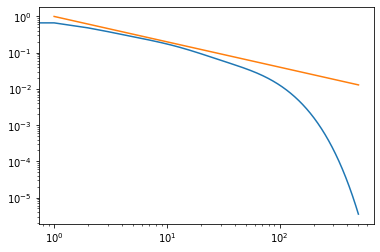

(502,)

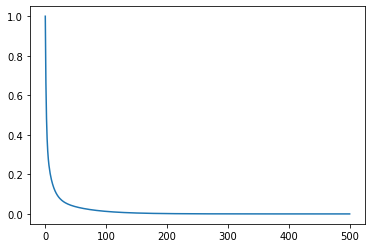

In [10]:
beta = 10**(2.3/3)
import numpy as np
c=0
T = 502
alpha=0.7
for i in range(0,3):
    c += beta**(-i*alpha)*np.exp(-alpha/beta**i)
x = np.arange(0,T)
appo = np.zeros(T)
for i in range(0,3):
    appo += beta**(-i*alpha)*np.exp(-alpha/beta**i*x)
    print(beta**i/alpha)
g = c**(-1)*appo
plt.plot(g[1:])
plt.plot(x**(-np.float(alpha)))
plt.xscale('log')
plt.yscale('log')
plt.show()
plt.plot(g[1:])
np.shape(g)

(501, 501)

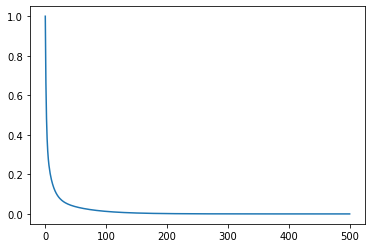

In [168]:
pippo = toeplitz(g[1:],g[1:])
plt.plot(pippo[:,0])
np.shape(pippo)

# Params 

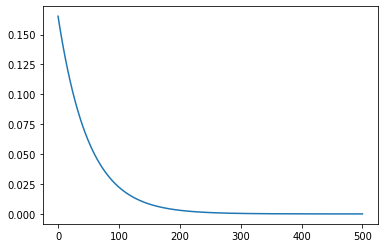

48.7792696261943


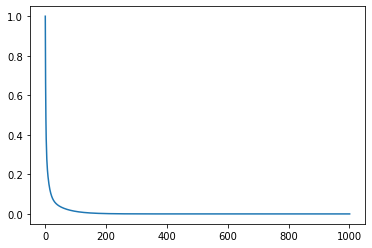

49.499463784317165
(501, 501)
(501, 501)


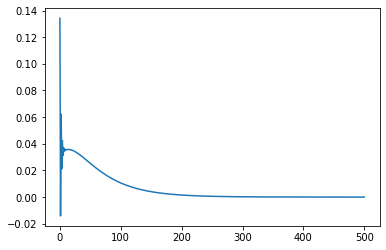

(501, 501)
(501, 501)


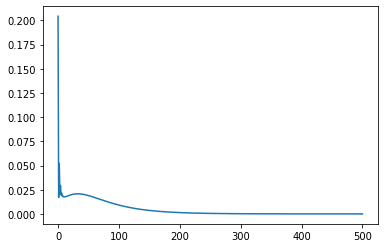

(501, 501)
(501, 501)


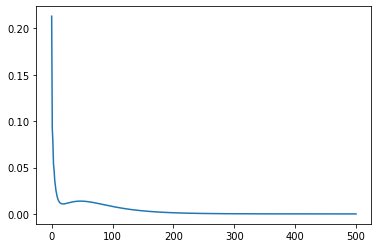

(501, 501)
(501, 501)


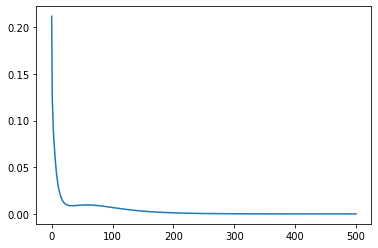

(501, 501)
(501, 501)


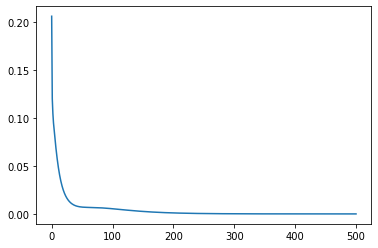

(501, 501)
(501, 501)


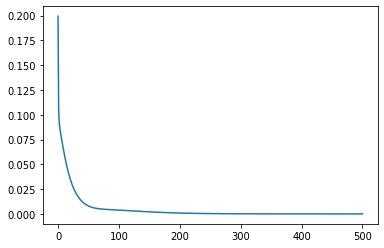

(501, 501)
(501, 501)


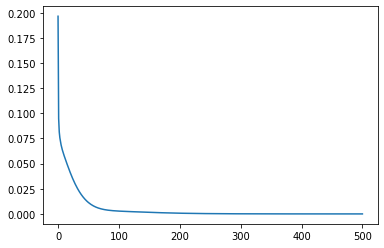

(501, 501)
(501, 501)


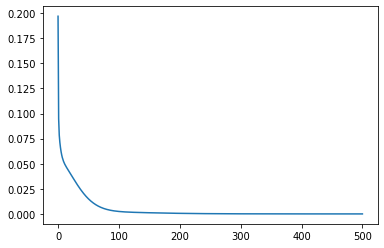

(501, 501)
(501, 501)


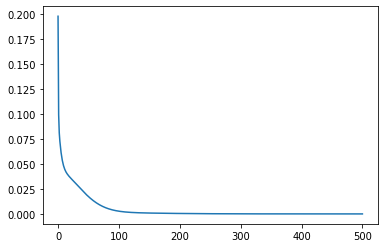

(501, 501)
(501, 501)


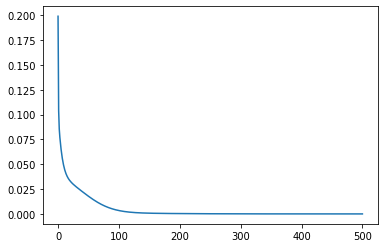

(501, 501)
(501, 501)


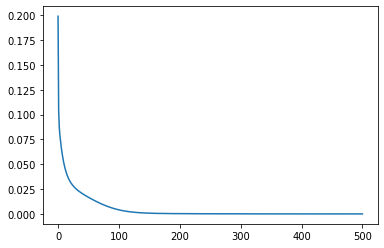

(501, 501)
(501, 501)


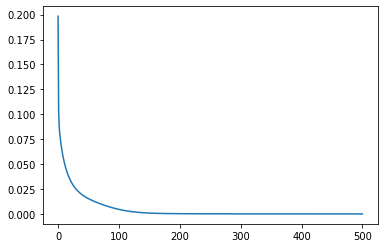

(501, 501)
(501, 501)


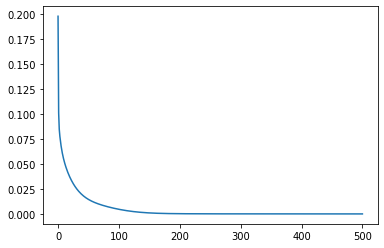

(501, 501)
(501, 501)


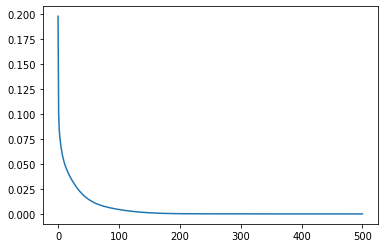

(501, 501)
(501, 501)


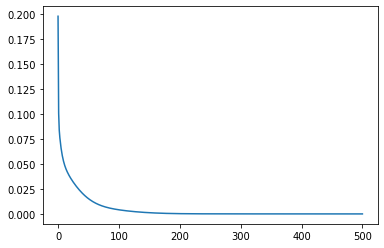

(501, 501)
(501, 501)


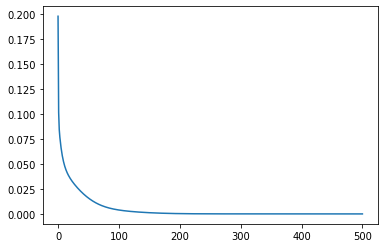

(501, 501)
(501, 501)


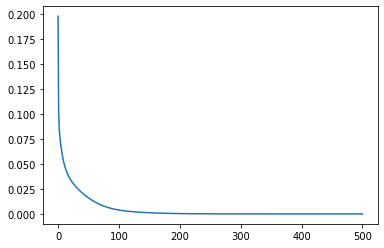

(501, 501)
(501, 501)


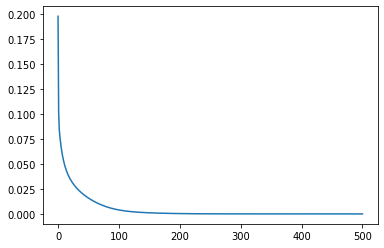

(501, 501)
(501, 501)


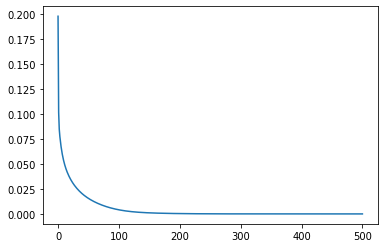

(501, 501)
(501, 501)


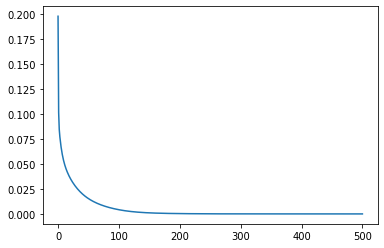

(501, 501)
(501, 501)


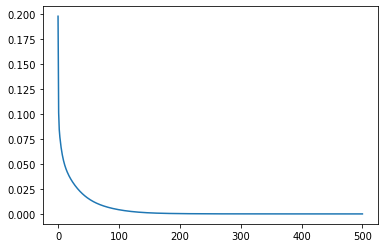

(501, 501)
(501, 501)


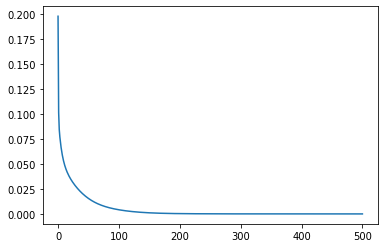

(501, 501)
(501, 501)


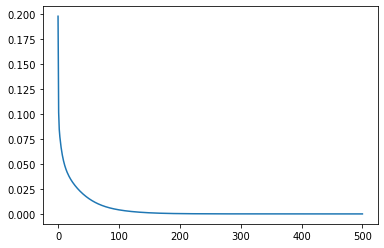

(501, 501)
(501, 501)


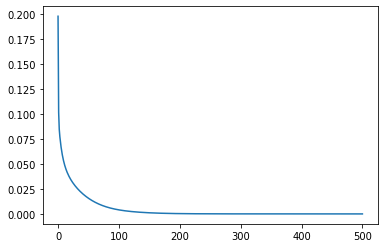

(501, 501)
(501, 501)


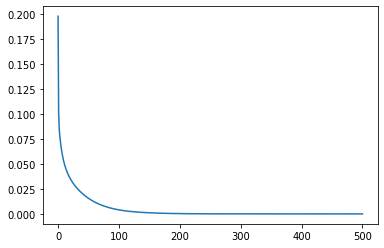

(501, 501)
(501, 501)


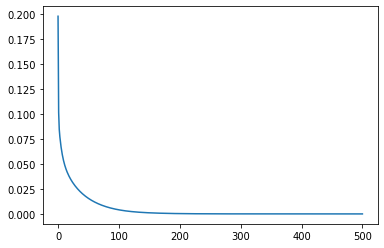

(501, 501)
(501, 501)


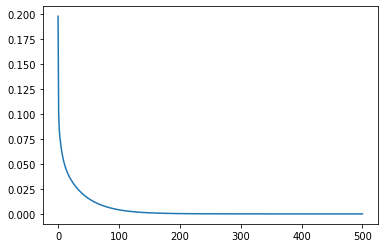

(501, 501)
(501, 501)


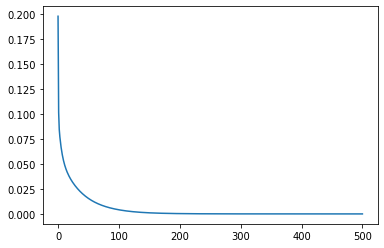

(501, 501)
(501, 501)


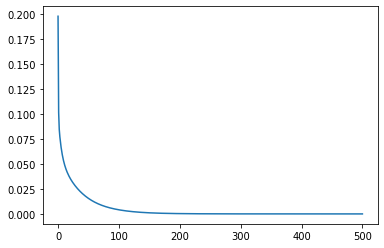

(501, 501)
(501, 501)


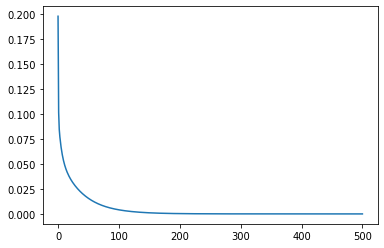

(501, 501)
(501, 501)


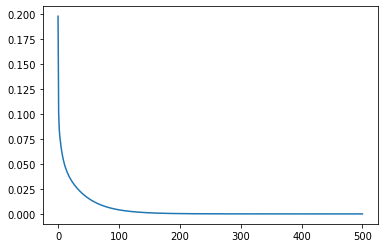

(501, 501)
(501, 501)


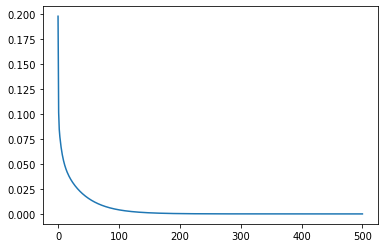

(501, 501)
(501, 501)


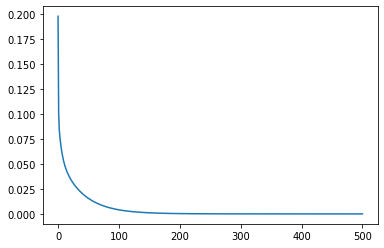

(501, 501)
(501, 501)


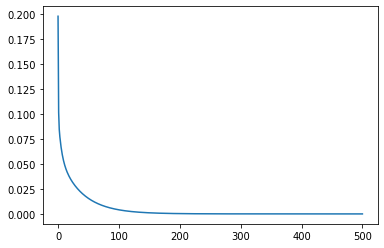

(501, 501)
(501, 501)


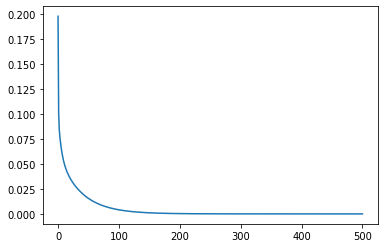

(501, 501)
(501, 501)


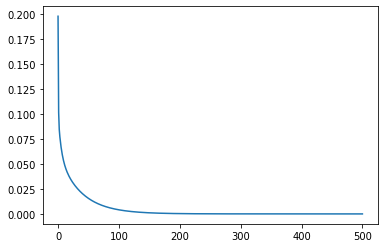

(501, 501)
(501, 501)


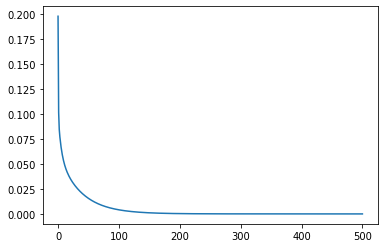

(501, 501)
(501, 501)


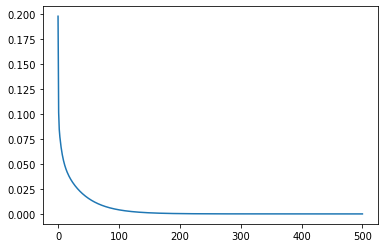

(501, 501)
(501, 501)


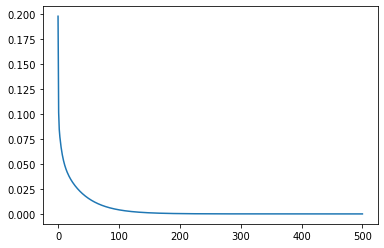

(501, 501)
(501, 501)


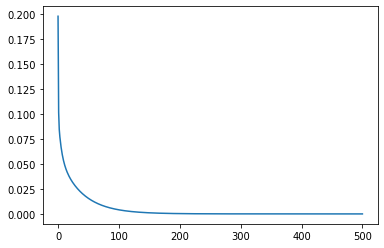

(501, 501)
(501, 501)


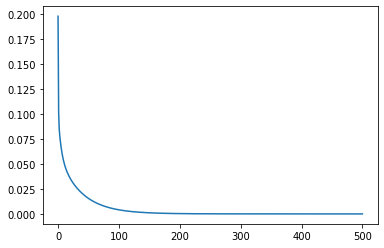

(501, 501)
(501, 501)


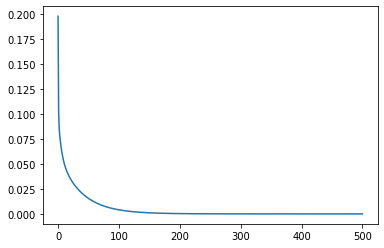

(501, 501)
(501, 501)


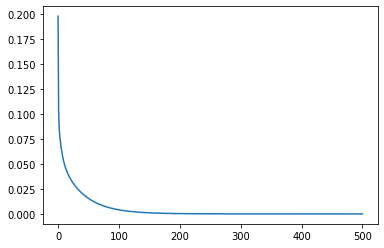

(501, 501)
(501, 501)


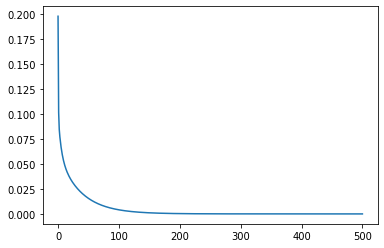

(501, 501)
(501, 501)


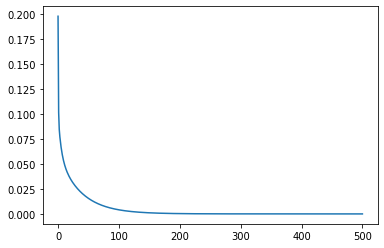

(501, 501)
(501, 501)


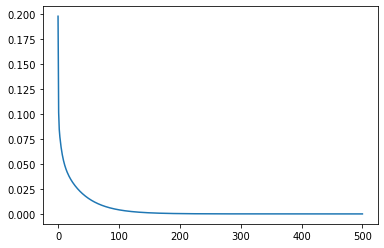

(501, 501)
(501, 501)


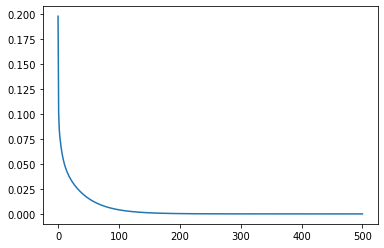

(501, 501)
(501, 501)


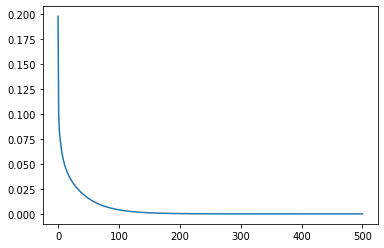

(501, 501)
(501, 501)


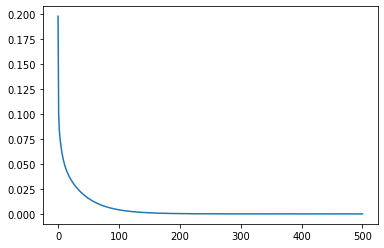

(501, 501)
(501, 501)


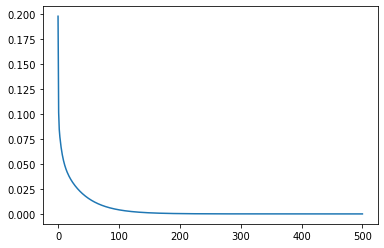

(501, 501)
(501, 501)


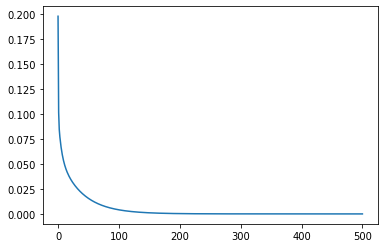

(501, 501)
(501, 501)


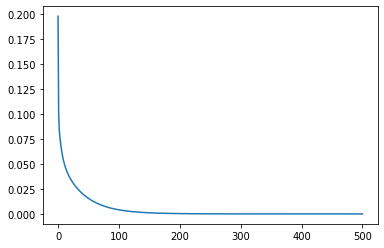

(501, 501)
(501, 501)


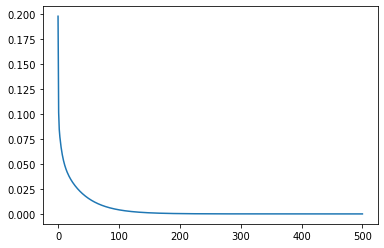

(501, 501)
(501, 501)


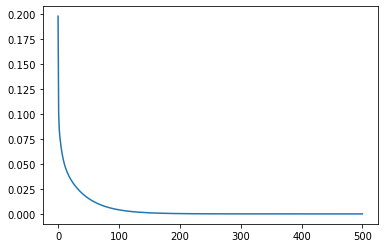

(501, 501)
(501, 501)


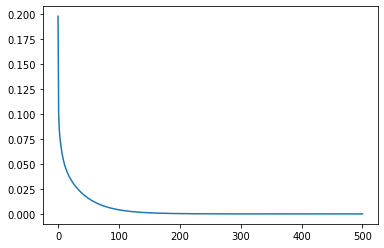

(501, 501)
(501, 501)


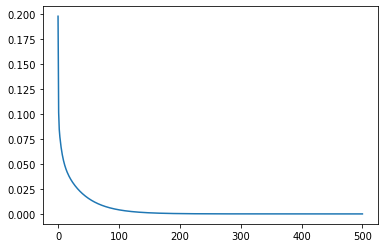

(501, 501)
(501, 501)


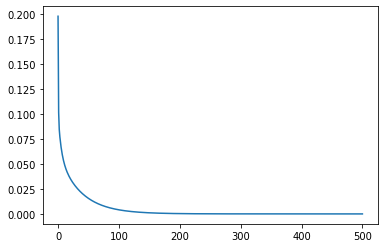

(501, 501)
(501, 501)


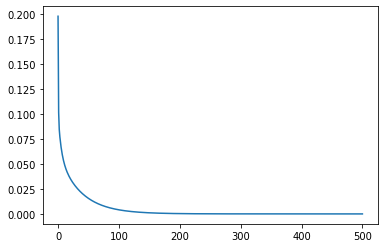

(501, 501)
(501, 501)


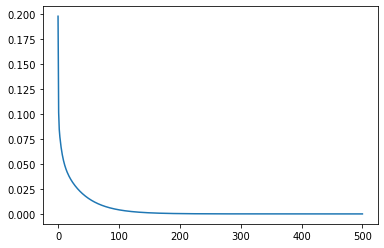

(501, 501)
(501, 501)


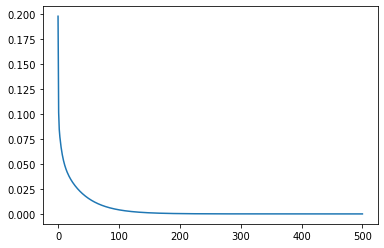

(501, 501)
(501, 501)


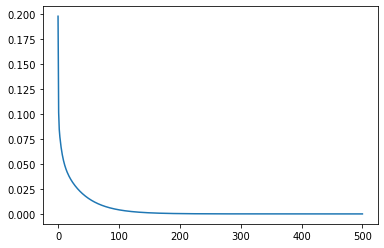

(501, 501)
(501, 501)


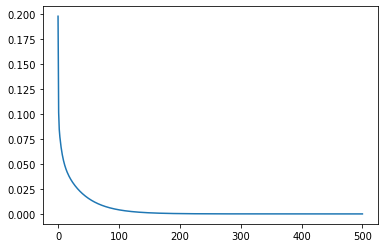

(501, 501)
(501, 501)


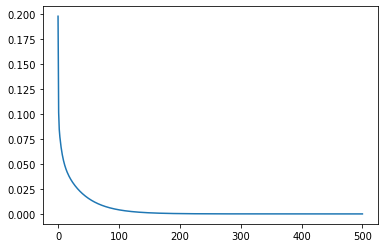

(501, 501)
(501, 501)


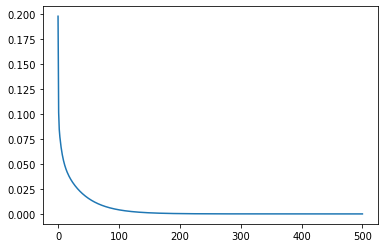

(501, 501)
(501, 501)


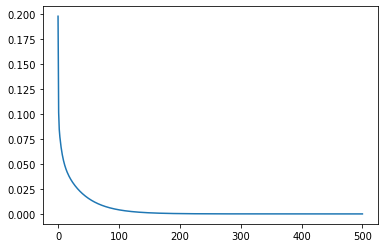

(501, 501)
(501, 501)


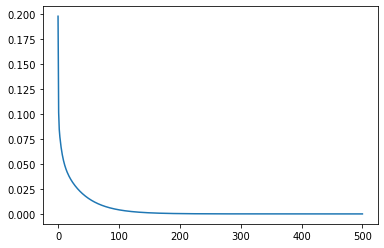

(501, 501)
(501, 501)


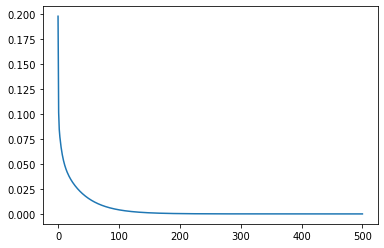

(501, 501)
(501, 501)


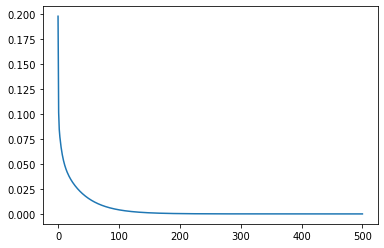

(501, 501)
(501, 501)


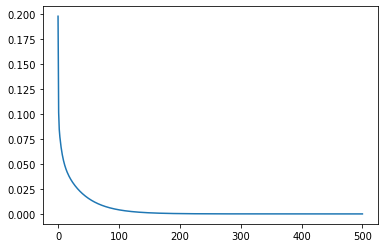

(501, 501)
(501, 501)


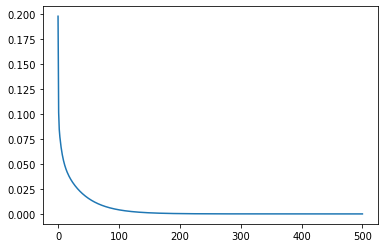

(501, 501)
(501, 501)


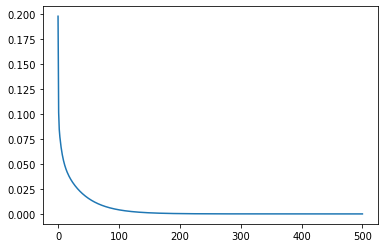

(501, 501)
(501, 501)


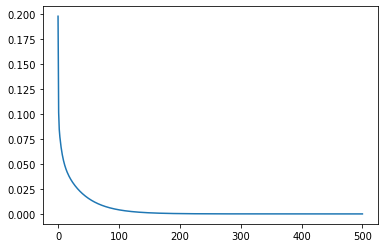

(501, 501)
(501, 501)


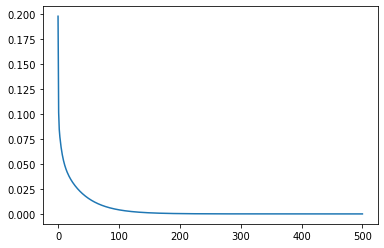

(501, 501)
(501, 501)


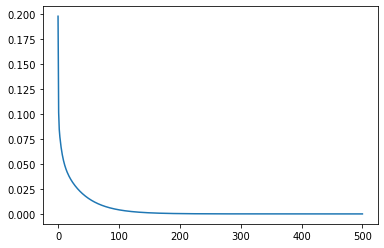

(501, 501)
(501, 501)


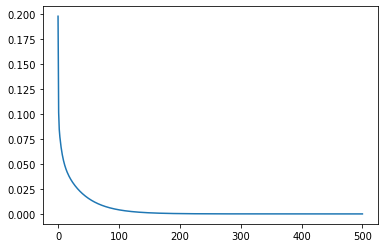

(501, 501)
(501, 501)


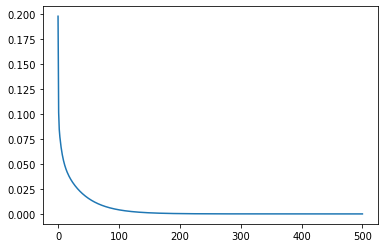

(501, 501)
(501, 501)


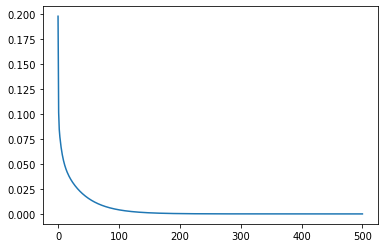

(501, 501)
(501, 501)


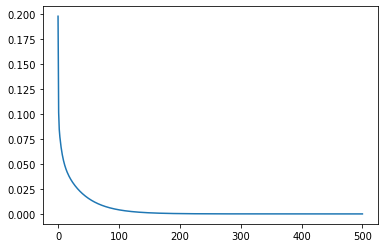

(501, 501)
(501, 501)


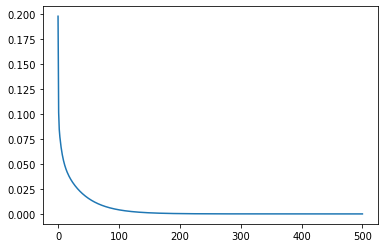

(501, 501)
(501, 501)


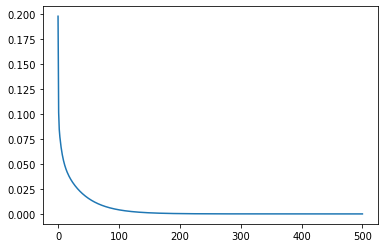

(501, 501)
(501, 501)


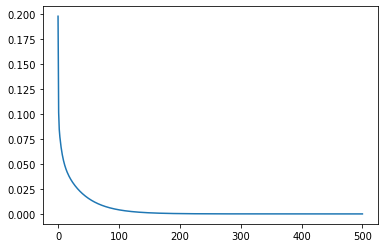

(501, 501)
(501, 501)


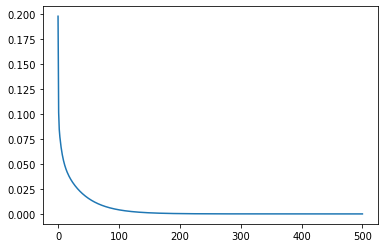

(501, 501)
(501, 501)


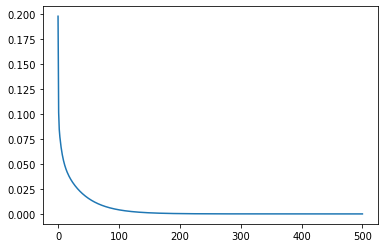

(501, 501)
(501, 501)


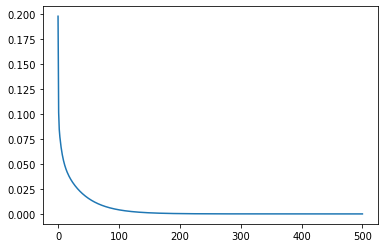

(501, 501)
(501, 501)


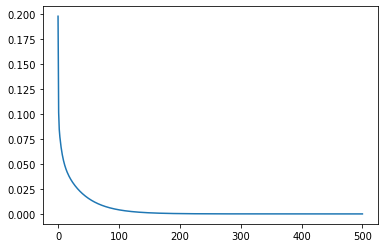

(501, 501)
(501, 501)


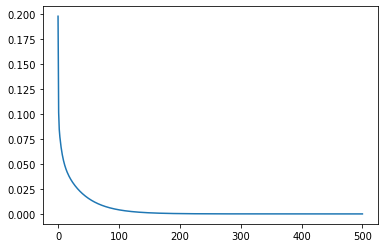

(501, 501)
(501, 501)


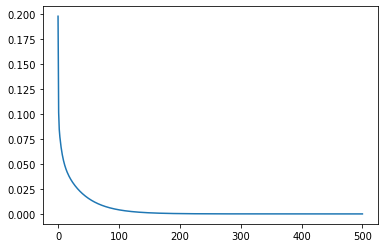

(501, 501)
(501, 501)


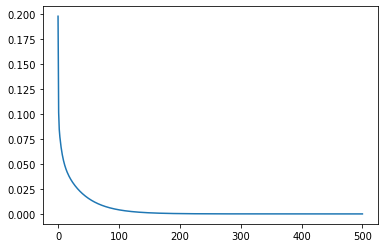

(501, 501)
(501, 501)


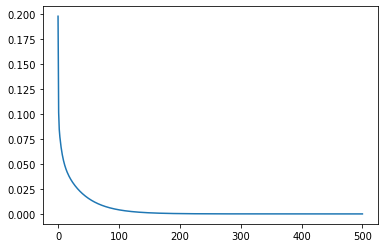

(501, 501)
(501, 501)


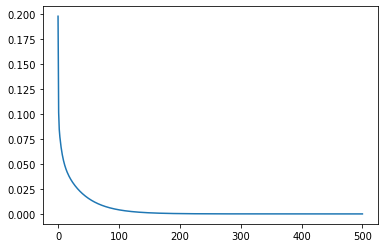

(501, 501)
(501, 501)


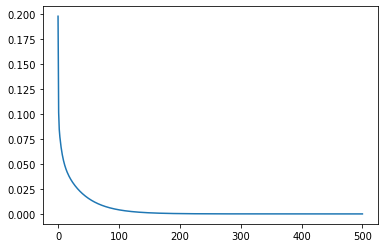

(501, 501)
(501, 501)


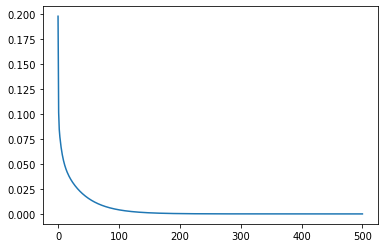

(501, 501)
(501, 501)


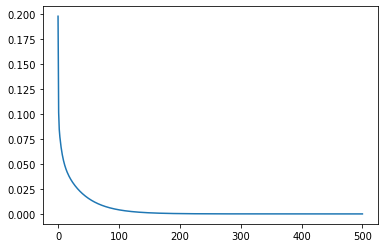

(501, 501)
(501, 501)


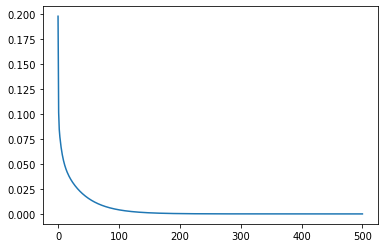

(501, 501)
(501, 501)


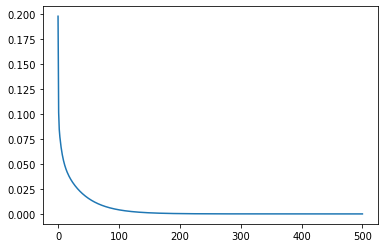

(501, 501)
(501, 501)


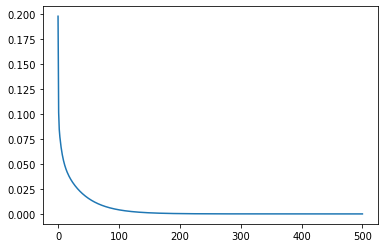

(501, 501)
(501, 501)


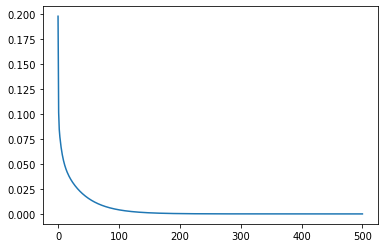

(501, 501)
(501, 501)


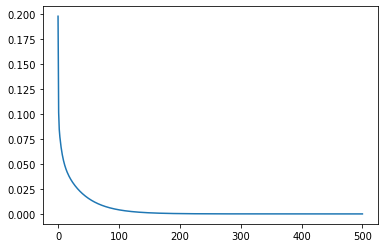

(501, 501)
(501, 501)


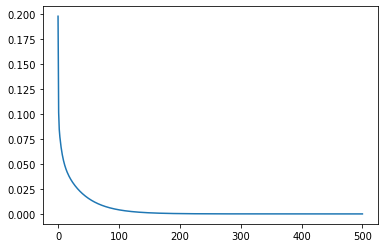

(501, 501)
(501, 501)


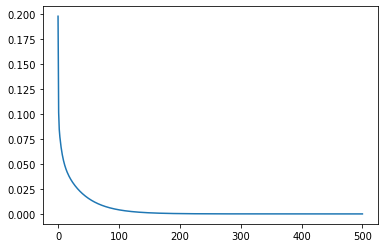

(501, 501)
(501, 501)


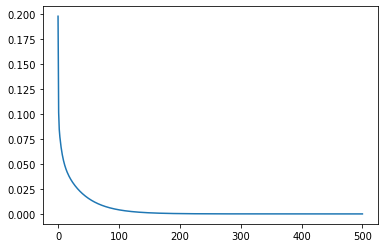

(501, 501)
(501, 501)


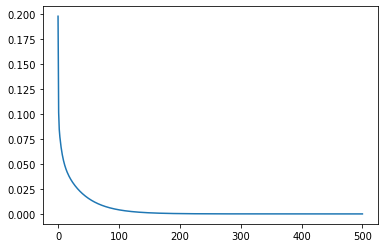

(501, 501)
(501, 501)


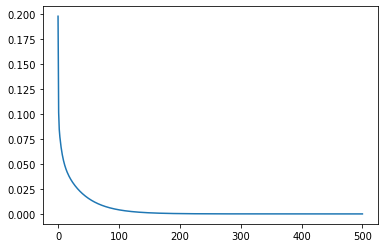

(501, 501)
(501, 501)


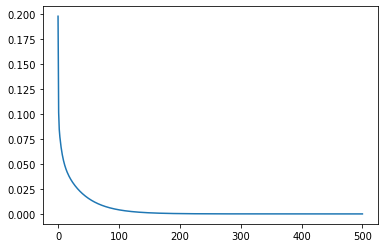

(501, 501)
(501, 501)


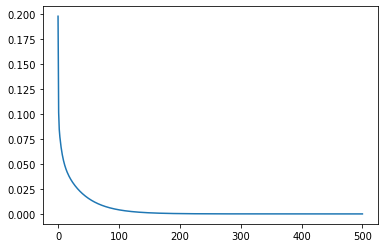

(501, 501)
(501, 501)


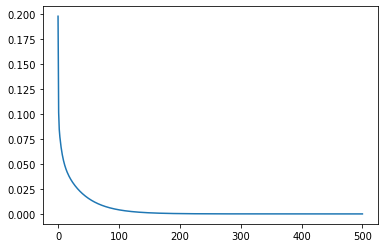

(501, 501)
(501, 501)


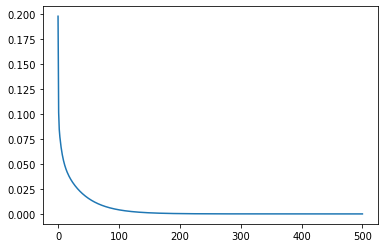

(501, 501)
(501, 501)


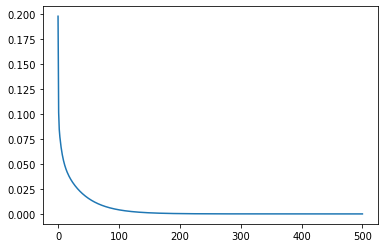

(501, 501)
(501, 501)


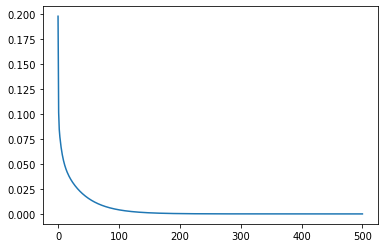

(501, 501)
(501, 501)


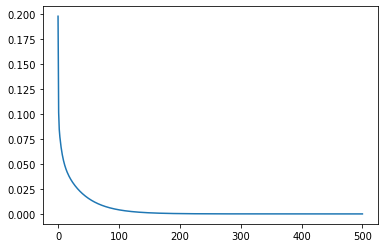

(501, 501)
(501, 501)


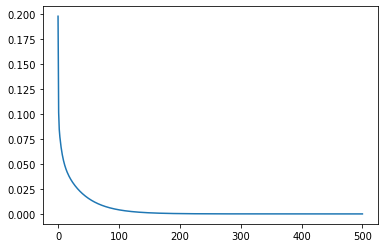

(501, 501)
(501, 501)


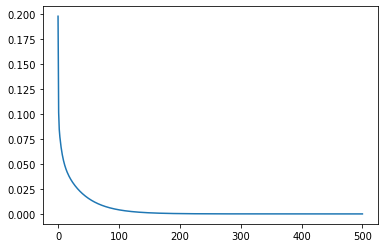

(501, 501)
(501, 501)


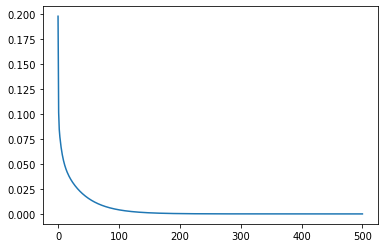

(501, 501)
(501, 501)


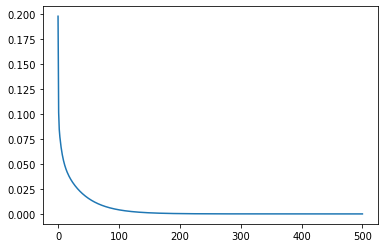

(501, 501)
(501, 501)


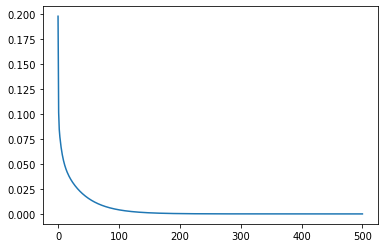

(501, 501)
(501, 501)


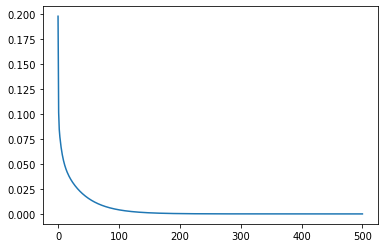

(501, 501)
(501, 501)


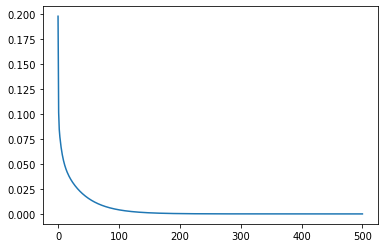

(501, 501)
(501, 501)


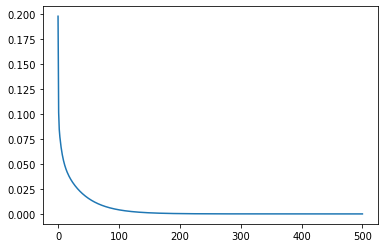

(501, 501)
(501, 501)


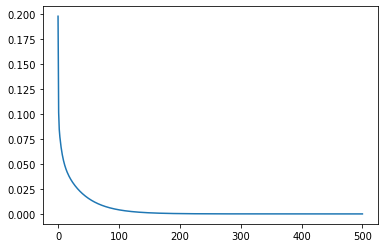

(501, 501)
(501, 501)


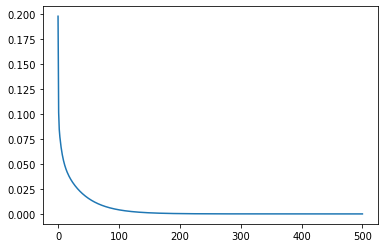

(501, 501)
(501, 501)


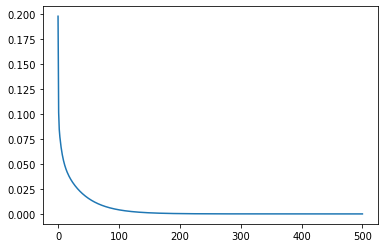

(501, 501)
(501, 501)


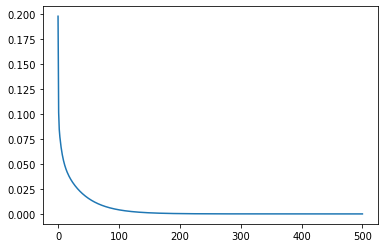

(501, 501)
(501, 501)


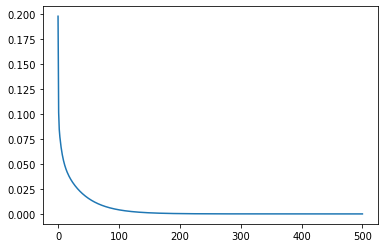

(501, 501)
(501, 501)


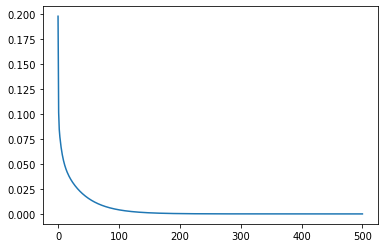

(501, 501)
(501, 501)


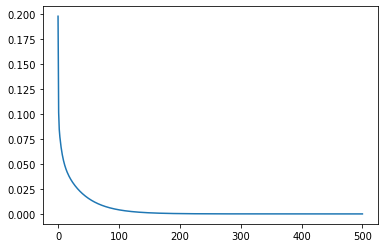

(501, 501)
(501, 501)


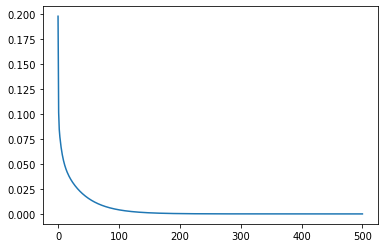

(501, 501)
(501, 501)


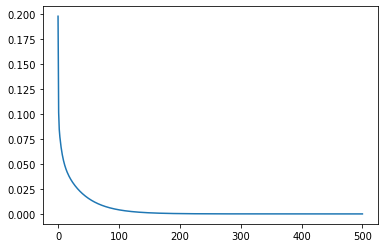

(501, 501)
(501, 501)


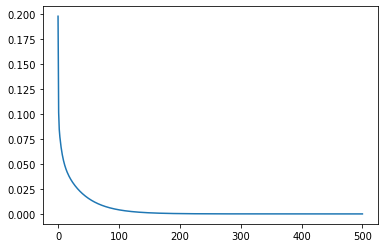

(501, 501)
(501, 501)


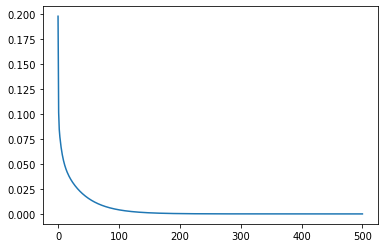

(501, 501)
(501, 501)


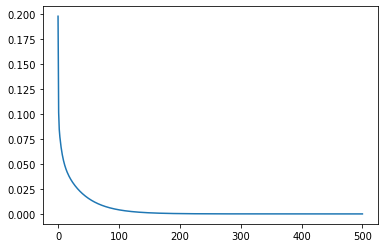

(501, 501)
(501, 501)


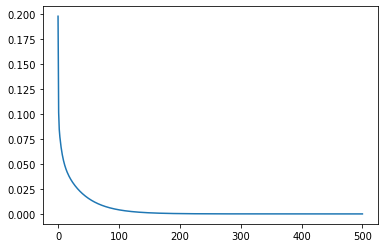

(501, 501)
(501, 501)


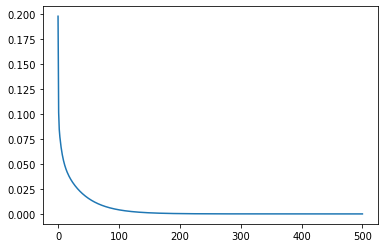

(501, 501)
(501, 501)


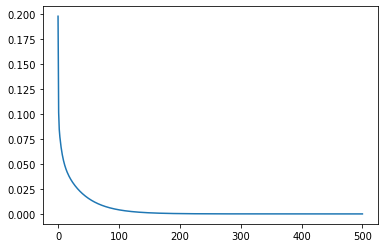

(501, 501)
(501, 501)


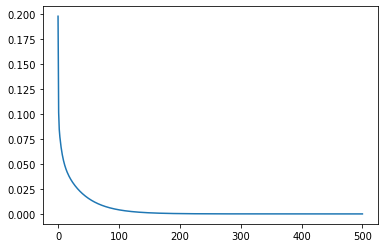

(501, 501)
(501, 501)


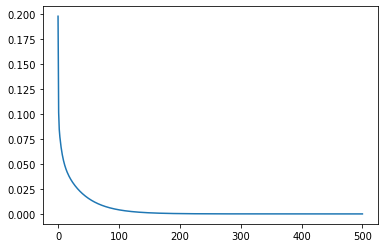

(501, 501)
(501, 501)


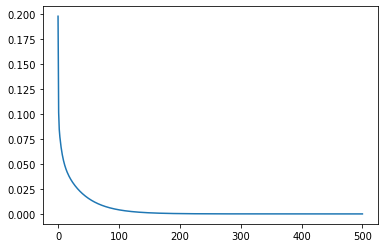

(501, 501)
(501, 501)


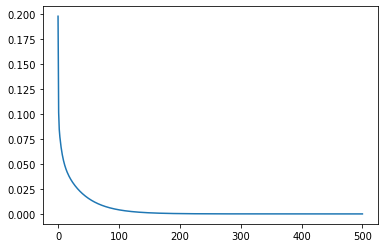

(501, 501)
(501, 501)


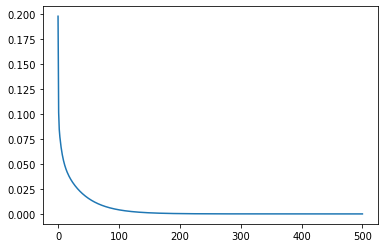

(501, 501)
(501, 501)


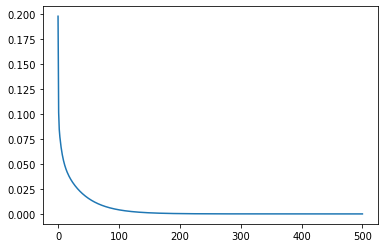

(501, 501)
(501, 501)


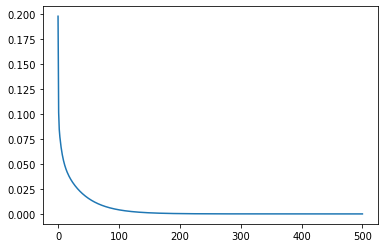

(501, 501)
(501, 501)


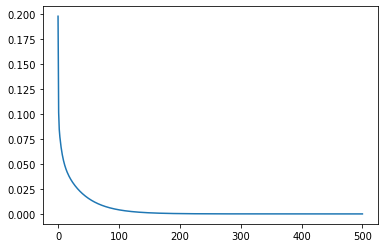

(501, 501)
(501, 501)


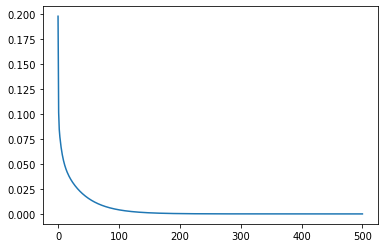

(501, 501)
(501, 501)


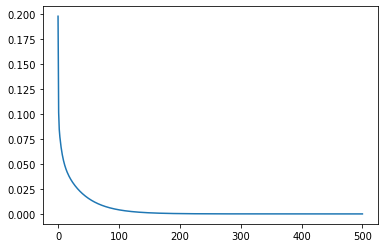

(501, 501)
(501, 501)


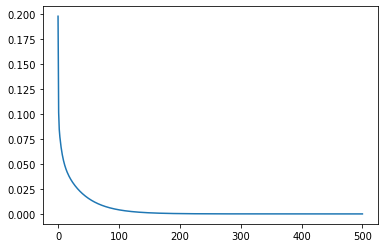

(501, 501)
(501, 501)


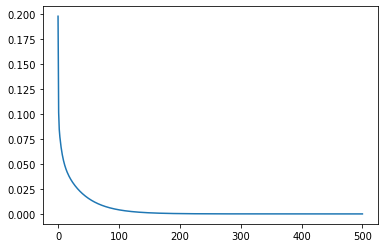

(501, 501)
(501, 501)


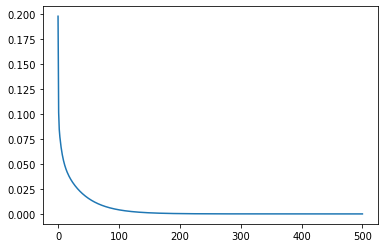

(501, 501)
(501, 501)


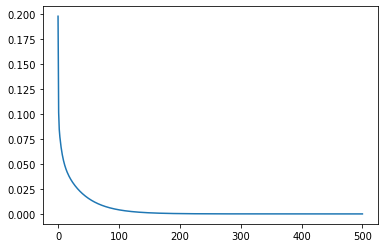

(501, 501)
(501, 501)


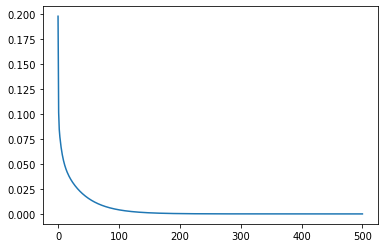

(501, 501)
(501, 501)


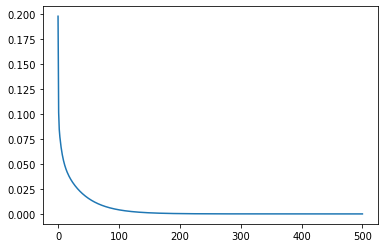

(501, 501)
(501, 501)


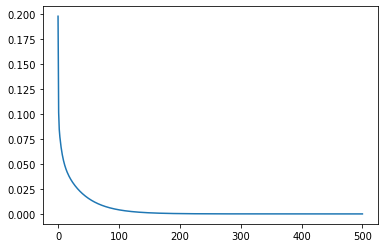

(501, 501)
(501, 501)


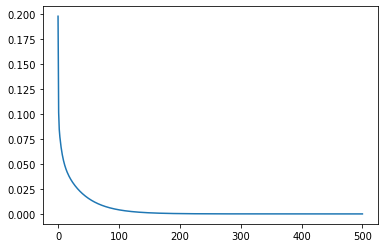

(501, 501)
(501, 501)


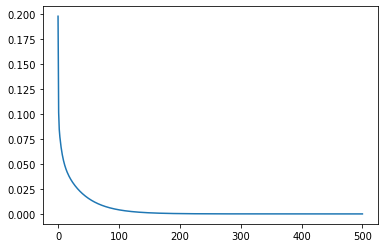

(501, 501)
(501, 501)


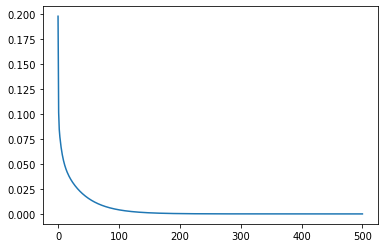

(501, 501)
(501, 501)


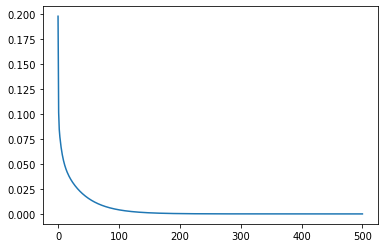

(501, 501)
(501, 501)


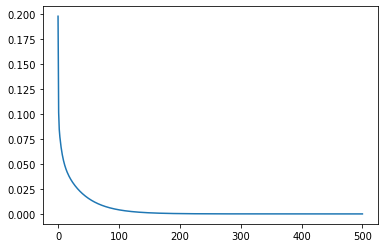

(501, 501)
(501, 501)


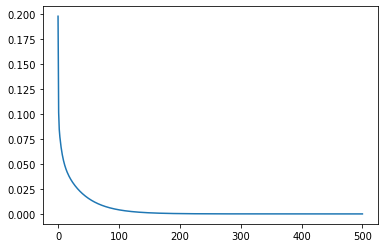

(501, 501)
(501, 501)


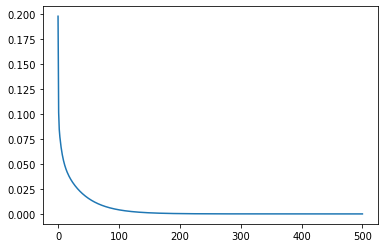

(501, 501)
(501, 501)


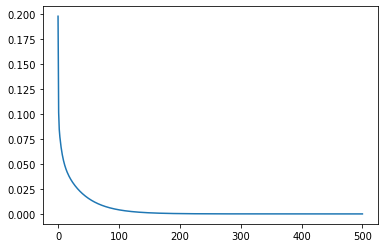

(501, 501)
(501, 501)


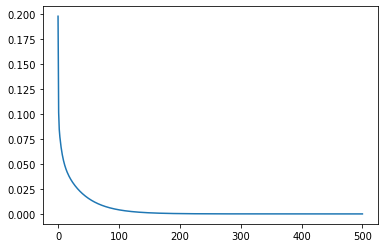

(501, 501)
(501, 501)


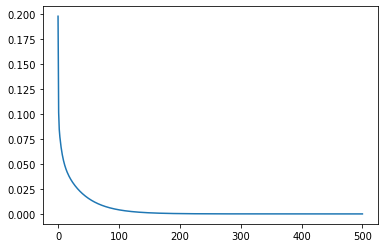

(501, 501)
(501, 501)


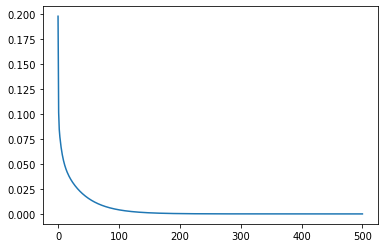

(501, 501)
(501, 501)


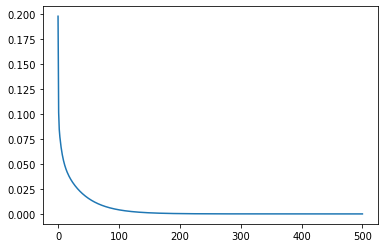

(501, 501)
(501, 501)


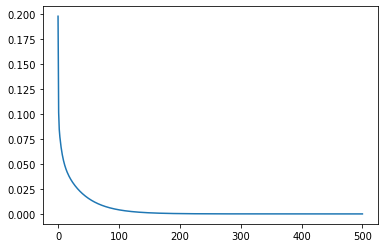

(501, 501)
(501, 501)


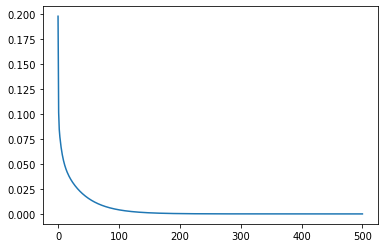

(501, 501)
(501, 501)


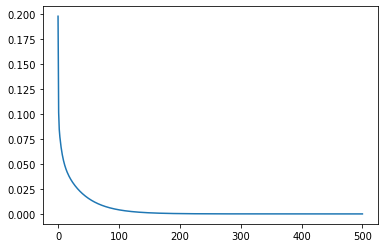

(501, 501)
(501, 501)


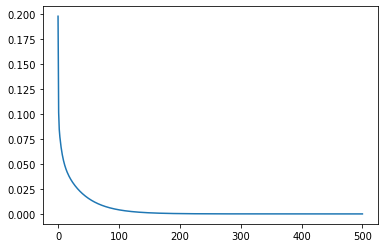

(501, 501)
(501, 501)


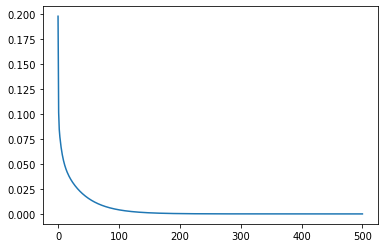

(501, 501)
(501, 501)


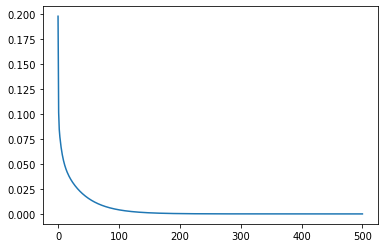

(501, 501)
(501, 501)


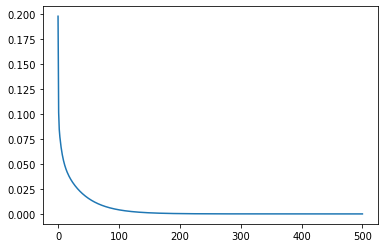

(501, 501)
(501, 501)


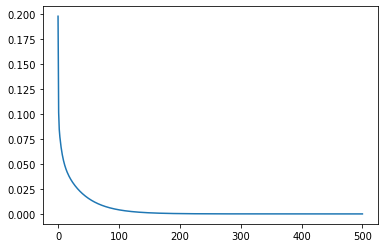

(501, 501)
(501, 501)


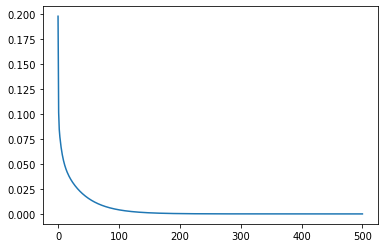

(501, 501)
(501, 501)


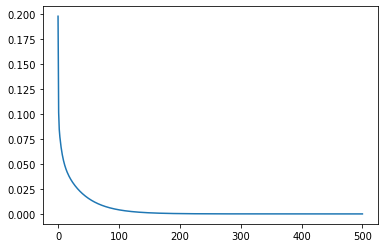

(501, 501)
(501, 501)


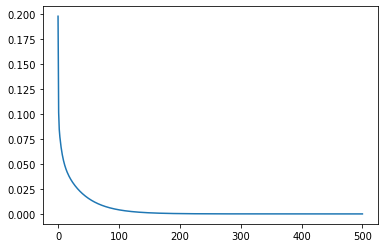

(501, 501)
(501, 501)


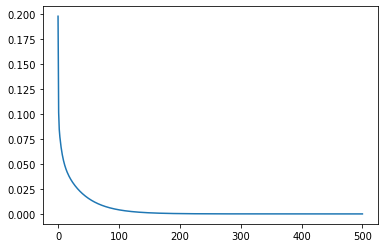

(501, 501)
(501, 501)


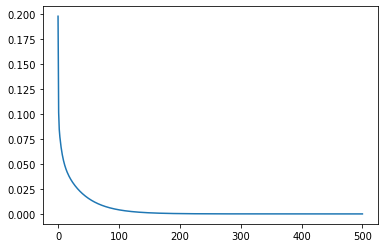

(501, 501)
(501, 501)


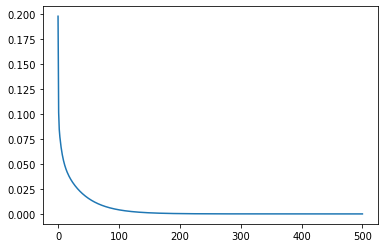

(501, 501)
(501, 501)


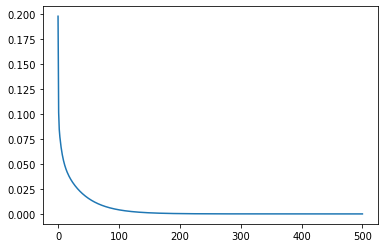

(501, 501)
(501, 501)


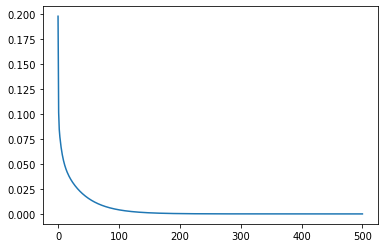

(501, 501)
(501, 501)


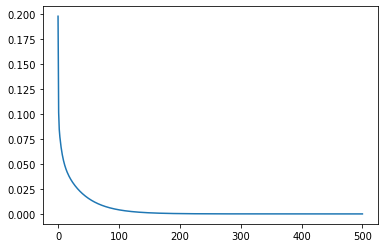

(501, 501)
(501, 501)


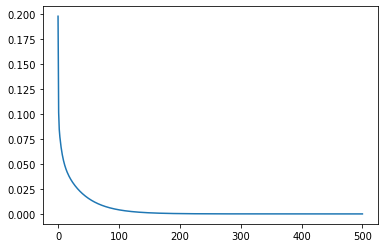

(501, 501)
(501, 501)


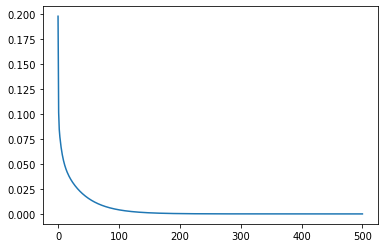

(501, 501)
(501, 501)


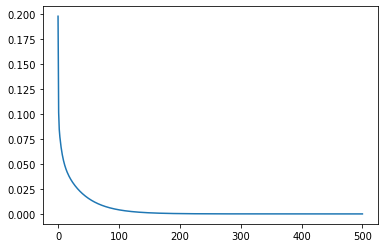

(501, 501)
(501, 501)


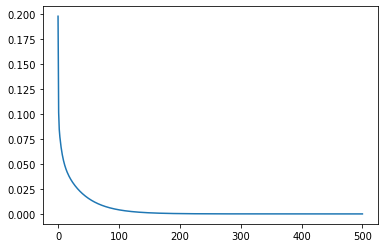

(501, 501)
(501, 501)


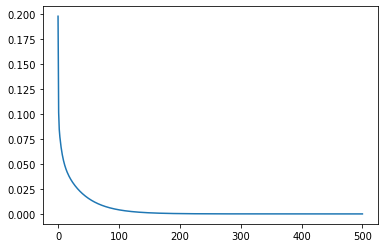

(501, 501)
(501, 501)


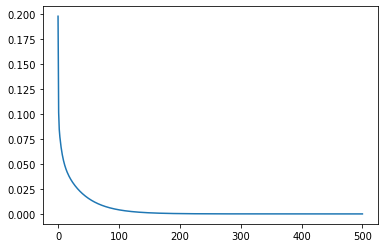

(501, 501)
(501, 501)


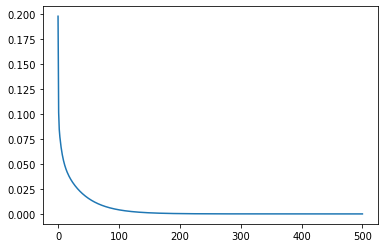

(501, 501)
(501, 501)


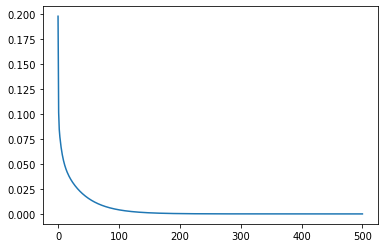

(501, 501)
(501, 501)


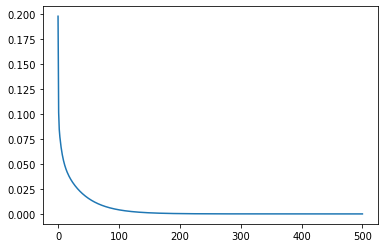

(501, 501)
(501, 501)


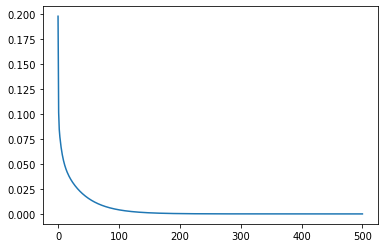

(501, 501)
(501, 501)


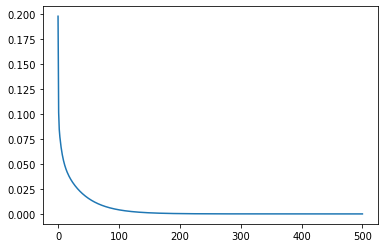

(501, 501)
(501, 501)


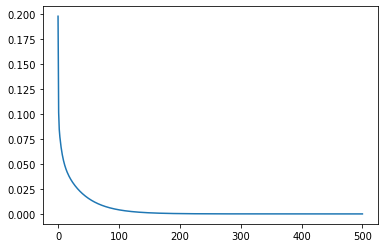

(501, 501)
(501, 501)


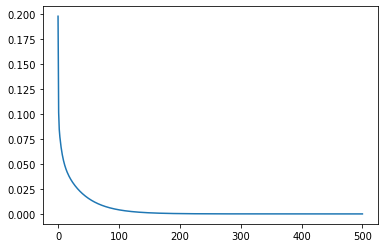

(501, 501)
(501, 501)


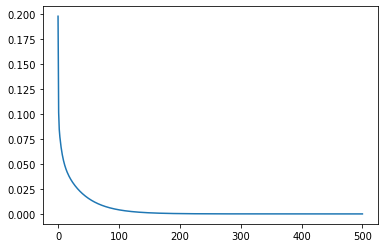

(501, 501)
(501, 501)


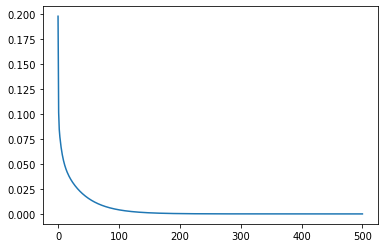

(501, 501)
(501, 501)


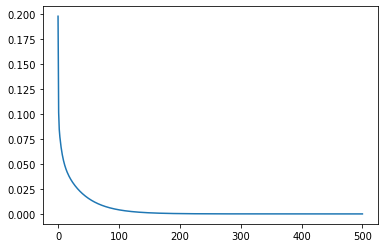

(501, 501)
(501, 501)


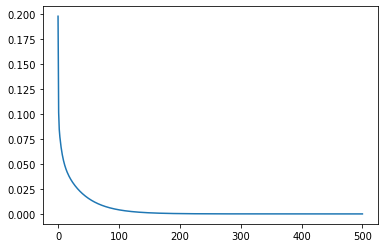

(501, 501)
(501, 501)


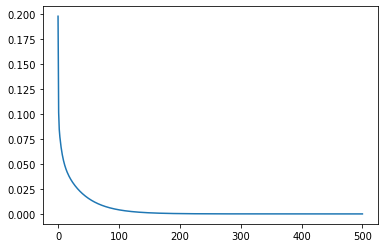

(501, 501)
(501, 501)


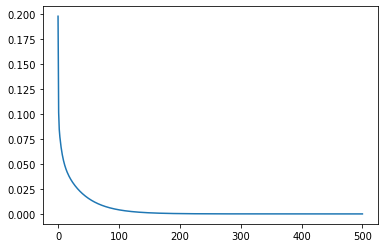

(501, 501)
(501, 501)


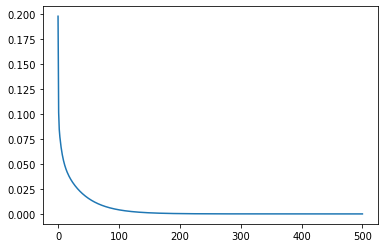

(501, 501)
(501, 501)


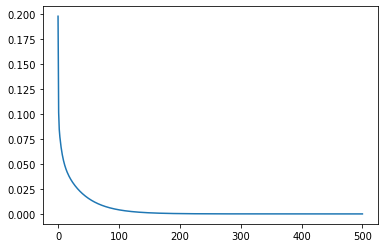

In [574]:
n = 1000
T = 500
T_corr = 200
tipo = 'mark'


#tau_mu = 100*3/2
tau_mu = 50
frequency_mu = 1/tau_mu
alpha_mu = np.exp(-1/tau_mu)

tau_NT = 0
if tau_NT == 0:
    alpha_NT = 0
else:
    alpha_NT = np.exp(-1/tau_NT)

C_mu_0 = ((1-alpha_mu)/alpha_mu)**2
C_NT_0 = 1


param = [tau_mu,tau_NT]
param_ampli = [C_mu_0,C_NT_0]

T_it = 200
G,D_NT,D_mu,C_p,C_tot,D_IT_NT,SumC_mu =  Numerical_solver_myopic_GENERAL(T+1,T_it,tipo, param_ampli,param,g)



In [ ]:
plt.plot(C_tot[0])

sono qui


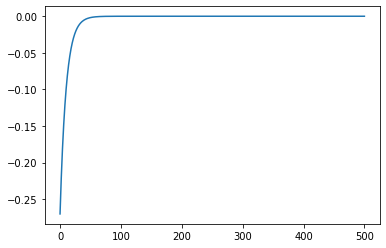

In [75]:

tau_mu = 10
#tau_mu = 500*4/3
frequency_mu = 1/tau_mu
alpha_mu = np.exp(-1/tau_mu)
alpha_NT = 0
C_mu_0 = ((1-alpha_mu)/alpha_mu)**2
C_NT_0 = 1
############################################################

T = 501

G = return_G_seed(T,[tau_mu])

C_mu = C_mu_0* np.fromfunction(lambda i,j : alpha_mu**np.abs(i-j), (T,T), dtype = np.float)
if alpha_NT == 0:
    print('sono qui')
    C_NT = C_NT_0* np.fromfunction(lambda i,j : np.vectorize(delta)(i-j), (T,T), dtype = np.float)
else:
    C_NT = C_NT_0* np.fromfunction(lambda i,j : alpha_NT**np.abs(i-j), (T,T), dtype = np.float)
    
    
L = np.fromfunction(lambda i, j: np.vectorize(delta)(i-j+1), (T,T), dtype = np.float)

SumC_mu  = np.zeros(T, dtype = np.float)
for i in range (0,T):
    if i==0:
        SumC_mu[i] = np.sum(C_mu[0,:])
    if i==1:
        SumC_mu[i] = np.sum(C_mu[0,:])-C_mu[0,0]
    if i>1:
        SumC_mu[i]  = np.sum(C_mu[0,:])-np.sum(C_mu[:i,:i][0,:])
SumC_mu = SumC_mu/C_mu_0

Inv_G_sym = np.linalg.inv(G+np.transpose(G))
        
k_mu = alpha_mu * Inv_G_sym.dot(SumC_mu)[0]
K_mu = k_mu *L
        
k0 = -Inv_G_sym[0,:].dot(np.transpose(G)).dot(C_NT[:,0])*alpha_NT/C_NT_0
K_0 = k0 *L
        
Gfutpast = np.zeros((T,T),dtype = np.float)
for i in range (0,T):
    Gfutpast[i,:T-i-1] = G[0,i+1:T]  
k = -(Inv_G_sym.dot(Gfutpast))[0]
plt.plot(k)
plt.show()
K = np.zeros((T,T),dtype = np.float)
for i in range (0,T):
    K[i,i+1:T] = k[:T-i-1]
    
    
D_NT = linalg.inv(np.identity(T)-K).dot(np.identity(T)+K_0)
D_IT_NT = linalg.inv(np.identity(T)-K).dot(K+K_0)
D_mu = linalg.inv(np.identity(T)-K).dot(K_mu)

In [76]:
from scipy.linalg import toeplitz

C_mu_0 = C_mu_0
#
T = 500
n = 5000
mu_flow = np.sqrt(C_mu_0)*pd.DataFrame(vol_flow_exp(frequency_mu,T+1,n))
tau_NT=0
if tau_NT == 0:
    NT_flow = np.sqrt(C_NT_0)*pd.DataFrame(vol_flow_delta(T+1,n)).transpose()
else:
    NT_flow = np.sqrt(C_NT_0)*pd.DataFrame(vol_flow_exp_2(1/tau_NT,T+1,n))
    
#TOT_flow2 = pd.DataFrame(propagate(NT_flow[0], D_NT[0])+propagate(mu_flow[0], D_mu[0]))
#TOT_flow = pd.DataFrame(D_NT[::-1,::-1].dot(NT_flow)+ np.sqrt(2/3)*D_mu[::-1,::-1].dot(mu_flow) )
TOT_flow = pd.DataFrame(D_NT[::-1,::-1].dot(NT_flow)+ D_mu[::-1,::-1].dot(mu_flow) )
#IT_flow = pd.DataFrame(D_IT_NT[::-1,::-1].dot(NT_flow)+ D_mu[::-1,::-1].dot(mu_flow) )
#P_flow2 = pd.DataFrame(TOT_flow2,G[0]).reset_index()
P_flow = pd.DataFrame(G[::-1,::-1].dot(TOT_flow))

#p_F_flow = (SumC_mu.transpose()[0][0]*mu_flow).shift(1).dropna()
p_F_flow = (SumC_mu[0]*alpha_mu*mu_flow).shift(1).dropna()

p_F_flow = p_F_flow.reset_index()
p_F_flow = p_F_flow.drop(columns = 'index')

#TOT_flow = TOT_flow[:-1].reset_index().drop(columns = 'index')
#IT_flow = IT_flow[:-1].reset_index().drop(columns = 'index')
#NT_flow = NT_flow[:-1].reset_index().drop(columns = 'index')
#P_flow = P_flow[:-1].reset_index().drop(columns = 'index')

S_flow = P_flow-p_F_flow

TOT_flow.drop(index=TOT_flow.index[:1], 
        axis=0, 
        inplace=True)

P_flow.drop(index=P_flow.index[:1], 
        axis=0, 
        inplace=True)

TOT_flow = TOT_flow.reset_index().drop(columns = 'index')
P_flow = P_flow.reset_index().drop(columns = 'index')

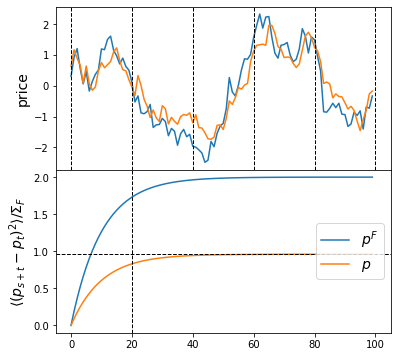

In [127]:

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 6))
i =20
ax1.plot(np.arange(0,100),p_F_flow[i][0:100], label = r'$p^F$')
ax1.plot(np.arange(0,100),P_flow[i][0:100], label = r'$p$')

#ax1.plot(np.arange(0,100),p_F_flow[i][0:100]*np.sqrt(0.68), label = r'$\mathbb{E}[p]$',linestyle = 'dashed', color = 'red')
#ax1ot(, label = r'$p^F$')

#ax1.fill_between( np.arange(0,100),p_F_flow[i][0:100]*np.sqrt(0.68)-p_F_flow[i][0:100]*np.sqrt(0.68)/2, p_F_flow[i][0:100]*np.sqrt(0.68)+p_F_flow[i][0:100]*np.sqrt(0.68)/2, color = 'red', alpha = 0.2)
#ax1.plot(p_F_flow[i][:100]*np.sqrt(10), label = r'$p^{exp}$')

#ax1.legend(loc = 1, fontsize = 14)
ax1.axvline(0, linestyle = 'dashed', color = 'black', linewidth = 1)
ax1.axvline(20, linestyle = 'dashed', color = 'black', linewidth = 1)
ax1.axvline(40, linestyle = 'dashed', color = 'black', linewidth = 1)
ax1.axvline(60, linestyle = 'dashed', color = 'black', linewidth = 1)
ax1.axvline(80, linestyle = 'dashed', color = 'black', linewidth = 1)
ax1.axvline(100, linestyle = 'dashed', color = 'black', linewidth = 1)
ax1.set_ylabel('price', fontsize = 14)


ax2.plot(2*(1-alpha_mu**np.arange(0,100)), label = r'$p^F$')
ax2.plot(2*(1-np.sqrt(1-alpha_mu**2)/alpha_mu**2)*(1-alpha_mu**np.arange(0,100)), label = r'$p$')
#ax2.plot(20*(1-(alpha_mu)**np.arange(0,100))/20, label = r'$p^{emp}$')

ax2.legend(loc = 'right', fontsize = 14)
ax2.axhline(2*(1-np.sqrt(1-alpha_mu**2)/alpha_mu**2), color = 'black', linestyle = 'dashed', linewidth = 1)
ax2.set_ylabel(r'$\langle (p_{s+t}-p_{t})^2 \rangle/\Sigma_F$', fontsize = 14)
ax2.axvline(20, color = 'black', linestyle = 'dashed', linewidth = 1)

plt.subplots_adjust( hspace=0)
plt.savefig('without_emp.pdf')

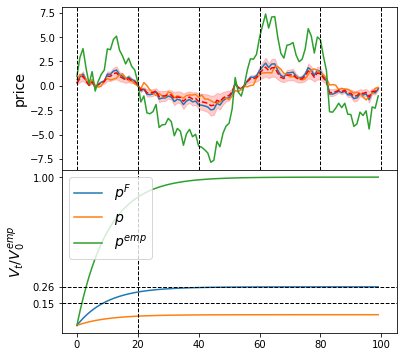

In [115]:

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 6))
i =20
ax1.plot(np.arange(0,100),p_F_flow[i][0:100], label = r'$p^F$')
ax1.plot(np.arange(0,100),P_flow[i][0:100], label = r'$p$')

ax1.plot(np.arange(0,100),p_F_flow[i][0:100]*np.sqrt(0.68), label = r'$\mathbb{E}[p]$',linestyle = 'dashed', color = 'red')
#ax1ot(, label = r'$p^F$')

ax1.fill_between( np.arange(0,100),p_F_flow[i][0:100]*np.sqrt(0.68)-p_F_flow[i][0:100]*np.sqrt(0.68)/2, p_F_flow[i][0:100]*np.sqrt(0.68)+p_F_flow[i][0:100]*np.sqrt(0.68)/2, color = 'red', alpha = 0.2)
ax1.plot(p_F_flow[i][:100]*np.sqrt(10), label = r'$p^{exp}$')

#ax1.legend(loc = 1, fontsize = 14)
ax1.axvline(0, linestyle = 'dashed', color = 'black', linewidth = 1)
ax1.axvline(20, linestyle = 'dashed', color = 'black', linewidth = 1)
ax1.axvline(40, linestyle = 'dashed', color = 'black', linewidth = 1)
ax1.axvline(60, linestyle = 'dashed', color = 'black', linewidth = 1)
ax1.axvline(80, linestyle = 'dashed', color = 'black', linewidth = 1)
ax1.axvline(100, linestyle = 'dashed', color = 'black', linewidth = 1)
ax1.set_ylabel('price', fontsize = 14)


ax2.plot(0.26*(1-alpha_mu**np.arange(0,100)), label = r'$p^F$')
ax2.plot(0.15*(1-np.sqrt(1-alpha_mu**2)/alpha_mu**2)*(1-alpha_mu**np.arange(100)), label = r'$p$')
ax2.plot(20*(1-(alpha_mu)**np.arange(0,100))/20, label = r'$p^{emp}$')

ax2.legend(loc = 0, fontsize = 14)
ax2.axhline(0.26, color = 'black', linestyle = 'dashed', linewidth = 1)
ax2.axhline(0.15, color = 'black', linestyle = 'dashed', linewidth = 1)

ax2.set_ylabel(r'$V_t/V^{emp}_0$', fontsize = 14)
ax2.axvline(20, color = 'black', linestyle = 'dashed', linewidth = 1)

ax2.set_yticks([0.15,0.26,1])

plt.subplots_adjust( hspace=0)
plt.savefig('with_emp.pdf')

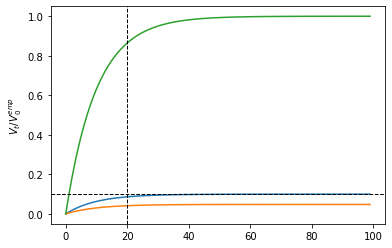

In [86]:
ax2.plot(2*(1-alpha_mu**np.arange(0,100))/20, label = r'$p^F$')
ax2.plot(2*(1-np.sqrt(1-alpha_mu**2)/alpha_mu**2)*(1-alpha_mu**np.arange(100))/20, label = r'$p$')
ax2.plot(20*(1-(alpha_mu)**np.arange(0,100))/20, label = r'$p^{emp}$')
ax2.axhline(0.1, color = 'black', linestyle = 'dashed', linewidth = 1)
ax2.ylabel(r'$V_t/V^{emp}_0$')
ax2.axvline(20, color = 'black', linestyle = 'dashed', linewidth = 1)

0.6590720896076091

In [576]:
G_high = G
P_flow_high = P_flow
P_F_flow_high = p_F_flow
TOT_flow_high = TOT_flow

G_low = G
P_flow_low = P_flow
P_F_flow_low = p_F_flow
TOT_flow_low = TOT_flow

In [751]:
G_0 = (1-(1-np.sqrt(1-alpha_mu**2))/alpha_mu**2)
C_0_q = (1+np.sqrt(1-alpha_mu**2))

G_0_day = G_0*1/np.sqrt(tau_mu)
C_0_q_day = C_0_q/30
G_0**2*C_0_q
G_0

0.1652870023181079

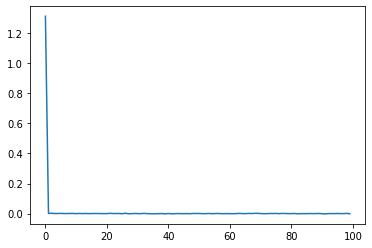

In [41]:
plt.plot(corrTOT)

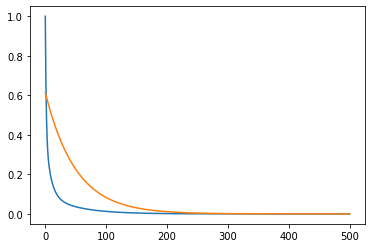

In [730]:
plt.plot(g[1:])
plt.plot(C_p[0])

In [731]:
T_corr = 300
appoPF = Compute_corr(P_F_flow_high,T_corr,n)
print('ciaoni')
appoP = Compute_corr(P_flow,T_corr,n)


#appoNT_high = Compute_corr(NT_flow,T_corr,n)
#corrTOT = Compute_corr(TOT_flow_low,T_corr,n)

ciaoni


In [754]:
GDAY = np.sqrt(2*appoP[0]*(1-appoP[1]/appoP[0])/(corrTOT[0]))
GDAY

0.16166072189275257

In [578]:
R_usual = Compute_xcorrR(TOT_flow, P_flow.shift(1), 100,n)

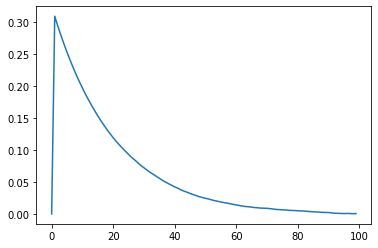

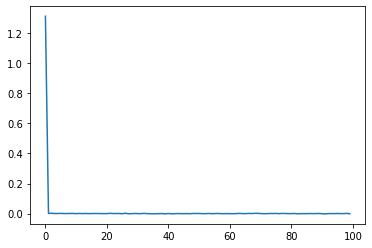

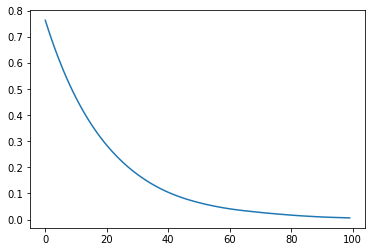

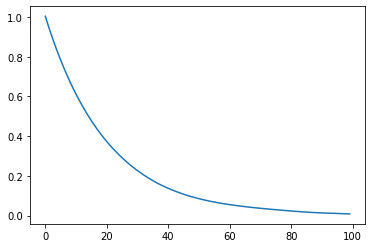

In [19]:
plt.plot(R_usual)
plt.show()
plt.plot(corrTOT)
plt.show()
plt.plot(appoP)
plt.show()
plt.plot(appoPF)
plt.show()

In [757]:
R_day_q_indip = GDAY*corrTOT[0]/30
R_day_q_indip

0.004806723446595826

<ipython-input-809-7a5c0b78abe6>:176: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


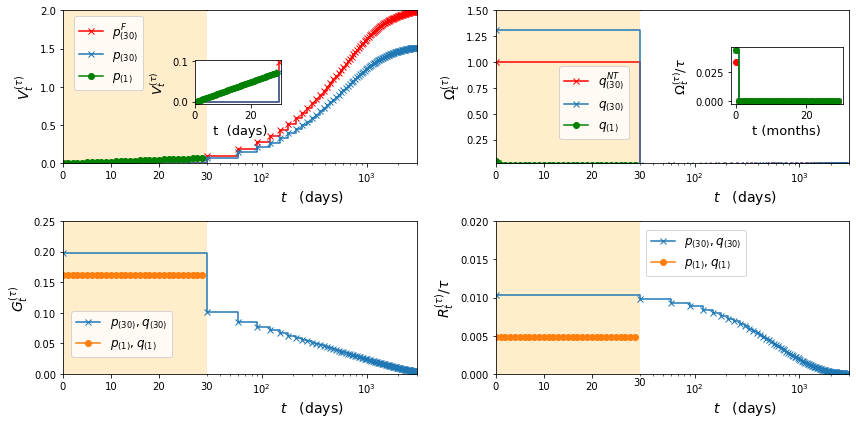

In [809]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable


#G_q_indip = G
#G_0_day_q_indip = G_0_day
#R_usual_q_indip = R_usual
#R_day_q_indip = GDAY*corrTOT[0]/30
#vgram_p_f_q_indip = 2*appoPF[0]*(1-appoPF/appoPF[0])
#vgram_p_q_indip = 2*appoP[0]*(1-appoP/appoP[0])
#vgram_day = 2*G_0**2*C_0_q/(1-alpha_mu**2)*1/20
#corrtot_q_indip = corrTOT
#corrtot_day_q_indip = corrTOT/30


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.set_size_inches(12, 6, forward=True)

#fig.suptitle('Independent order flow')
#ax1.plot(x, y)


#ax1 = plt.subplot(111)
ax3.step(np.arange(0,501)*30, G_q_indip[0],where = 'post', marker ='x')
ax3.set_xscale('log', base = 10)
ax3.set_xlim((30, 3000))
ax3.spines['left'].set_visible(False)
ax3.yaxis.set_ticks_position('left')
ax3.yaxis.set_visible(False)


divider = make_axes_locatable(ax3)
axLin3 = divider.append_axes("left", size=2.0, pad=0, sharey=ax3)
axLin3.set_xscale('linear')
axLin3.set_xlim((0, 29.99))
axLin3.step(np.arange(0,501)*30,G_q_indip[0],label = r'$p_{(30)}, q_{(30)}$',where = 'post', marker ='x')
axLin3.step(np.arange(0,30),GDAY*np.ones(30),label = r'$p_{(1)}, q_{(1)}$',where = 'post', marker ='o')
axLin3.spines['right'].set_visible(False)
axLin3.fill_between((0,29.99), -1, 80, facecolor='orange', alpha=0.2) # blocked area for first axes
#axLin.yaxis.set_ticks_position('right')
ax3.set_ylim(0,0.25)
axLin3.legend(bbox_to_anchor=(0.8,0.45), fontsize = 12)
axLin3.set_ylabel(r'$G^{(\tau)}_t$', size = 14)
ax3.set_xlabel(r'$ t $'+'   (days)', size = 14)

plt.setp(axLin3.get_xticklabels(), visible=True)
#plt.tight_layout()


#ax2 = plt.subplot(111)
ax4.step(np.arange(0,99)*30, R_usual_q_indip[1:]/(30),where ='post',  marker ='x')
ax4.set_xscale('log', base = 10)
ax4.set_xlim((30, 3000))
ax4.spines['left'].set_visible(False)
ax4.yaxis.set_ticks_position('left')
ax4.yaxis.set_visible(False)
ax4.set_xlabel(r'$ t $'+'   (days)', size = 14)

divider = make_axes_locatable(ax4)
axLin4 = divider.append_axes("left", size=2.0, pad=0, sharey=ax4)
#axLin2.set_xscale('log')
axLin4.set_xlim((0, 29.99))
axLin4.step(np.arange(0,99)*30,R_usual_q_indip[1:]/(30), label = r'$p_{(30)}, q_{(30)}$', where ='post', marker ='x')
axLin4.step(np.arange(0,30),(R_day_q_indip*np.ones(30)), label = r'$p_{(1)}, q_{(1)}$',where ='post',  marker ='o')
axLin4.spines['right'].set_visible(False)
axLin4.set_ylabel(r'$R^{(\tau)}_t/{\tau}$', size = 14)
axLin4.fill_between((0,29.99), -1, 80, facecolor='orange', alpha=0.2) # blocked area for first axes
plt.legend(bbox_to_anchor=(1, 0.6), fontsize = 12)
#axLin.yaxis.set_ticks_position('right')
plt.setp(axLin4.get_xticklabels(), visible=True)
ax4.set_ylim(0,0.02)


plt.tight_layout()
#vgramF = 2*appoPF[0]*(1-appoPF/appoPF[0])
#vgramP = 2*appoP[0]*(1-appoP/appoP[0])
ax1.step(np.arange(0,100)*30, vgramF,where = 'post', marker ='x', color = 'red')
ax1.step(np.arange(0,100)*30, vgramP,where = 'post', marker ='x')
ax1.set_xscale('log', base = 10)
ax1.set_xlim((30, 3000))
ax1.spines['left'].set_visible(False)
ax1.yaxis.set_ticks_position('left')
ax1.yaxis.set_visible(False)

divider = make_axes_locatable(ax1)
axLin1 = divider.append_axes("left", size=2.0, pad=0, sharey=ax1)
axLin1.set_xscale('linear')
axLin1.set_xlim((0, 29.99))
axLin1.step(np.arange(0,100)*30,vgram_p_f_q_indip,where = 'post', label = r'$p^F_{(30)}$', marker ='x', color = 'red')
axLin1.step(np.arange(0,100)*30, vgram_p_q_indip,where = 'post', label = r'$p_{(30)}$', marker ='x')

axLin1.set_ylim(0,2)

ax1.set_ylim(0,2)
axLin1.step(np.arange(0,30), np.arange(0,30)*vgram_p_q_indip[1]/30,where = 'post', label = r'$p_{(1)}$', marker ='o', color = 'green')

#plt.plot(np.arange(0,30)*vgram_day*1/30, label = 'price vgram high freq')
axLin1.fill_between((0,29.99), -1, 80, facecolor='orange', alpha=0.2) # blocked area for first axes
#axLin3.plot((G_0_day*C_0_q_day*np.ones(30)))
axLin1.spines['right'].set_visible(False)
#axLin3.yaxis.set_ticks_position('right')
plt.setp(axLin1.get_xticklabels(), visible=True)
ax1.set_ylim(0.,2)
plt.legend(bbox_to_anchor=(0.6, 1), fontsize = 12)

left, bottom, width, height = [0.23, 0.75, 0.1, 0.1]
ax5 = fig.add_axes([left, bottom, width, height])
ax5.step(np.arange(0,2)*30,vgram_p_f_q_indip[:2],where = 'post', label = r'$p^F_{(30)}$', marker ='x', color = 'red')
ax5.step(np.arange(0,2)*30, vgram_p_q_indip[:2],where = 'post', label = r'$p_{(30)}$', marker ='x')
ax5.set_xlim(0,31)
ax5.set_ylabel(r'$V^{(\tau)}_t$', fontsize = 13)
ax5.set_xlabel(' t  (days)', fontsize = 13)
ax5.step(np.arange(0,30), np.arange(0,30)*vgram_p_q_indip[1]/30,where = 'post', label = r'$p_{(1)}$', marker ='o', color = 'green')



#axLin1.set_xscale('log')
#axLin1.set_yscale('log')
#ax1.xscale('log')
#ax1.set_yscale('log')
#ax1.set_xlim(1,3000)
#axLin1.set_xlim(1,3000)
axLin1.set_ylabel(r'$ V^{(\tau)}_t $', size = 14)
ax1.set_xlabel(r'$ t $'+'   (days)', size = 14)


divider = make_axes_locatable(ax2)
axLin2 = divider.append_axes("left", size=2.0, pad=0, sharey=ax2)
axLin2.set_xscale('linear')
axLin2.set_xlim((0, 29.99))
axLin2.step(np.arange(0,100)*30,appoNT_indip,where = 'post', marker ='x', color = 'red', label = r'$q^{NT}_{(30)}$')
axLin2.step(np.arange(0,100)*30,corrtot_q_indip,where = 'post', marker ='x', label = r'$q_{(30)}$')
axLin2.step(np.arange(0,30),corrtot_day_q_indip[:30],where = 'post', marker ='o', color= 'green', label = r'$q_{(1)}$')
#axLin4.plot((G_0_day*C_0_q_day*np.ones(30)))
axLin2.spines['right'].set_visible(False)
axLin2.fill_between((0,29.99), -1, 80, facecolor='orange', alpha=0.2) # blocked area for first axes
#axLin4.yaxis.set_ticks_position('right')
plt.setp(axLin2.get_xticklabels(), visible=True)
ax2.set_ylim(0.02,1.5)

#appoNT_indip = appoNT_high
#ax4 = plt.subplot(111)
ax2.step(np.arange(0,100)*30, appoNT_indip,where = 'post', marker ='x', color = 'red')
ax2.step(np.arange(0,100)*30, corrtot_q_indip,where = 'post', marker ='x')
ax2.step(np.arange(0,30),corrtot_day_q_indip[:30],where = 'post', marker ='o', color = 'green')

ax2.set_xscale('log', base = 10)
ax2.set_xlim((30, 3000))
ax2.spines['left'].set_visible(False)
ax2.yaxis.set_ticks_position('left')
ax2.yaxis.set_visible(False)
axLin2.legend(bbox_to_anchor = [.4,0.12],fontsize = 12)


left, bottom, width, height = [0.85, 0.75, 0.13, 0.13]
ax6 = fig.add_axes([left, bottom, width, height])
ax6.step(np.arange(0,30), appoNT_indip[:30]/30 ,where = 'post', marker ='o', color = 'red')
ax6.step(np.arange(0,30),corrtot_day_q_indip[:30],where = 'post', marker ='x')
ax6.step(np.arange(0,30), corrtot_q_indip[:30]/30 ,where = 'post', marker ='o', color = 'green')

ax6.set_ylabel(r'$\Omega^{(\tau)}_t/\tau $', size = 13)
ax6.set_xlabel('t (months)', size = 13)


#ax2.set_xticks([100,1000])
#axLin2.set_xticks([30,100,1000])
axLin1.text(28.7,-0.2,'30')
axLin2.text(28.7,-0.12,'30')
axLin3.text(28.7,-0.025,'30')
axLin4.text(28.7,-0.0015,'30')


#axLin.set_yscale('log')
#plt.legend(fontsize = 12)
axLin2.set_ylabel(r'$\Omega^{(\tau)}_t $', size = 14)
ax2.set_xlabel(r'$ t $'+'   (days)', size = 14)
plt.tight_layout()
plt.savefig('independent_sketch_2.pdf')


In [55]:
plt.plot(2*appoPF_high[0]*(1-appoPF_high/appoPF_high[0]))
plt.plot(2*appoPF_low[0]*(1-appoPF_low/appoPF_low[0]))
#plt.plot(np.arange(0,100)*2/100)
#printplt.yscale('log')

NameError: name 'appoPF_high' is not defined

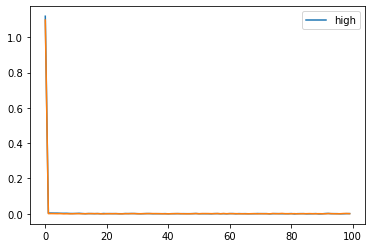

In [371]:
plt.plot(appoTOT_high,label = 'high')
plt.plot(appoTOT_low)
plt.legend()
plt.show()

In [19]:
def Compute_corr(df,T_corr,n):
    Corr = np.zeros(T_corr)
    
    for i in range(0,n):
        Corr+= correlation(df[i],df[i],np.arange(0,T_corr))/n
    return Corr

def Compute_xcorr(df1,df2,T_corr,n):
    Corr = np.zeros(T_corr)
    for i in range(0,n):
        Corr+= correlation(df1[i],df2[i],np.arange(0,T_corr))/n
    return Corr

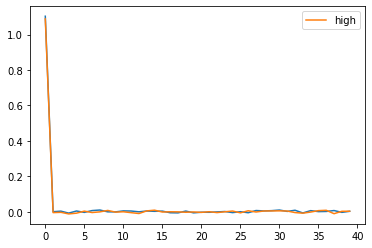

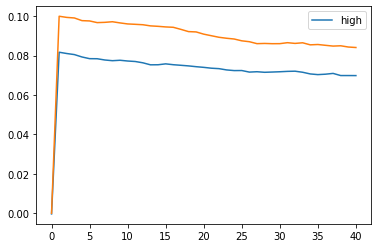

In [383]:
T_end = 40
T_corr = T_end
c_high_q_pl = Compute_corr(TOT_flow_high,T_end,n)
c_low_q_pl = Compute_corr(TOT_flow_low,T_end,n)

c_low = c_low_q_pl
c_high = c_high_q_pl

plt.plot(c_low_q_pl)#*30**(2-0.7))
plt.plot(c_high_q_pl,label='high')
#*30**(2-0.7))
plt.legend()
plt.show()
S_high_q_pl = Compute_xcorrR(TOT_flow_high,P_flow_high.shift(1),T_end+1,n)
S_low_q_pl = Compute_xcorrR(TOT_flow_low,P_flow_low.shift(1),T_end+1,n)

S_high = np.diff(S_high_q_pl)
S_low = np.diff(S_low_q_pl)

plt.plot(S_high_q_pl, label = 'high')
plt.plot(S_low_q_pl)
plt.legend()
plt.show()

In [384]:
N = T_end
A = np.empty((N,N))
C = c_high
for l in range(N):
    for n in range (N):
        A[l,n] = C[np.abs(n-l)]
        
A_inv = np.linalg.inv(A)
G_dot = np.matmul(A_inv,S_high)
G_high=np.cumsum(G_dot)


N = T_end
A = np.empty((N,N))
C = c_low
for l in range(N):
    for n in range (N):
        A[l,n] = C[np.abs(n-l)]
        
A_inv = np.linalg.inv(A)
G_dot = np.matmul(A_inv,S_low)
G_low = np.cumsum(G_dot)

In [385]:
g4 = G_high
G4 = G_low

In [ ]:
plt.plot(G2)
plt.plot(G3)
plt.plot(G4)
plt.plot(G5)
plt.plot(G6)
plt.plot(G7)
plt.plot(G8)
plt.plot(G9)
plt.plot(G10)
plt.plot(G20)
plt.plot(G40)
plt.plot(G80)

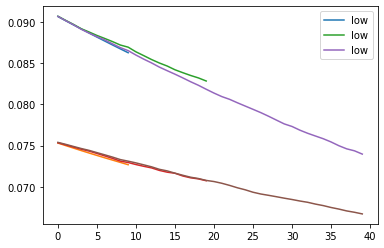

In [386]:
#plt.plot(S.cumsum())
plt.plot(G1, label = 'low')
plt.plot(g1)

plt.plot(G2, label = 'low')
plt.plot(g2)

plt.plot(G4, label = 'low')
plt.plot(g4)

#plt.plot(G8, label = 'low')
#plt.plot(g8)


#plt.plot(G16, label = 'low')
#plt.plot(g16)


plt.legend()


<ipython-input-579-ce9bf03d614a>:10: RuntimeWarning: divide by zero encountered in power
  plt.plot(np.arange(0,100)**(-.7))


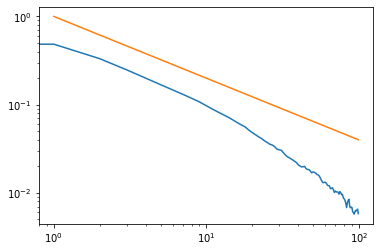

In [579]:
#c=0
T_corr=200
#pltfor i in range(0,2000):
#c += Compute_corr(TOT_flow,T_corr,n)
    #correlation(TOT_flow[i][100:], TOT_flow[i][100:], np.arange(0,300))/2000
#S = correlation(trades.sign, trades.r1, np.arange(0,1000))
c_low = corrTOT
plt.plot(c_low)
#plt.plot(appoQ)
plt.plot(np.arange(0,100)**(-.7))
plt.xscale('log')
plt.yscale('log')

In [177]:
R_usual = Compute_xcorrR(TOT_flow, P_flow.shift(1), 100,n)

In [178]:
import priceprop as prop
def tim1(s, G):
    return propagate(s, G)
from colorednoise import powerlaw_psd_gaussian
def propagate(s, G):
    """Simulate propagator model from signs and one kernel.
    Equivalent to tim1, one of the kernels in tim2 or hdim2.
    """
    steps = len(s)
    s  = s[:len(s)]
    p = fftconvolve(s, G)[:steps]
    return p

In [676]:
# autocorrelation exponents
gamma_s = 0.7  # ... of the signs
gamma_c = 3/2  # ... of the price-change indicator
# time steps to simulate
steps = 5*10**5 # 10**4 already gives usable results
# signs
s = powerlaw_psd_gaussian(1-gamma_s, steps)*np.sqrt(0.00452559234965807)*np.sqrt(1000)/np.sqrt(347.07245401659634)*np.sqrt(2)*np.sqrt(35)/np.sqrt(30)
# change indicator
c = (powerlaw_psd_gaussian(1-gamma_c, steps) > 0)

# simulate HDIM2 model as "ground truth"
# ---------------------------------------------

# maximum lag for propagator kernel
maxlag = 2**13
lags = np.arange(1,maxlag+1)

# time steps
t = np.arange(steps, dtype=int)

# some power law kernels
k_n = prop.k_pow(maxlag+1, prop.beta_from_gamma(gamma_s)) * 0.25
k_c = prop.k_pow(maxlag+1, prop.beta_from_gamma(gamma_s))* np.sqrt(0.023424149308375386/0.4512983859102702)/(np.sqrt(2)*np.sqrt(35))*np.sqrt(30)
k_n[0] = 0
k_n[1] = .1

r = tim1(s, k_c)

# simulate split over different days
mean_day_length = 2**13
trades = pd.DataFrame({
    'r1':         r,  # one-step mid-return
    'sign':       s,  # sign of a single trade (buy: 1, sell: -1) 
    'change':     c,  # change indicator
    # simulate days of different lenghts
    'date':       np.cumsum(np.random.rand(len(c)) / mean_day_length).astype(int)
})
# split in two sample groups for out-of-sample analysis
trades['sample'] = trades['date'] % 2

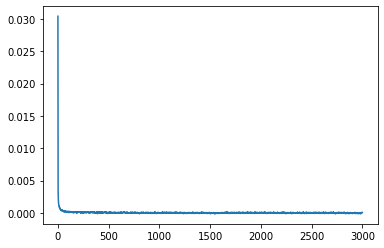

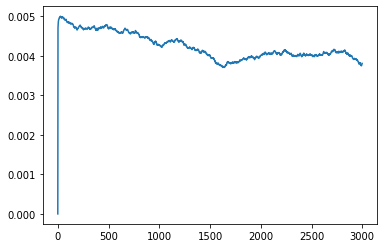

In [677]:
c_high_q_pl = correlation(trades.sign,trades.sign,np.arange(0,3000))
plt.plot(c_high_q_pl)#*30**(2-0.7))
plt.show()
S_high_q_pl = correlation(trades.sign,trades.r1,np.arange(0,3000))
plt.plot(S_high_q_pl.cumsum()-S_high_q_pl)
plt.show()

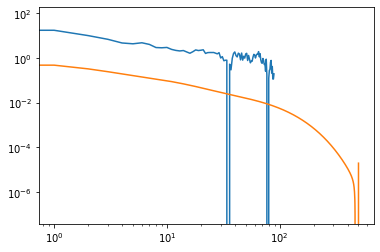

In [678]:
appo = 0.00452559234965807*np.fromfunction(lambda i,j: (1+np.abs(j))**(-0.7),(3000,3000))

ap = np.zeros(90,float)
for i in range(0,90):
    ap[i] = np.sum(appo2[:30,30*i:30*(i+1)])
plt.plot(ap)
plt.plot(C_tot[0])
plt.xscale('log')
plt.yscale('log')

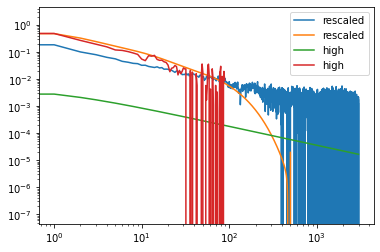

In [657]:
c_high_q_pl
appo2 = toeplitz(c_high_q_pl,c_high_q_pl)
plt.plot(appo2[0], label = 'rescaled')
plt.plot(C_tot[0], label = 'rescaled')
plt.plot(appo[0],label = 'high')
plt.plot(ap,label = 'high')
plt.legend()
plt.xscale('log')
plt.yscale('log')

In [ ]:
vgram_p_high_q_pl[29]

In [ ]:
2*appoP[0]*(1-appoP/appoP[0])[1]

In [ ]:
0.023424149308375386/0.4512983859102702

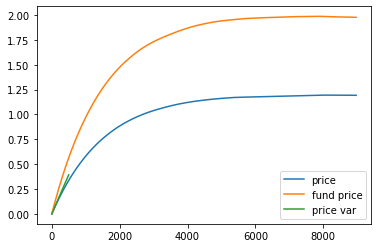

In [734]:
vgram_p_high_q_pl = variogram(trades.r1.cumsum(),np.arange(0,500))

plt.plot(np.arange(0,300)*30, 2*appoP[0]*(1-appoP/appoP[0])[:300],label = 'price')
plt.plot(np.arange(0,300)*30, 2*appoPF[0]*(1-appoPF/appoPF[0])[:300],label = 'fund price')
plt.plot(vgram_p_high_q_pl, label = 'price var')
#plt.plot(variogram(trades.pG[1000:6000], np.arange(0,500)), label = 'price G var')
plt.legend()
#plt.ylim()
#plt.xlim(0,300)
#print(vgram_p[30])

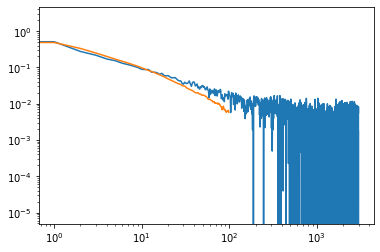

In [681]:
plt.plot(c_high_q_pl*30**(2-0.7))
plt.plot(corrTOT[:100])
plt.xscale('log')
plt.yscale('log')

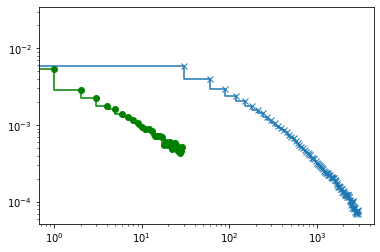

In [610]:
plt.step(np.arange(0,100)*30, corrTOT[:100]/30**(2-0.7),marker = 'x', label = r'$q_{(30)}$')
plt.step(np.arange(0,30),c_high_q_pl[:30],marker = 'o', color = 'green', label = r'$q $')
plt.xscale('log')
plt.yscale('log')

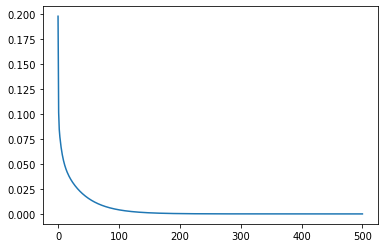

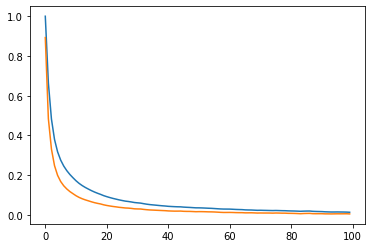

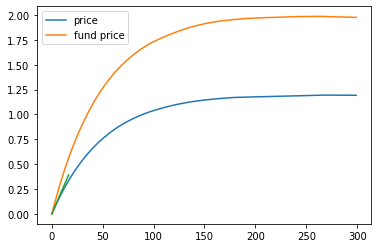

(0.0, 100.0)

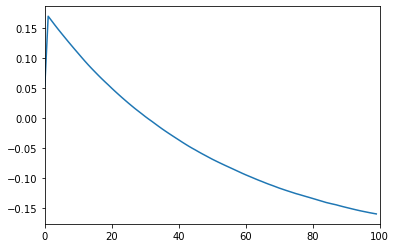

In [736]:
plt.plot(G[0])
plt.show()
corrNT = appoNT_high
#corrNT = Compute_corr(NT_flow,300,n)
#corrTOT = Compute_corr(TOT_flow,300,n)
plt.plot(corrNT)
plt.plot(corrTOT)
#plt.xscale('log')
#plt.yscale('log')

#appoP = Compute_corr(P_flow,300,n)
#appoPF = Compute_corr(p_F_flow,300,n)

#plt.plot(g[1:])
plt.show()
vgram_p_q_pl = 2*appoP[0]*(1-appoP/appoP[0])
vgram_pf_q_pl = 2*appoPF[0]*(1-appoPF/appoPF[0])
plt.plot(2*appoP[0]*(1-appoP/appoP[0]),label = 'price')
plt.plot(2*appoPF[0]*(1-appoPF/appoPF[0]),label = 'fund price')
#plt.plot(2*(1-appoP/appoP[0]),label = 'price')
#plt.plot(2*(1-appoPF/appoPF[0]),label = 'fund price')


#R_usual = Compute_xcorrR(TOT_flow, P_flow.shift(1), 100,n)
plt.plot(np.arange(0,500)/30,vgram_p_high_q_pl)
plt.legend()
plt.show()
plt.plot(R_usual)
plt.xlim(0,100)

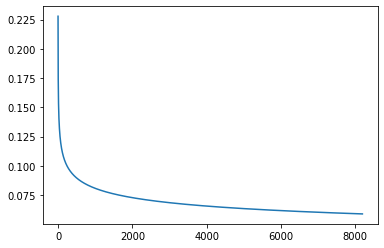

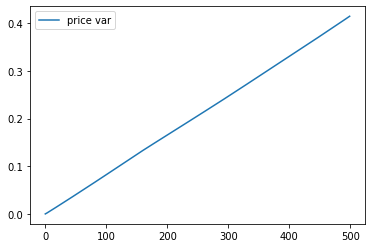

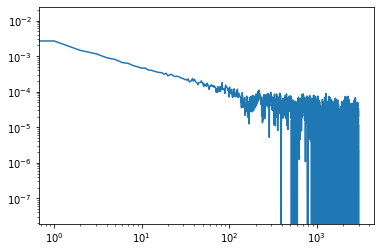

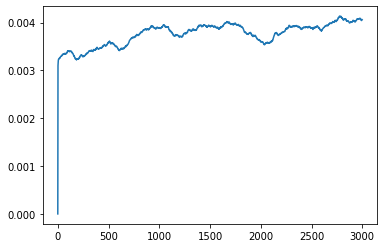

In [100]:
plt.plot(k_c.cumsum())
plt.show()
plt.plot(vgram_p_high_q_pl, label = 'price var')
#plt.plot(variogram(trades.pG[1000:6000], np.arange(0,500)), label = 'price G var')
plt.legend()
plt.show()
plt.plot(c_high_q_pl)#*30**(2-0.7))
plt.xscale('log')
plt.yscale('log')
plt.show()
plt.plot(S_high_q_pl.cumsum()-S_high_q_pl)
plt.show()

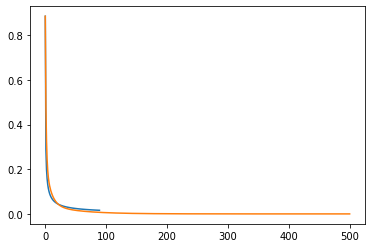

In [185]:
appo = 0.00452559234965807*np.fromfunction(lambda i,j: (1+np.abs(j))**(-0.7),(3000,3000))

ap = np.zeros(90)
for i in range(0,90):
    ap[i] = np.sum(appo[:30,30*i:30*(i+1)])
plt.plot(ap)
plt.plot(C_tot[0])

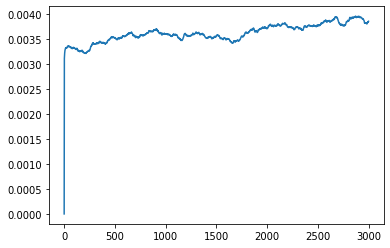

In [186]:
#plt.plot(np.arange(0,99)*30,R_usual[1:])
plt.plot(S_high_q_pl.cumsum()-S_high_q_pl)

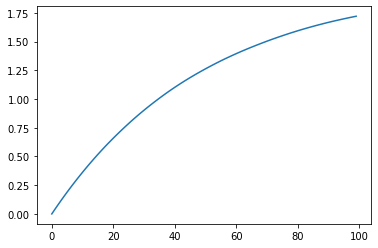

In [316]:
plt.plot(vgram_pf_q_pl)

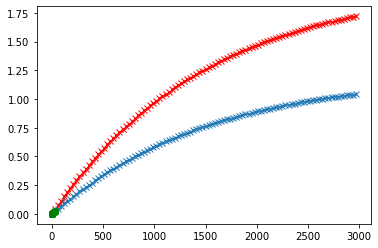

In [315]:
plt.step(np.arange(0,100)*30, vgram_pf_q_pl[:100],where = 'post', color = 'red', label = 'fund price vgram low freq',marker = 'x')
plt.step(np.arange(0,100)*30, vgram_p_q_pl,where = 'post', label = 'price vgram low freq',marker = 'x')
plt.step(np.arange(0,30), np.arange(0,30)*vgram_p_q_pl[1]/30,where = 'post', color = 'green', label = 'price vgram low freq',marker = 'o')


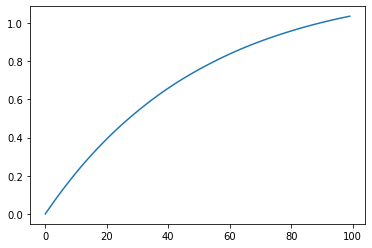

In [727]:
plt.plot(vgram_p_q_pl)

<ipython-input-812-2fba4db06d80>:15: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax3.set_xlim((0, 3000))
<ipython-input-812-2fba4db06d80>:117: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax2.set_xlim((0, 3000))
<ipython-input-812-2fba4db06d80>:161: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


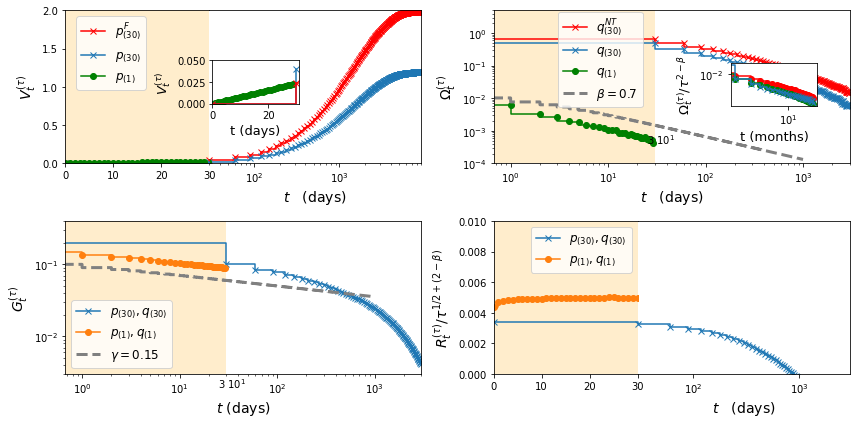

In [812]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.set_size_inches(12, 6, forward=True)

#fig.suptitle('Power-law order flow')
#ax1.plot(x, y)


#ax1 = plt.subplot(111)
ax3.step(np.arange(0,100)*30, G[0][:100],where = 'post', marker = 'x', label =r'$p_{(30)}, q_{(30)}$')
ax3.step(np.arange(0,30),k_c.cumsum()[:30],where = 'post', marker = 'o', label =r'$p_{(1)}, q_{(1)}$')
ax3.step(np.arange(0,1000),0.1*np.arange(1,1001)**(-0.15),where = 'post', color = 'grey',  linewidth = 3, label = r'$\gamma = 0.15$', linestyle = 'dashed')
ax3.legend(fontsize = 12)
ax3.set_yscale('log')
ax3.set_xscale('log')
ax3.set_xlim((0, 3000))
#ax1.spines['left'].set_visible(False)
ax3.yaxis.set_ticks_position('left')
#ax1.yaxis.set_visible(False)
ax3.set_ylabel(r'$G_t^{(\tau)}$', size=14)
ax3.set_xlabel(r'$ t $'+' (days)', size = 14)


#plt.tight_layout()


#ax2 = plt.subplot(111)
ax4.step(np.arange(0,99)*30, R_usual[1:]/30**(1/2+(2-0.7)/2),where = 'post', marker = 'x')
ax4.set_xscale('symlog')
ax4.set_xlim((30, 3000))
ax4.spines['left'].set_visible(False)
ax4.yaxis.set_ticks_position('left')
ax4.yaxis.set_visible(False)
ax4.set_xlabel(r'$ t $'+'   (days)', size = 14)

divider = make_axes_locatable(ax4)
axLin4 = divider.append_axes("left", size=2.0, pad=0, sharey=ax4)
axLin4.set_xscale('linear')
axLin4.set_xlim((0, 30))
axLin4.step(np.arange(0,99)*30,R_usual[1:]/30**(1/2+(2-0.7)/2),where = 'post', marker = 'x',label =r'$p_{(30)}, q_{(30)}$')
axLin4.step(np.arange(0,2999),(S_high_q_pl.cumsum()-S_high_q_pl)[1:],where = 'post', marker = 'o', label = r'$p_{(1)}, q_{(1)}$')
axLin4.spines['right'].set_visible(False)
axLin4.set_ylabel(r'$R_t^{(\tau)}/\tau^{1/2+(2-\beta)}$', size = 14)
plt.legend(fontsize = 12)

#axLin.yaxis.set_ticks_position('right')
plt.setp(axLin4.get_xticklabels(), visible=True)



plt.tight_layout()


ax1.step(np.arange(0,300)*30, vgram_pf_q_pl,where = 'post', color = 'red', label = 'fund price vgram low freq',marker = 'x')
ax1.step(np.arange(0,300)*30, vgram_p_q_pl,where = 'post', label = 'price vgram low freq',marker = 'x')
ax1.step(np.arange(0,30), np.arange(0,30)*vgram_p_q_pl[1]/30,where = 'post', color = 'green', label = 'price vgram low freq',marker = 'o')






ax1.set_xscale('log', base = 10)
ax1.set_xlim((30, 9000))
ax1.spines['left'].set_visible(False)
ax1.yaxis.set_ticks_position('left')
ax1.yaxis.set_visible(False)


divider = make_axes_locatable(ax1)
axLin1 = divider.append_axes("left", size=2.0, pad=0, sharey=ax1)
axLin1.set_xscale('linear')
axLin1.set_xlim((0, 29.99))
axLin1.step(np.arange(0,300)*30,vgram_pf_q_pl,where = 'post', color = 'red', label = r'$p^F_{(30)}$',marker = 
'x')
axLin1.step(np.arange(0,300)*30, vgram_p_q_pl,where = 'post', label = r'$p_{(30)}$',marker = 
'x')
axLin1.step(np.arange(0,30), np.arange(0,30)*vgram_p_q_pl[1]/30, color = 'green', where = 'post', label = r'$p_{(1)}$',marker = 
'o')

#plt.plot(np.arange(0,30)*vgram_day*1/30, label = 'price vgram high freq')
axLin1.spines['right'].set_visible(False)
#axLin3.yaxis.set_ticks_position('right')
plt.setp(axLin1.get_xticklabels(), visible=True)
ax1.set_ylim(0,2)



left, bottom, width, height = [0.25, 0.75, 0.1, 0.1]
ax5 = fig.add_axes([left, bottom, width, height])
ax5.step(np.arange(0,30), np.arange(0,30)*vgram_p_q_pl[1]/30,where = 'post', label = r'$p$', marker ='o', color = 'green')
ax5.step(np.arange(0,2)*30, vgram_pf_q_pl[:2],where = 'post', label = r'$p^F_{(30)}$', marker ='x')
ax5.set_xlim(0,31)
ax5.set_ylim(0,0.05)
ax5.step(np.arange(0,100)*30, vgram_p_q_pl[:100],where = 'post', label = r'$p$', marker ='x', color = 'red')
ax5.set_ylabel(r'$V^{(\tau)}_t$', size = 13)
ax5.set_xlabel('t (days)', size = 13)



#plt.setp(axLin3.get_xticklabels(), visible=True)
axLin1.legend(bbox_to_anchor=[0.6,1],fontsize = 12)

axLin1.set_ylabel(r'$V_t^{(\tau)}$', size = 14)
ax1.set_xlabel(r'$ t $'+'   (days)', size = 14)


#ax4 = plt.subplot(111)
ax2.step(np.arange(0,100)*30, corrNT[:100],marker = 'x', color = 'red', label = r'$q^{NT}_{(30)}$')
ax2.step(np.arange(0,100)*30, corrTOT[:100],marker = 'x', label = r'$q_{(30)}$')
ax2.step(np.arange(0,30),c_high_q_pl[:30],marker = 'o', color = 'green', label = r'$q_{(1)} $')
ax2.step(np.arange(0,1000),0.5*np.arange(1,1001)**(-0.7)/30, color = 'grey', linewidth = 3, label = r'$\beta = 0.7$', linestyle = 'dashed')

ax2.set_ylabel(r'$\Omega_t^{(\tau)}$', size = 14)
ax2.set_xlabel(r'$ t $'+'   (days)', size = 14)
ax2.set_yscale('log', base = 10)
ax2.set_xscale('log', base = 10)
ax2.set_xlim((0, 3000))

ax2.legend(bbox_to_anchor = [0.3,0.33], fontsize = 12)
#ax4.spines['left'].set_visible(False)
ax2.yaxis.set_ticks_position('left')
#ax4.yaxis.set_visible(False)


axLin1.fill_between((0,29.99), -1, 80, facecolor='orange', alpha=0.2) # blocked area for first axes
axLin4.fill_between((0,29.99), 0, 80, facecolor='orange', alpha=0.2) # blocked area for first axes
ax3.fill_between((0,29.99), 0, 80, facecolor='orange', alpha=0.2) # blocked area for first axes
ax2.fill_between((0,29.99), 0, 80, facecolor='orange', alpha=0.2) # blocked area for first axes

left, bottom, width, height = [0.85, 0.745, 0.1, 0.1]
ax6 = fig.add_axes([left, bottom, width, height])
ax6.step(np.arange(0,30), corrNT[:30]/30**((2-0.7)),where = 'post', marker ='o', color = 'red')
ax6.step(np.arange(0,30), corrTOT[:30]/30**((2-0.7)),where = 'post', marker ='o', color = 'green')
ax6.step(np.arange(0,30),c_high_q_pl[:30],where = 'post', marker ='x')
ax6.set_xlabel('t (months)', size = 13)
ax6.set_xscale('log')
ax6.set_yscale('log')
#ax6.set_ylim()

#ax5.set_xlim(0,31)
#ax5.set_ylim(0,0.05)
#ax5.step(np.arange(0,100)*30, vgram_p_q_pl,where = 'post', label = r'$p$', marker ='x', color = 'red')


#plt.legend()
ax1.set_ylim(0,2)
ax3.set_ylim(0.003,.4)
ax4.set_ylim(0,0.01)
ax2.set_ylim(1*10**(-4),5*10**(0))

axLin1.text(28.7,-0.19,'30')
#axLin4.text(28.5,-0.0006,'30')
ax3.text(25,0.0019,'3'+' '+r'$10^1$')

ax2.text(25,0.0004,'3'+' '+r'$10^1$')

ax6.set_ylabel(r'$\Omega_t^{(\tau)}/\tau^{2-\beta}$', size = 13)



plt.tight_layout()

plt.savefig('power_law_sketch_2.pdf')
#ax2.plot(x, -y)

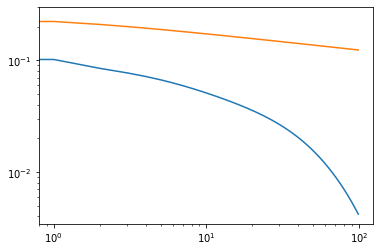

In [368]:
plt.plot(G[0][:100])
plt.plot(k_c.cumsum()[:100])
plt.xscale('log')
plt.yscale('log')

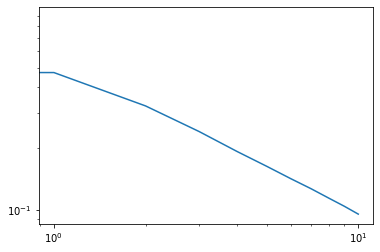

In [2845]:
plt.plot(corrTOT[:11])
plt.xscale('log')
plt.yscale('log')

In [2807]:
G[0][:11]

array([0.21697488, 0.11287259, 0.09298314, 0.08414675, 0.07753877,
       0.07195779, 0.06713058, 0.06291711, 0.05921248, 0.05593185,
       0.05300573])

In [2765]:
N = 5000
A = np.empty((N,N))
C = c
for l in range(N):
    for n in range (N):
        A[l,n] = C[np.abs(n-l)]
        
A_inv = np.linalg.inv(A)
G_dot = np.matmul(A_inv,S)
G=np.cumsum(G_dot)

KeyboardInterrupt: 

In [2240]:
N = 50
A = np.empty((N,N))
C = c
for l in range(N):
    for n in range (N):
        A[l,n] = C[np.abs(n-l)]
        
A_inv = np.linalg.inv(A)
G_dot = np.matmul(A_inv,S[:50])

In [2241]:
G_final = np.zeros(50)
G_final[0] = -G_dot.cumsum().min()
for i in range(0,49):
    G_final[i+1] = G_dot[i]+G_final[i]

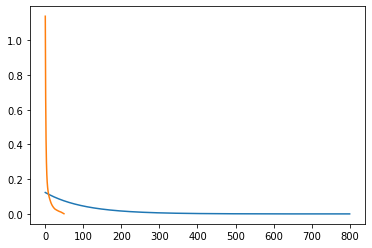

In [2242]:
G_high=np.cumsum(G_dot)
plt.plot(G[0])
plt.plot(G_final)
#plt.plot(G_high-G_high[98])
#plt.plot(G_high)
#plt.plot(0.2*np.arange(100)**(-0.15))
#plt.xscale('log')
#plt.yscale('log')

In [2156]:
G_ap = G_high-G_high[49]

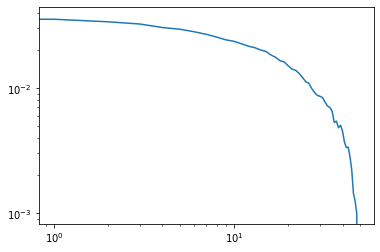

In [2157]:
plt.plot(G_ap)
plt.xscale('log')
plt.yscale('log')

In [78]:
G_q_indip = G
G_0_day_q_indip = G_0_day
R_usual_q_indip = R_usual
R_day_q_indip = G_0_day*C_0_q_day
vgram_p_f_q_indip = 2*appoPF[0]*(1-appoPF/appoPF[0])
vgram_p_q_indip = 2*appoP[0]*(1-appoP/appoP[0])
vgram_day = 2*G_0**2*C_0_q/(1-alpha_mu**2)*1/20
corrtot_q_indip = corrTOT
corrtot_day_q_indip = corrTOT/30


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.set_size_inches(10, 5, forward=True)

fig.suptitle('Independent order flow')
#ax1.plot(x, y)


#ax1 = plt.subplot(111)
ax1.plot(np.arange(0,501)*30, G_q_indip[0])
ax1.set_xscale('log', base = 10)
ax1.set_xlim((30, 3000))
ax1.spines['left'].set_visible(False)
ax1.yaxis.set_ticks_position('left')
ax1.yaxis.set_visible(False)


divider = make_axes_locatable(ax1)
axLin = divider.append_axes("left", size=2.0, pad=0, sharey=axMain)
axLin.set_xscale('linear')
axLin.set_xlim((0, 29.99))
axLin.plot(np.arange(0,501)*30,G_q_indip[0])
axLin.plot(G_0_day_q_indip*np.ones(30))
axLin.spines['right'].set_visible(False)
#axLin.yaxis.set_ticks_position('right')
ax1.set_ylim(0,0.25)

axLin.set_ylabel(r'$G_t$', size = 14)
ax1.set_xlabel(r'$ t $'+'   (time)', size = 14)

plt.setp(axLin.get_xticklabels(), visible=True)
#plt.tight_layout()


#ax2 = plt.subplot(111)
ax2.plot(np.arange(0,99)*30, R_usual_q_indip[1:])
ax2.set_xscale('log', base = 10)
ax2.set_xlim((30, 3000))
ax2.spines['left'].set_visible(False)
ax2.yaxis.set_ticks_position('left')
ax2.yaxis.set_visible(False)
ax2.set_xlabel(r'$ t $'+'   (time)', size = 14)

divider = make_axes_locatable(ax2)
axLin2 = divider.append_axes("left", size=2.0, pad=0, sharey=ax2)
axLin2.set_xscale('log')
axLin2.set_xlim((0, 29.99))
axLin2.plot(np.arange(0,99)*30,R_usual_q_indip[1:])
axLin2.plot((R_day_q_indip*np.ones(30)))
axLin2.spines['right'].set_visible(False)
axLin2.set_ylabel(r'$R_t$', size = 14)

#axLin.yaxis.set_ticks_position('right')
plt.setp(axLin2.get_xticklabels(), visible=True)
ax2.set_ylim(0,.5)


plt.tight_layout()


ax3.plot(np.arange(0,100)*30, 2*appoPF[0]*(1-appoPF/appoPF[0]))
ax3.plot(np.arange(0,100)*30, 2*appoP[0]*(1-appoP/appoP[0]))
ax3.set_xscale('log', base = 10)
ax3.set_xlim((30, 3000))
ax3.spines['left'].set_visible(False)
ax3.yaxis.set_ticks_position('left')
ax3.yaxis.set_visible(False)


divider = make_axes_locatable(ax3)
axLin3 = divider.append_axes("left", size=2.0, pad=0, sharey=ax3)
axLin3.set_xscale('linear')
axLin3.set_xlim((0, 29.99))
axLin3.plot(np.arange(0,100)*30,vgram_p_f_q_indip, label = 'fund price vgram low freq')
axLin3.plot(np.arange(0,100)*30, vgram_p_q_indip, label = 'price vgram low freq')
plt.plot(np.arange(0,30)*vgram_day*1/30, label = 'price vgram high freq')
#axLin3.plot((G_0_day*C_0_q_day*np.ones(30)))
axLin3.spines['right'].set_visible(False)
#axLin3.yaxis.set_ticks_position('right')
plt.setp(axLin3.get_xticklabels(), visible=True)
ax3.set_ylim(0,2)
plt.legend(bbox_to_anchor=(1.2, 1))

axLin3.set_ylabel(r'$vgram_t$', size = 14)
ax3.set_xlabel(r'$ t $'+'   (time)', size = 14)


#ax4 = plt.subplot(111)
ax4.plot(np.arange(0,100)*30, corrtot_q_indip)
ax4.plot(np.arange(0,100)*30,corrtot_day_q_indip)
ax4.set_xscale('log', base = 10)
ax4.set_xlim((30, 3000))
ax4.spines['left'].set_visible(False)
ax4.yaxis.set_ticks_position('left')
ax4.yaxis.set_visible(False)


divider = make_axes_locatable(ax4)
axLin4 = divider.append_axes("left", size=2.0, pad=0, sharey=ax4)
axLin4.set_xscale('linear')
axLin4.set_xlim((0, 29.99))
axLin4.plot(np.arange(0,100)*30,corrtot_q_indip, label = 'order flow low freq')
axLin4.plot(np.arange(0,100),corrtot_day_q_indip , label = 'order flow high freq')
#axLin4.plot((G_0_day*C_0_q_day*np.ones(30)))
axLin4.spines['right'].set_visible(False)
#axLin4.yaxis.set_ticks_position('right')
plt.setp(axLin4.get_xticklabels(), visible=True)
ax4.set_ylim(0,1.5)
plt.legend()

axLin4.set_ylabel(r'$corr_t$', size = 14)
ax4.set_xlabel(r'$ t $'+'   (time)', size = 14)

#ax2.plot(x, -y)

NameError: name 'G_0_day' is not defined

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
fig = plt.gcf()
fig.set_size_inches(7, 5, forward=True)
# Numbers from -50 to 50, with 0.1 as step
xdomain = np.arange(-500,500, 0.1)

axMain = plt.subplot(111)
axMain.plot(np.arange(0,501)*30, G[0])
axMain.set_xscale('log', base = 10)
axMain.set_xlim((30, 3000))
axMain.spines['left'].set_visible(False)
axMain.yaxis.set_ticks_position('left')
axMain.yaxis.set_visible(False)


divider = make_axes_locatable(axMain)
axLin = divider.append_axes("left", size=2.0, pad=0, sharey=axMain)
axLin.set_xscale('linear')
axLin.set_xlim((0, 29.99))
axLin.plot(np.arange(0,501)*30,G[0])
axLin.plot(G_0_day*np.ones(30))
axLin.spines['right'].set_visible(False)
#axLin.yaxis.set_ticks_position('right')
plt.setp(axLin.get_xticklabels(), visible=True)
plt.ylim(0,0.25)

plt.ylabel(r'$G_t$', size = 14)
plt.xlabel(r'$ t $'+'   (time)', size = 14)
plt.tight_layout()

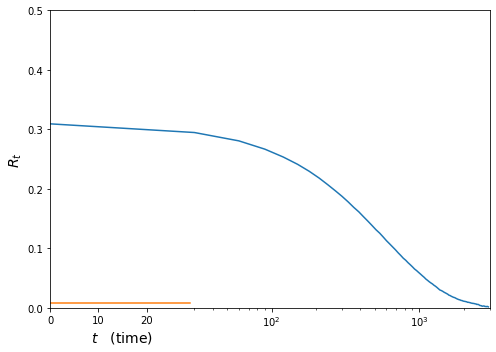

In [2608]:
fig = plt.gcf()
fig.set_size_inches(7, 5, forward=True)
# Numbers from -50 to 50, with 0.1 as step
xdomain = np.arange(-500,500, 0.1)

ax2 = plt.subplot(111)
ax2.plot(np.arange(0,99)*30, R_usual[1:])
ax2.set_xscale('log', base = 10)
ax2.set_xlim((30, 3000))
ax2.spines['left'].set_visible(False)
ax2.yaxis.set_ticks_position('left')
ax2.yaxis.set_visible(False)


divider = make_axes_locatable(ax2)
axLin = divider.append_axes("left", size=2.0, pad=0, sharey=ax2)
axLin.set_xscale('linear')
axLin.set_xlim((0, 29.99))
axLin.plot(np.arange(0,99)*30,R_usual[1:])
axLin.plot((G_0_day*C_0_q_day*np.ones(30)))
axLin.spines['right'].set_visible(False)
#axLin.yaxis.set_ticks_position('right')
plt.setp(axLin.get_xticklabels(), visible=True)
plt.ylim(0,.5)

plt.ylabel(r'$R_t$', size = 14)
plt.xlabel(r'$ t $'+'   (time)', size = 14)
plt.tight_layout()

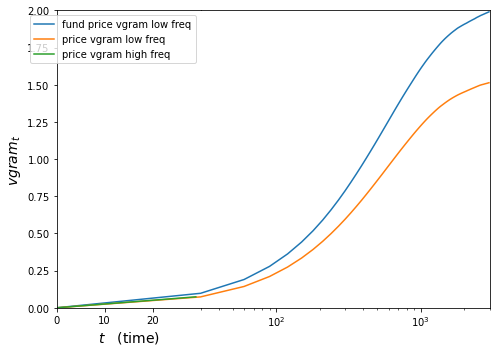

In [2621]:
fig = plt.gcf()
fig.set_size_inches(7, 5, forward=True)
# Numbers from -50 to 50, with 0.1 as step
xdomain = np.arange(-500,500, 0.1)

ax3 = plt.subplot(111)
ax3.plot(np.arange(0,100)*30, 2*appoPF[0]*(1-appoPF/appoPF[0]))
ax3.plot(np.arange(0,100)*30, 2*appoP[0]*(1-appoP/appoP[0]))
ax3.set_xscale('log', base = 10)
ax3.set_xlim((30, 3000))
ax3.spines['left'].set_visible(False)
ax3.yaxis.set_ticks_position('left')
ax3.yaxis.set_visible(False)


divider = make_axes_locatable(ax3)
axLin3 = divider.append_axes("left", size=2.0, pad=0, sharey=ax3)
axLin3.set_xscale('linear')
axLin3.set_xlim((0, 29.99))
axLin3.plot(np.arange(0,100)*30,2*appoPF[0]*(1-appoPF/appoPF[0]), label = 'fund price vgram low freq')
axLin3.plot(np.arange(0,100)*30, 2*appoP[0]*(1-appoP/appoP[0]), label = 'price vgram low freq')
plt.plot(np.arange(0,30)*2*G_0**2*C_0_q/(1-alpha_mu**2)*1/20*1/30, label = 'price vgram high freq')
#axLin3.plot((G_0_day*C_0_q_day*np.ones(30)))
axLin3.spines['right'].set_visible(False)
#axLin3.yaxis.set_ticks_position('right')
plt.setp(axLin3.get_xticklabels(), visible=True)
ax3.set_ylim(0,2)
plt.legend()

axLin3.ylabel(r'$vgram_t$', size = 14)
ax3.set_xlabel(r'$ t $'+'   (time)', size = 14)
plt.tight_layout()

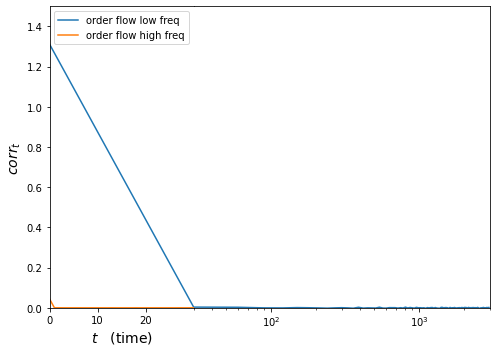

In [2627]:
fig = plt.gcf()
fig.set_size_inches(7, 5, forward=True)
# Numbers from -50 to 50, with 0.1 as step
xdomain = np.arange(-500,500, 0.1)

ax4 = plt.subplot(111)
ax4.plot(np.arange(0,100)*30, corrTOT)
axLin4.plot(np.arange(0,100)*30,corrTOT/30)
ax4.set_xscale('log', base = 10)
ax4.set_xlim((30, 3000))
ax4.spines['left'].set_visible(False)
ax4.yaxis.set_ticks_position('left')
ax4.yaxis.set_visible(False)


divider = make_axes_locatable(ax4)
axLin4 = divider.append_axes("left", size=2.0, pad=0, sharey=ax4)
axLin4.set_xscale('linear')
axLin4.set_xlim((0, 29.99))
axLin4.plot(np.arange(0,100)*30,corrTOT, label = 'order flow low freq')
axLin4.plot(np.arange(0,100),corrTOT/30, label = 'order flow high freq')
#axLin4.plot((G_0_day*C_0_q_day*np.ones(30)))
axLin4.spines['right'].set_visible(False)
#axLin4.yaxis.set_ticks_position('right')
plt.setp(axLin4.get_xticklabels(), visible=True)
ax4.ylim(0,1.5)
plt.legend()

axLin4.set_ylabel(r'$corr_t$', size = 14)
ax4.set_xlabel(r'$ t $'+'   (time)', size = 14)
plt.tight_layout()

In [2492]:
vgram = np.zeros(100)
for i in range(0,2000):
    vgram+= variogram(pd.DataFrame(propagate(TOT_flow[i][300:], G[0])),np.arange(0,100))

In [2499]:
G_0 = (1-(1-np.sqrt(1-alpha_mu**2))/alpha_mu**2)
C_0_q = (1+np.sqrt(1-alpha_mu**2))

G_0_day = G_0*1/np.sqrt((1-alpha_mu**2)*tau_mu)
C_0_q_day = C_0_q/30
G_0**2*C_0_q

0.07272733785910261

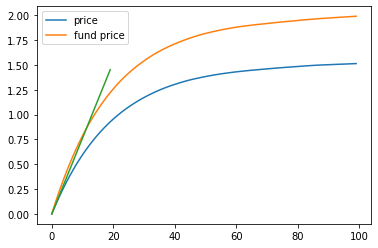

In [2617]:
plt.plot(2*appoP[0]*(1-appoP/appoP[0]),label = 'price')
plt.plot(2*appoPF[0]*(1-appoPF/appoPF[0]),label = 'fund price')
#plt.plot(vgram/2000, label = 'price G_high var')
plt.plot(np.arange(0,20)*2*G_0**2*C_0_q/(1-alpha_mu**2)*1/20)
plt.legend()

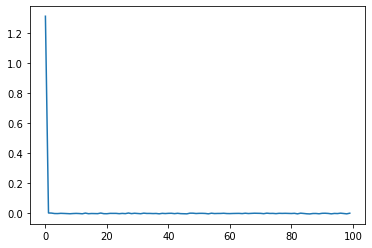

In [2497]:
plt.plot(corrTOT)

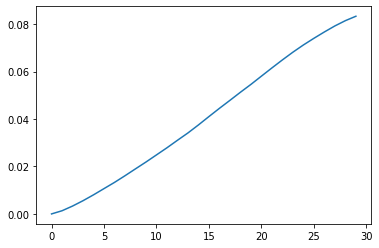

In [2304]:
plt.plot(variogram(pd.DataFrame(propagate(TOT_flow[40], G_ap)), np.arange(0,30)), label = 'price G_high var')

In [37]:
cash_MM_flow = TOT_flow*S_flow
cash_IT_flow = -IT_flow*S_flow
cash_NT_flow = -NT_flow*S_flow

In [87]:
v_MM=np.zeros(100)
v_IT=np.zeros(100)
v_NT=np.zeros(100)
for i in range(0,100):
    mu_flow = np.sqrt(C_mu_0)*pd.DataFrame(vol_flow_exp(frequency_mu,T+1,n))
    if tau_NT == 0:
        NT_flow = np.sqrt(C_NT_0)*pd.DataFrame(vol_flow_delta(T+1,n)).transpose()
    else:
        NT_flow = np.sqrt(C_NT_0)*pd.DataFrame(vol_flow_exp(1/tau_NT,T+1,n))
    TOT_flow = pd.DataFrame(D_NT.dot(NT_flow)+ D_mu.dot(mu_flow) )
    IT_flow = pd.DataFrame(D_IT_NT.dot(NT_flow)+ D_mu.dot(mu_flow) )
    P_flow = pd.DataFrame(G.dot(TOT_flow))

    p_F_flow = (SumC_mu.transpose()[0][0]*mu_flow).shift(-1).dropna()
    p_F_flow = p_F_flow.reset_index()
    p_F_flow = p_F_flow.drop(columns = 'index')

    TOT_flow = TOT_flow[:-1].reset_index().drop(columns = 'index')
    IT_flow = IT_flow[:-1].reset_index().drop(columns = 'index')
    NT_flow = NT_flow[:-1].reset_index().drop(columns = 'index')
    P_flow = P_flow[:-1].reset_index().drop(columns = 'index')

    S_flow = P_flow-p_F_flow

    avg_cash_MM = 0
    avg_cash_IT = 0
    avg_cash_NT = 0
    cash_MM_flow = TOT_flow*S_flow
    cash_IT_flow = -IT_flow*S_flow
    cash_NT_flow = -NT_flow*S_flow
    for j in range(0,n):
        avg_cash_MM += cash_MM_flow[j][:10].mean()/n
        avg_cash_IT += cash_IT_flow[j][:10].mean()/n
        avg_cash_NT += cash_NT_flow[j][:10].mean()/n
    v_MM[i] = avg_cash_MM
    v_IT[i] = avg_cash_IT
    v_NT[i] = avg_cash_NT

In [2426]:
G_0_month = (1-(1-np.sqrt(1-alpha_mu**2))/alpha_mu**2)

In [2427]:
G_0_day = np.sqrt(2)*G_0_month/np.sqrt(1-alpha_mu**2)*1/np.sqrt(tau_mu)

In [2403]:
def variogram(df, taus):
    v =  np.vectorize(lambda tau: (((df - df.shift(-tau))**2).mean()).mean())
    return v(taus)

In [2431]:
p_day = G_0_day*(q_day.cumsum())

In [2404]:
v = np.zeros(300)
#for i in range(0,500):
v= variogram(p_day, np.arange(0,300))

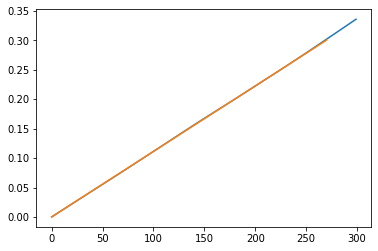

In [2405]:
plt.plot(v)
plt.plot(np.arange(0,10)*30,2*C_q_0_month*G_0_month**2/(1-alpha_mu**2)*1/tau_mu*np.arange(0,10))

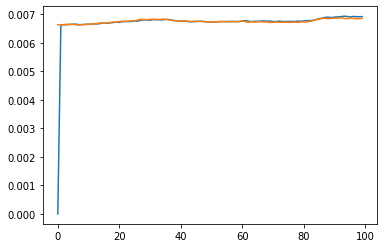

In [2442]:
#R_diff = Compute_xcorr(q_day, p_day.diff(),100,n)
R = Compute_xcorrR(q_day, p_day,100,n)
plt.plot(R_diff.cumsum()-R_diff)
plt.plot(R)
#plt.axhline(G_0_day*C_q_0_day)

# 4th figure

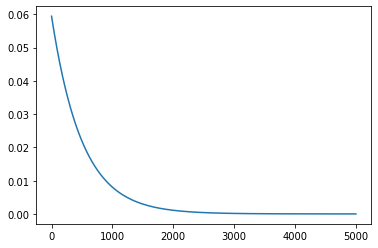

KeyboardInterrupt: 

In [317]:
n = 2000
T = 5000
T_corr = 200
tipo = 'mark'


tau_mu = 500
frequency_mu = 1/tau_mu
alpha_mu = np.exp(-1/tau_mu)

tau_NT = 0
if tau_NT == 0:
    alpha_NT = 0
else:
    alpha_NT = np.exp(-1/tau_NT)

C_mu_0 = ((1-alpha_mu)/alpha_mu)**2
C_NT_0 = 1


param = [tau_mu,tau_NT]
param_ampli = [C_mu_0,C_NT_0]

T_it = 200
G,D_NT,D_mu,C_p,C_tot,D_IT_NT,SumC_mu =  Numerical_solver_myopic_GENERAL(T+1,T_it,tipo, param_ampli,param,g)

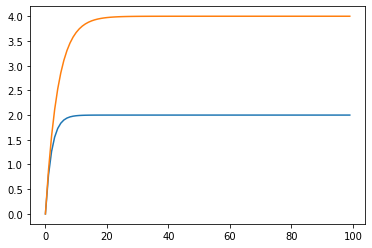

In [9]:
plt.plot(2*(1-np.exp(-np.arange(0,100)/2)))
plt.plot(4*(1-np.exp(-np.arange(0,100)/4)))

In [329]:
def Numerical_solver_myopic_MARKOV(T,T_it,alpha_mu,alpha_NT, C_mu_0,C_NT_0,tau_mu):
    
    critical = []
    
    G_0_seed = 1
    alpha_G = alpha_mu
    G_seed = G_0_seed*np.fromfunction(lambda i,j : alpha_G**np.abs(i-j)*np.heaviside(j-i,1), (T,T),dtype = np.float)
    G = G_seed
    
    G_record = np.zeros((T_it+1,T),dtype = np.float)
    G_record[0] = G[0]
    
    C_mu = C_mu_0* np.fromfunction(lambda i,j : alpha_mu**np.abs(i-j), (T,T), dtype = np.float)
    if alpha_NT == 0:
        print('sono qui')
        C_NT = C_NT_0* np.fromfunction(lambda i,j : np.vectorize(delta)(i-j), (T,T), dtype = np.float)
    else:
        C_NT = C_NT_0* np.fromfunction(lambda i,j : alpha_NT**np.abs(i-j), (T,T), dtype = np.float)
    
    
    L = np.fromfunction(lambda i, j: np.vectorize(delta)(i-j+1), (T,T), dtype = np.float)

    SumC_mu  = np.zeros(T, dtype = np.float)
    for i in range (0,T):
            if i==0:
                SumC_mu[i] = np.sum(C_mu[0,:])
            if i==1:
                SumC_mu[i] = np.sum(C_mu[0,:])-C_mu[0,0]
            if i>1:
                SumC_mu[i]  = np.sum(C_mu[0,:])-np.sum(C_mu[:i,:i][0,:])
    SumC_mu = SumC_mu/C_mu_0
    
    for j in range(0,T_it):
        plt.plot(G[0])
        plt.show()
        Inv_G_sym = np.linalg.inv(G+np.transpose(G))
        
        k_mu = alpha_mu * Inv_G_sym.dot(SumC_mu)[0]
        K_mu = k_mu *L
        
        k0 = -Inv_G_sym[0,:].dot(np.transpose(G)).dot(C_NT[:,0])*alpha_NT/C_NT_0
        K_0 = k0 *L
        #K_0 = 0*L
        
        Gfutpast = np.zeros((T,T),dtype = np.float)
        for i in range (0,T):
            Gfutpast[i,:T-i-1] = G[0,i+1:T]  
        k = -(Inv_G_sym.dot(Gfutpast))[0]
        K = np.zeros((T,T),dtype = np.float)
        for i in range (0,T):
            K[i,i+1:T] = k[:T-i-1]
        
        Sigma = (np.identity(T)+K_0).dot(C_NT).dot(np.transpose(np.identity(T)+K_0))
            
        g = (np.linalg.inv(np.linalg.inv(C_mu)+np.transpose(K_mu).dot(np.linalg.inv(Sigma)).dot(K_mu)).dot(np.transpose(K_mu)).dot(np.linalg.inv(Sigma)).dot(np.identity(T)-K)/(1-alpha_mu))[0]
        
        
        G_record[j+1,:] = g
    
        G_final = np.zeros((T,T) ,dtype = np.float)
        for i in range (0,T):
            G_final[i,i:T] = g[0:T-i] 
        
        G = G_final
        
    C_IT = np.linalg.inv(np.identity(T)-K).dot((K+K_0).dot(C_NT).dot(np.transpose(K+K_0))+K_mu.dot(C_mu).dot(np.transpose(K_mu))).dot(np.transpose(np.linalg.inv(np.identity(T)-K)))
        
    C_TOT = linalg.inv(np.identity(T)-K).dot((np.identity(T)+K_0).dot(C_NT).dot(np.transpose(np.identity(T)+K_0))+K_mu.dot(C_mu).dot(np.transpose(K_mu))).dot(np.transpose(np.linalg.inv(np.identity(T)-K)))
        
    C_p = G.dot(C_TOT).dot(np.transpose(G))
    SumC_mu_final = []
    C_p_best = []
    C_p_IT = []

    #critical.append([ g,C_TOT[0],C_p[0], C_mu[0], C_NT[0]])#,C_IT[0],C_TOT[0],C_NT[0],C_p[0],C_mu[0], inv_C_tot,G, K, k0,k_mu, appo[0],appo1[0],appo2[0],appo3[0],gamma, (np.linalg.inv(np.identity(T)-K))[0], (np.linalg.inv(np.identity(T)-K).dot(K_mu))[0] ])
    return  g, C_TOT[0], C_NT[0], C_p[0]




#prop, corr_tot, corr_NT, corr_p =  Numerical_solver_myopic_MARKOV(T,T_it,alpha_mu,alpha_NT, C_mu_0,C_NT_0,tau_mu)

sono qui


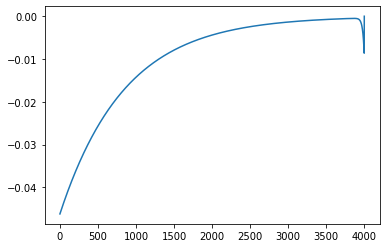

In [407]:

tau_mu = 250*2.6
tau_mu = 250*3.4
frequency_mu = 1/tau_mu
alpha_mu = np.exp(-1/tau_mu)
alpha_NT = 0
C_mu_0 = ((1-alpha_mu)/alpha_mu)**2
C_NT_0 = 1
############################################################

T = 4001

G = return_G_seed(T,[tau_mu])

C_mu = C_mu_0* np.fromfunction(lambda i,j : alpha_mu**np.abs(i-j), (T,T), dtype = np.float)
if alpha_NT == 0:
    print('sono qui')
    C_NT = C_NT_0* np.fromfunction(lambda i,j : np.vectorize(delta)(i-j), (T,T), dtype = np.float)
else:
    C_NT = C_NT_0* np.fromfunction(lambda i,j : alpha_NT**np.abs(i-j), (T,T), dtype = np.float)
    
    
L = np.fromfunction(lambda i, j: np.vectorize(delta)(i-j+1), (T,T), dtype = np.float)

SumC_mu  = np.zeros(T, dtype = np.float)
for i in range (0,T):
    if i==0:
        SumC_mu[i] = np.sum(C_mu[0,:])
    if i==1:
        SumC_mu[i] = np.sum(C_mu[0,:])-C_mu[0,0]
    if i>1:
        SumC_mu[i]  = np.sum(C_mu[0,:])-np.sum(C_mu[:i,:i][0,:])
SumC_mu = SumC_mu/C_mu_0


Inv_G_sym = np.linalg.inv(G+np.transpose(G))
        
k_mu = alpha_mu * Inv_G_sym.dot(SumC_mu)[0]
K_mu = k_mu *L
        
k0 = -Inv_G_sym[0,:].dot(np.transpose(G)).dot(C_NT[:,0])*alpha_NT/C_NT_0
K_0 = k0 *L
        
Gfutpast = np.zeros((T,T),dtype = np.float)
for i in range (0,T):
    Gfutpast[i,:T-i-1] = G[0,i+1:T]  
k = -(Inv_G_sym.dot(Gfutpast))[0]
plt.plot(k)
plt.show()
K = np.zeros((T,T),dtype = np.float)
for i in range (0,T):
    K[i,i+1:T] = k[:T-i-1]
    
    
D_NT = linalg.inv(np.identity(T)-K).dot(np.identity(T)+K_0)
D_IT_NT = linalg.inv(np.identity(T)-K).dot(K+K_0)
D_mu = linalg.inv(np.identity(T)-K).dot(K_mu)

In [ ]:
plt.plot(np.exp(-np.arange(0,500)/50)*np.cos(np.arange(0,500)/100))
plt.plot(np.exp(-np.arange(0,500)/50))

In [408]:
#T = T-1
#C_mu_0 = C_mu_0*3/4

C_mu_0 = C_mu_0

n = 5000
mu_flow = np.sqrt(C_mu_0)*pd.DataFrame(vol_flow_exp(frequency_mu,T,n))
tau_NT=0
if tau_NT == 0:
    NT_flow = np.sqrt(C_NT_0)*pd.DataFrame(vol_flow_delta(T,n)).transpose()
else:
    NT_flow = np.sqrt(C_NT_0)*pd.DataFrame(vol_flow_exp_2(1/tau_NT,T,n))
    
#TOT_flow2 = pd.DataFrame(propagate(NT_flow[0], D_NT[0])+propagate(mu_flow[0], D_mu[0]))
#TOT_flow = pd.DataFrame(D_NT[::-1,::-1].dot(NT_flow)+ np.sqrt(4/3)*D_mu[::-1,::-1].dot(mu_flow) )
TOT_flow = pd.DataFrame(D_NT[::-1,::-1].dot(NT_flow)+ D_mu[::-1,::-1].dot(mu_flow) )
IT_flow = pd.DataFrame(D_IT_NT[::-1,::-1].dot(NT_flow)+ D_mu[::-1,::-1].dot(mu_flow) )
#P_flow2 = pd.DataFrame(TOT_flow2,G[0]).reset_index()
P_flow = pd.DataFrame(G[::-1,::-1].dot(TOT_flow))

p_F_flow = (SumC_mu[0]*alpha_mu*mu_flow).shift(1).dropna()
p_F_flow = p_F_flow.reset_index()
p_F_flow = p_F_flow.drop(columns = 'index')

#TOT_flow = TOT_flow[:-1].reset_index().drop(columns = 'index')
#IT_flow = IT_flow[:-1].reset_index().drop(columns = 'index')
#NT_flow = NT_flow[:-1].reset_index().drop(columns = 'index')
#P_flow = P_flow[:-1].reset_index().drop(columns = 'index')

S_flow = P_flow-p_F_flow

TOT_flow.drop(index=TOT_flow.index[:1], 
        axis=0, 
        inplace=True)

P_flow.drop(index=P_flow.index[:1], 
        axis=0, 
        inplace=True)

TOT_flow = TOT_flow.reset_index().drop(columns = 'index')
P_flow = P_flow.reset_index().drop(columns = 'index')

In [409]:
G_high = G
P_flow_high = P_flow
P_F_flow_high = p_F_flow
TOT_flow_high = TOT_flow


In [332]:

G_low = G
P_flow_low = P_flow
P_F_flow_low = p_F_flow
TOT_flow_low = TOT_flow

In [328]:

appoP = Compute_corr(P_flow_high[T//2:],T//4,n)
appoPF_high = Compute_corr(P_F_flow_high[T//2:],T//4,n)
#appoPF_low = Compute_corr(P_F_flow_low[T//2:],T//4,n)


#appoTOT_high = Compute_corr(TOT_flow_high[T//2:],500,n)
#appoTOT_low = Compute_corr(TOT_flow_low[T//2:],500,n)
#plt.plot(appoNT_high)

KeyboardInterrupt: 

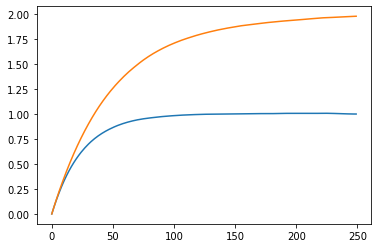

In [606]:
plt.plot(2*appoPF_low[0]*(1-appoPF_low/appoPF_low[0]))
plt.plot(2*appoPF_high[0]*(1-appoPF_high/appoPF_high[0]))

(0.0, 1.5)

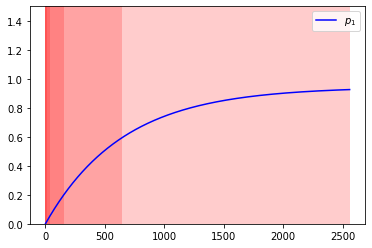

In [333]:
tau_mu1 = 250*2.6
alpha_mu1 = np.exp(-1/tau_mu1)

#tau_mu2 = 500*4/3
#alpha_mu2 = np.exp(-1/tau_mu2)

plt.plot((1-np.sqrt(1-alpha_mu1**2)/alpha_mu1**2)*(1-alpha_mu1**np.arange(0,2560)), label = r'$p_1$', color = 'blue')
#plt.plot(4/3*(1-np.sqrt(1-alpha_mu2**2)/alpha_mu2**2)*(1-alpha_mu2**np.arange(0,2560)), label = r'$p_2$')
plt.legend()
plt.fill_between((0,2560), 0, 10, facecolor='red', alpha=0.2)
plt.fill_between((0,640), 0, 10, facecolor='red', alpha=0.2)
plt.fill_between((0,160), 0, 10, facecolor='red', alpha=0.2)
plt.fill_between((0,40), 0, 10, facecolor='red', alpha=0.2)
plt.fill_between((0,10), 0, 10, facecolor='red', alpha=0.2)

plt.ylim(0,1.5)

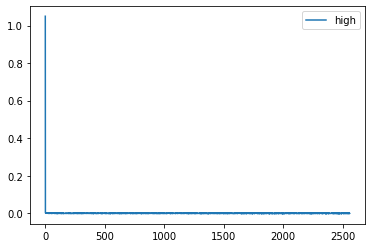

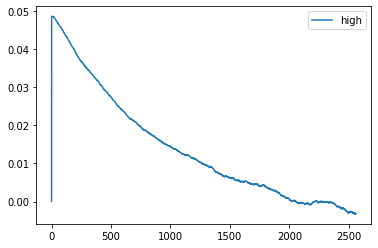

In [431]:
T_end = 2560
T_corr = T_end
c_high_q_pl = Compute_corr(TOT_flow_high,T_end,n)
#c_low_q_pl = Compute_corr(TOT_flow_low,T_end,n)

#c_low = c_low_q_pl
c_high = c_high_q_pl

#plt.plot(c_low_q_pl)#*30**(2-0.7))
plt.plot(c_high_q_pl,label='high')
#*30**(2-0.7))
plt.legend()
plt.show()
S_high_q_pl = Compute_xcorrR(TOT_flow_high,P_flow_high.shift(1),T_end+1,n)
#S_low_q_pl = Compute_xcorrR(TOT_flow_low,P_flow_low.shift(1),T_end+1,n)

S_high = np.diff(S_high_q_pl)
#S_low = np.diff(S_low_q_pl)

plt.plot(S_high_q_pl, label = 'high')
#plt.plot(S_low_q_pl)
plt.legend()
plt.show()

In [432]:
#N = T_end
#A = np.empty((N,N))
#C = c_low
#for l in range(N):
#    for n in range (N):
#        A[l,n] = C[np.abs(n-l)]
        
#A_inv = np.linalg.inv(A)
#G_dot = np.matmul(A_inv,S_low)
#G_low = np.cumsum(G_dot)


N = T_end
A = np.empty((N,N))
C = c_high
for l in range(N):
    for n in range (N):
        A[l,n] = C[np.abs(n-l)]
        
A_inv = np.linalg.inv(A)
G_dot = np.matmul(A_inv,S_high)
G_high = np.cumsum(G_dot)

In [434]:
#G_low_10 = G_low
G_high_2560 = G_high

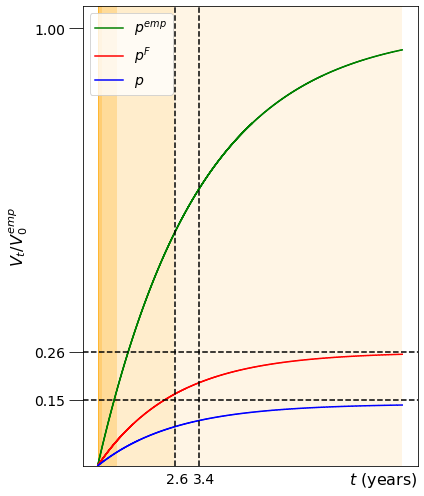

In [571]:


tau_mu1 = 250*2.6
alpha_mu1 = np.exp(-1/tau_mu1)

tau_mu2 = 250*3.4
alpha_mu2 = np.exp(-1/tau_mu2)

plt.figure(figsize=(6,7))

plt.step(np.arange(0,2560),(1-alpha_mu2**np.arange(0,2560)), label = r'$p^{emp}$', color = 'green')
plt.step(np.arange(0,2560),0.26*(1-alpha_mu1**np.arange(0,2560)), label = r'$p^F$', color = 'red')
plt.step(np.arange(0,2560),0.15*(1-np.sqrt(1-alpha_mu1**2)/alpha_mu1**2)*(1-alpha_mu1**np.arange(0,2560)), label = r'$p$', color = 'blue')

#plt.plot(1.5*(1-np.sqrt(1-alpha_mu2**2)/alpha_mu2**2)*(1-alpha_mu2**np.arange(0,2560)), label = r'$p$', color = 'blue')


plt.axhline(0.26,  color = 'black', linestyle = 'dashed')
plt.axhline(0.15,  color = 'black', linestyle = 'dashed')

plt.axvline(250*3.4,  color = 'black', linestyle = 'dashed')
plt.axvline(250*2.6,  color = 'black', linestyle = 'dashed')

#plt.plot(4/3*(1-np.sqrt(1-alpha_mu2**2)/alpha_mu2**2)*(1-alpha_mu2**np.arange(0,2560)), label = r'$p_2$', linestyle = 'dashdot')
plt.legend(fontsize = 14)
plt.fill_between((640,2560), 0, 10, facecolor='orange', alpha=0.1)
plt.fill_between((160,640), 0, 10, facecolor='orange', alpha=0.2)
plt.fill_between((40,160), 0, 10, facecolor='orange', alpha=0.4)
plt.fill_between((10,40), 0, 10, facecolor='orange', alpha=0.55)
plt.fill_between((0,10), 0, 10, facecolor='orange', alpha=0.8)
plt.ylabel(r'$V_t/V^{emp}_0$', size = 16,)
plt.xlabel(r'$t$'+' (years)', size = 16, loc = 'right')
plt.ylim(0,1.05)

plt.yticks([0.26,0.15,1])
plt.xticks([])
plt.text(800, -0.04, '3.4', size =14)
plt.text(250*2.6-80, -0.04, '2.6', size =14)
plt.tick_params(axis='x', labelsize=14)

plt.tick_params(axis='y', labelsize=14, size = 14)
plt.tight_layout()
plt.savefig('vargram.pdf')

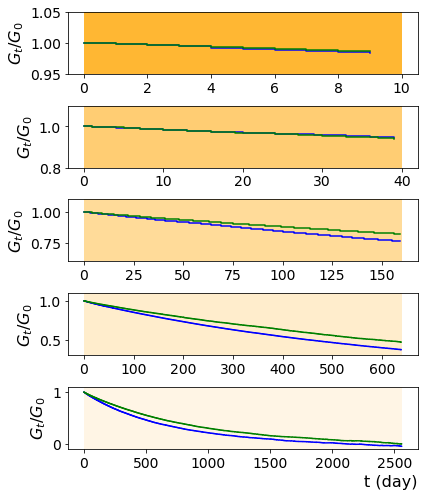

In [573]:
fig, ((ax1, ax2,ax3,ax4, ax5)) = plt.subplots(5, 1)
fig.set_size_inches(6, 7, forward=True)

#ax1.plot(G_high_10, color = 'blue', linestyle = 'dashdot')
ax1.fill_between((0,10), 0, 10, facecolor='orange', alpha=0.8)
ax1.step(np.arange(0,10),G_low_10/G_low_10[0], color = 'blue', where = 'post')
ax1.step(np.arange(0,10),G_high_10/G_high_10[0], color = 'green', where = 'post')
ax1.set_ylim(0.95,1.05)
ax1.set_ylabel(r'$G_t/G_0$', size = 16)

ax2.set_ylabel(r'$G_t/G_0$', size = 16)

ax3.set_ylabel(r'$G_t/G_0$', size = 16)

ax4.set_ylabel(r'$G_t/G_0$', size = 16)

ax5.set_ylabel(r'$G_t/G_0$', size = 16)

ax5.set_xlabel(r't'+ ' (day)', size = 16, loc = 'right')
#ax1.legend()
ax2.fill_between((0,40), 0, 10, facecolor='orange', alpha=0.55)

ax3.fill_between((0,160), 0, 10, facecolor='orange', alpha=0.4)

ax4.fill_between((0,640), 0, 10, facecolor='orange', alpha=0.2)

ax5.fill_between((0,2560), -1, 10, facecolor='orange', alpha=0.1)
ax2.step(np.arange(0,40),G_low_40/G_low_40[0], color = 'blue', where = 'post')
ax2.step(np.arange(0,40),G_high_40/G_high_40[0], color = 'green', where = 'post')
#ax2.plot(np.arange(0,40),G_high_40, color = 'violet', linestyle = 'dashdot')
ax2.set_ylim(0.8,1.1)

ax3.step(np.arange(0,160),G_low_160/G_low_160[0], color = 'blue', where = 'post')
ax3.step(np.arange(0,160),G_high_160/G_high_160[0], color = 'green', where = 'post')
#ax3.plot(np.arange(0,160),G_high_160, color = 'red', linestyle = 'dashdot')
ax3.set_ylim(0.6,1.1)

ax4.step(np.arange(0,640),G_low_640/G_low_640[0], color = 'blue', where = 'post')
ax4.step(np.arange(0,640),G_high_640/G_high_640[0], color = 'green', where = 'post')
#ax4.plot(np.arange(0,640),G_high_640, color = 'orange', linestyle = 'dashdot')
ax4.set_ylim(0.3,1.1)


ax5.step(np.arange(0,2560),G_low_2560/G_low_2560[0], color = 'blue', where = 'post')
ax5.step(np.arange(0,2560),G_high_2560/G_high_2560[0], color = 'green', where = 'post')
#ax5.plot(np.arange(0,2560),G_high_2560, color = 'green', linestyle = 'dashdot')
ax5.set_ylim(-0.1,1.1)



ax1.tick_params(axis='x', labelsize=14)
ax2.tick_params(axis='x', labelsize=14)
ax3.tick_params(axis='x', labelsize=14)
ax4.tick_params(axis='x', labelsize=14)
ax5.tick_params(axis='x', labelsize=14)

ax1.tick_params(axis='y', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)
ax3.tick_params(axis='y', labelsize=14)
ax4.tick_params(axis='y', labelsize=14)
ax5.tick_params(axis='y', labelsize=14)

plt.tight_layout()
plt.savefig('nonUniversalG.pdf')

ValueError: not enough values to unpack (expected 4, got 2)

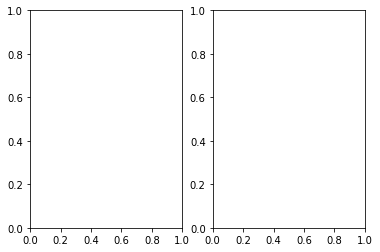

In [425]:
fig, (ax1, ax2,ax3,ax4) = plt.subplots(1, 2)
fig.set_size_inches(10, 5, forward=True)

plt.plot(G_low_10/G_low_10[0], color = 'blue', label = '10')
#plt.plot(G_high_10, color = 'blue', linestyle = 'dashed')

#plt.plot(np.arange(0,20)/2,G_low_20)
#plt.plot(np.arange(0,20)/2,G_high_20)

plt.plot(np.arange(0,40)/4,G_low_40/G_low_40[0], color = 'violet', label = '40')
#plt.plot(np.arange(0,40)/4,G_high_40, color = 'violet', linestyle = 'dashed')

#plt.plot(np.arange(0,80)/8,G_low_80)
#plt.plot(np.arange(0,80)/8,G_high_80)

plt.plot(np.arange(0,160)/16,G_low_160/G_low_160[0], color = 'red', label = '160')
plt.plot(np.arange(0,160)/16,G_high_160/G_high_160[0], color = 'red', linestyle = 'dashed')

#plt.plot(np.arange(0,320)/32,G_low_320)
#plt.plot(np.arange(0,320)/32,G_high_320)

plt.plot(np.arange(0,640)/64,G_low_640/G_low_640[0], color = 'orange', label = '640')
#plt.plot(np.arange(0,640)/64,G_high_640, color = 'orange', linestyle = 'dashed')

#plt.plot(np.arange(0,1280)/128,G_low_1280)
#plt.plot(np.arange(0,1280)/128,G_high_1280)

plt.plot(np.arange(0,2560)/256,G_low_2560/G_low2560[0], color = 'green', label = '2560')
#plt.plot(np.arange(0,2560)/256,G_high_2560, color = 'green', linestyle = 'dashed')
plt.legend()

plt.ylim(-0.01,0.12)

(0.0, 0.07)

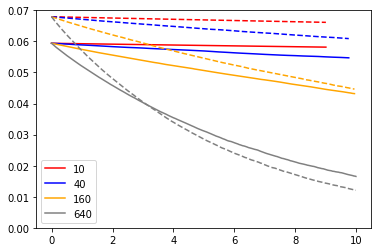

In [571]:
plt.plot(G_low_1, color = 'red', label = '10')
plt.plot(G_high_1, color = 'red', linestyle = 'dashed')

#plt.plot(np.arange(0,20)/2,G_low_2)
#plt.plot(np.arange(0,20)/2,G_high_2)


plt.plot(np.arange(0,40)/4,G_low_4, color = 'blue', label = '40')
plt.plot(np.arange(0,40)/4,G_high_4, color = 'blue', linestyle = 'dashed')


#plt.plot(np.arange(0,80)/8,G_low_8)
#plt.plot(np.arange(0,80)/8,G_high_8)

plt.plot(np.arange(0,160)/16,G_low_16, color = 'orange', label= '160')
plt.plot(np.arange(0,160)/16,G_high_16, color = 'orange', linestyle = 'dashed')

#plt.plot(np.arange(0,320)/32,G_low_32)
#plt.plot(np.arange(0,320)/32,G_high_32)

plt.plot(np.arange(0,640)/64,G_low_64, color = 'grey', label = '640')
plt.plot(np.arange(0,640)/64,G_high_64, color = 'grey', linestyle = 'dashed')
plt.legend()

plt.ylim(0,0.07)

(0.6, 1.0)

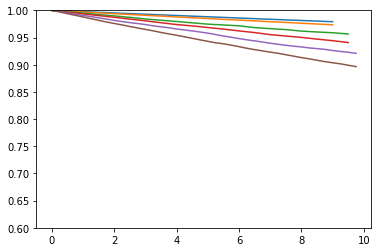

In [545]:
plt.plot(G_low_1/G_low_1[0])
plt.plot(G_high_1/G_high_1[0])

plt.plot(np.arange(0,20)/2,G_low_2/G_low_2[0])
plt.plot(np.arange(0,20)/2,G_high_2/G_high_2[0])


plt.plot(np.arange(0,40)/4,G_low_4/G_low_4[0])
plt.plot(np.arange(0,40)/4,G_high_4/G_high_4[0])

plt.ylim(0.6,1)

In [688]:
def Mforecast(tipo, process, param,i,T):
        M = []
        C_NT_0 = 1
        t0 = i
        tau_mu = param[0]
        tau_NT = param[1]
        
        if tipo == "mark":
            if process == "MU":
                alpha_appo = np.exp(-1/param[0])
                C_appo = np.fromfunction(lambda i,j : alpha_appo**np.abs(i-j), (T,T), dtype = float)
            if process == "NT":
                if tau_NT == 0:
                    C_appo = np.fromfunction(lambda i,j : np.vectorize(delta)(i-j), (T,T), dtype = np.float)
                else:
                    alpha_appo = np.exp(-1/param[1])
                    C_appo = np.fromfunction(lambda i,j : alpha_appo**np.abs(i-j), (T,T), dtype = float)
                    
        if tipo =='cos':
            if process == "MU":
                alpha_appo = np.exp(-1/param[0])
                C_appo = np.fromfunction(lambda i,j : alpha_appo**np.abs(i-j)*np.cos((i-j)/param[2]), (T,T), dtype = float)
            if process == "NT":
                if tau_NT == 0:
                    C_appo = np.fromfunction(lambda i,j : np.vectorize(delta)(i-j), (T,T), dtype = np.float)
                else:
                    alpha_appo = np.exp(-1/param[1])
                    C_appo = np.fromfunction(lambda i,j : alpha_appo**np.abs(i-j), (T,T), dtype = float)
        
        
        
        plt.plot(C_appo[0])
        plt.title('dividends ACF')
        plt.show()
        
        g = np.zeros((T-t0,t0))
        for I in range (t0,t0+1):
            for J in range (I+1,T+1):
                C = C_appo[:J,:J]
                current = I
                inv_C = np.linalg.inv(C)
                inv_C_int = inv_C[I:J-1,I:J-1]
                #print(inv_C_int)
                inv_inv_C_int = np.linalg.inv(inv_C_int)
                delta_inv_C = +inv_C[:,I:J-1].dot(inv_inv_C_int).dot(inv_C[I:J-1,:])
                matrix = (inv_C[J-1,J-1]-delta_inv_C[J-1,J-1])**(-1)*(inv_C-delta_inv_C)
                M.append(matrix)
                g[J-t0-1,:t0] = M[0][J-1,:t0]
                M = []
            M = []
        return g

def Mforecast_NT(tipo, process, param,i,T):
        M = []
        C_NT_0 = 1
        t0 = i
        tau_mu = param[0]
        tau_NT = param[1]
        
        if tipo == "mark":
            if process == "MU":
                alpha_appo = np.exp(-1/param[0])
                C_appo = np.fromfunction(lambda i,j : alpha_appo**np.abs(i-j), (T,T), dtype = float)
            if process == "NT":
                if tau_NT == 0:
                    C_appo = np.fromfunction(lambda i,j : np.vectorize(delta)(i-j), (T,T), dtype = np.float)
                else:
                    alpha_appo = np.exp(-1/param[1])
                    C_appo = np.fromfunction(lambda i,j : alpha_appo**np.abs(i-j), (T,T), dtype = float)
        beta = 10**(2.3/3)
        c=0
        
        alpha=0.7
        for i in range(0,3):
            c += beta**(-i*alpha)*np.exp(-alpha/beta**i)
        x = np.arange(0,T+1)
        appo = np.zeros(T+1)
        for i in range(0,3):
            appo += beta**(-i*alpha)*np.exp(-alpha/beta**i*x)
        print(beta**i/alpha)
        h = c**(-1)*appo
        C_appo = toeplitz(h[1:],h[1:])
        
        plt.plot(h[1:])
        plt.show()
        
        g = np.zeros((T-t0,t0))
        for I in range (t0,t0+1):
            for J in range (I+1,T+1):
                C = C_appo[:J,:J]
                current = I
                inv_C = np.linalg.inv(C)
                inv_C_int = inv_C[I:J-1,I:J-1]
                #print(inv_C_int)
                inv_inv_C_int = np.linalg.inv(inv_C_int)
                delta_inv_C = +inv_C[:,I:J-1].dot(inv_inv_C_int).dot(inv_C[I:J-1,:])
                matrix = (inv_C[J-1,J-1]-delta_inv_C[J-1,J-1])**(-1)*(inv_C-delta_inv_C)
                M.append(matrix)
                g[J-t0-1,:t0] = M[0][J-1,:t0]
                M = []
            M = []
        return g

def return_Mfcast_mu_g(T,M1):
    e1 = np.asarray(np.zeros(T))
    e1[0] = 1
    Mfcast_mu_g = np.zeros((T,T))
    Mfcast_mu_g[0] = e1
    Mfcast_mu_g[1:,:] = M1[:T-1,:T]
    return Mfcast_mu_g


def return_SumC_mu_final(T,M2):
    SumC_mu_final = np.zeros((T,T))
    for i in range (0,T):
        for j in range (0,T):
            if j==0:
                SumC_mu_final[i,j] = np.sum(M2[i,:])
            if j==1:
                SumC_mu_final[i,j] = np.sum(M2[i,:])-M2[i,0]
            if j>1:
                SumC_mu_final[i,j]  = np.sum(M2[i,:])-np.sum(M2[:,:j][i,:])
    return SumC_mu_final


def return_G_seed(T,p):
    
    alpha_G = np.exp(-1/p[0])
    G_0_seed = (1-(1-np.sqrt(1-alpha_mu**2))/alpha_mu**2)
    G_seed = G_0_seed*np.fromfunction(lambda i,j : alpha_G**np.abs(i-j)*np.heaviside(j-i,1), (T,T),dtype = np.float)
    return G_seed


def return_st_M(T,m):
    M = np.zeros((T,T))
    for i in range (0,T):
        M[i,i:T] = m[0:T-i]
    return M


def return_futpast(T,M):
    Gfutpast = np.zeros((T,T),dtype = np.float)
    for i in range (0,T):
        Gfutpast[i,:T-i-1] = M[0,i+1:T]
    return Gfutpast

In [689]:
def Numerical_solver_myopic_GENERAL(T,T_it,tipo, param_ampli,param,h):
    
    L = np.fromfunction(lambda i, j: np.vectorize(delta)(i-j+1), (T,T), dtype = np.float)
    G_seed = return_G_seed(T,param)
    G = G_seed
    
    
    G_record = np.zeros((T_it+1,T),dtype = np.float)
    G_record[0] = G[0]
    plt.plot(G_record[0])
    plt.show()
    
    
    C_mu_0 = param_ampli[0]
    C_NT_0 = param_ampli[1]
    
    if tipo == "mark":
        tau_mu = param[0]
        tau_NT = param[1]
        alpha_mu = np.exp(-1/param[0])
       
        C_mu = C_mu_0* np.fromfunction(lambda i,j : alpha_mu**np.abs(i-j), (T,T), dtype = np.float)
        if tau_NT == 0:
            C_NT = C_NT_0* np.fromfunction(lambda i,j : np.vectorize(delta)(i-j), (T,T), dtype = np.float)
        else:
            alpha_NT = np.exp(-1/param[1])
            C_NT = C_NT_0* np.fromfunction(lambda i,j : alpha_NT**np.abs(i-j), (T,T), dtype = np.float)
    
    
    if tipo == 'cos':
        tau_mu = param[0]
        tau_NT = param[1]
        alpha_mu = np.exp(-1/param[0])
        C_mu = C_mu_0*np.fromfunction(lambda i,j: alpha_mu**np.abs(i-j)*np.cos((i-j)/param[2]),(T,T), dtype = np.float)
        if tau_NT == 0:
            C_NT = C_NT_0* np.fromfunction(lambda i,j : np.vectorize(delta)(i-j), (T,T), dtype = np.float)
        else:
            alpha_NT = np.exp(-1/param[1])
            C_NT = C_NT_0* np.fromfunction(lambda i,j : alpha_NT**np.abs(i-j), (T,T), dtype = np.float)
    
    
    plt.plot(C_mu[0])
    plt.title('dividends ACF')
    plt.show()
    
    
    Mfcast_mu = -np.transpose(np.flip(Mforecast(tipo,"MU",param,T,2*T),1))
    Mfcast_nt = -np.flip(Mforecast(tipo, "NT",param,T,2*T),1).dot(L)
    
    appo = np.transpose(Mfcast_mu)
    Mfcast_mu_g = return_Mfcast_mu_g(T,appo)
    SumC_mu_final = return_SumC_mu_final(T,Mfcast_mu)
    
    
    for j in range(0,T_it):
        Inv_G_sym = np.linalg.inv(G+np.transpose(G))
        
        k_mu = Inv_G_sym.dot(np.transpose(SumC_mu_final))[0].dot(L)
        K_mu = return_st_M(T,k_mu)
        
        k0 = -Inv_G_sym[0,:].dot(np.transpose(G)).dot(Mfcast_nt)
        K_0 = return_st_M(T,k0)
        
    
        Gfutpast = return_futpast(T,G)
        
        k = -(Inv_G_sym.dot(Gfutpast))[0]
        K = return_st_M(T,k).dot(L)
            
        Sigma = (np.identity(T)+K_0).dot(C_NT).dot(np.transpose(np.identity(T)+K_0))
        
        Filter_mu = (np.linalg.inv(np.linalg.inv(C_mu)+np.transpose(K_mu).dot(np.linalg.inv(Sigma)).dot(K_mu)).dot(np.transpose(K_mu)).dot(np.linalg.inv(Sigma)).dot(np.identity(T)-K))
        
        g_final  = Mfcast_mu_g.dot(Filter_mu)#*C_mu_0/(1-alpha_mu)
        appo = np.sum(g_final,axis = 0)
        g = appo
        
        G_final = return_st_M(T,g)
        
        G = G_final
        
        plt.plot(G_final[0])
        plt.show()
        
    
    C_IT = np.linalg.inv(np.identity(T)-K).dot((K+K_0).dot(C_NT).dot(np.transpose(K+K_0))+K_mu.dot(C_mu).dot(np.transpose(K_mu))).dot(np.transpose(np.linalg.inv(np.identity(T)-K)))
        
    C_TOT = linalg.inv(np.identity(T)-K).dot((np.identity(T)+K_0).dot(C_NT).dot(np.transpose(np.identity(T)+K_0))+K_mu.dot(C_mu).dot(np.transpose(K_mu))).dot(np.transpose(np.linalg.inv(np.identity(T)-K)))
    
    inv_C_tot = np.linalg.inv(C_TOT)
    C_p = G.dot(C_TOT).dot(np.transpose(G))
    C_p_IT = np.transpose(SumC_mu_final).dot(L).dot(C_mu).dot(np.transpose(L)).dot(SumC_mu_final)
    C_p_best = np.transpose(SumC_mu_final).dot(C_mu).dot(SumC_mu_final)
    
    D_NT = linalg.inv(np.identity(T)-K).dot(np.identity(T)+K_0)
    D_IT_NT = linalg.inv(np.identity(T)-K).dot(K+K_0)
    D_mu = linalg.inv(np.identity(T)-K).dot(K_mu)
    
    return G,D_NT,D_mu, C_p, C_TOT,D_IT_NT, SumC_mu_final
    


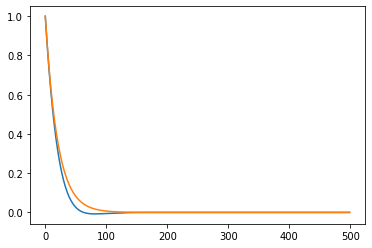

In [721]:
plt.plot(np.exp(-np.arange(0,500)/20)*np.cos(np.arange(0,500)/40))
plt.plot(np.exp(-np.arange(0,500)/20))

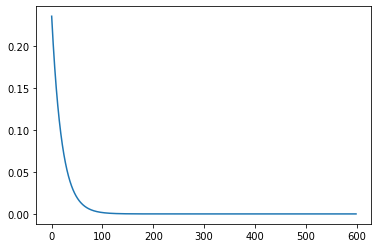

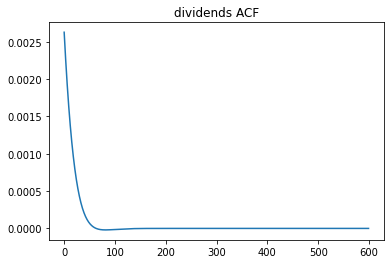

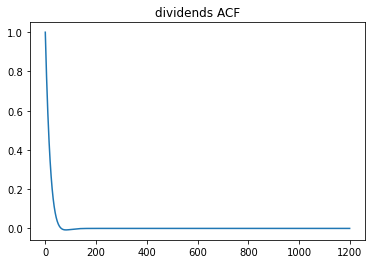

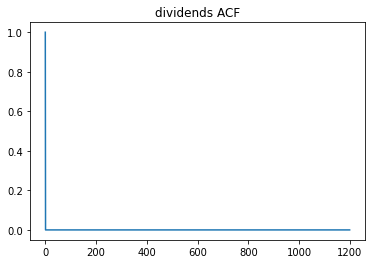

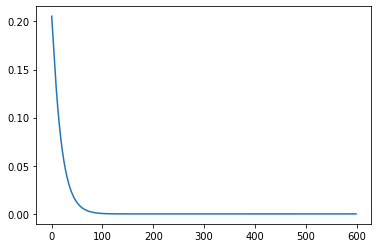

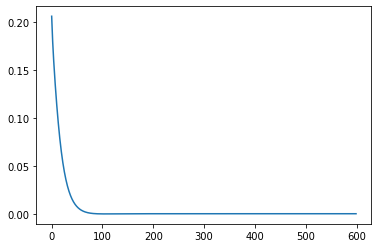

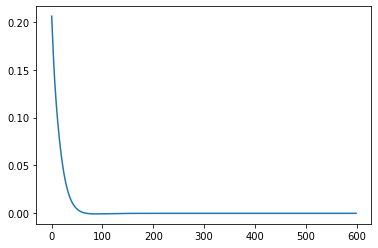

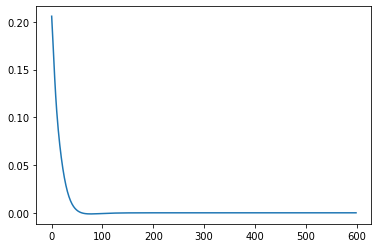

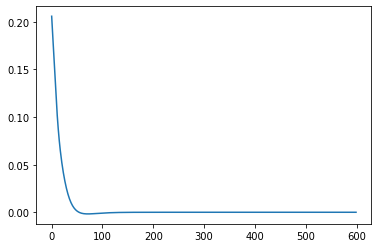

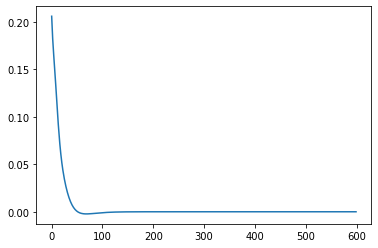

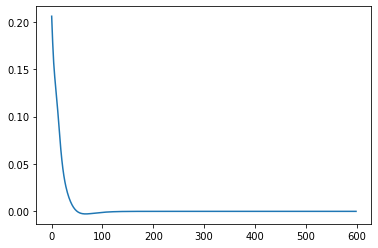

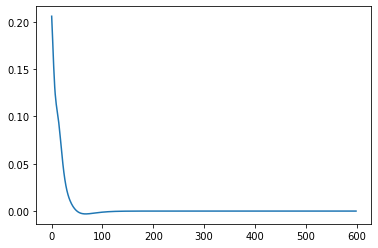

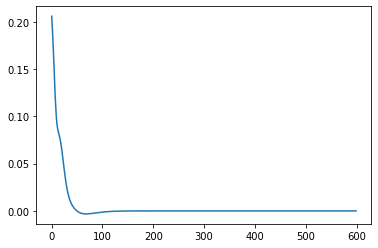

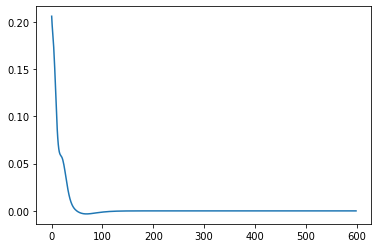

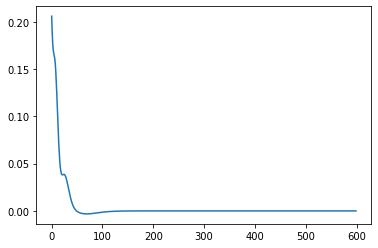

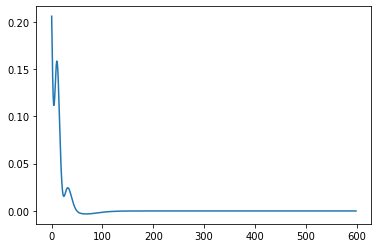

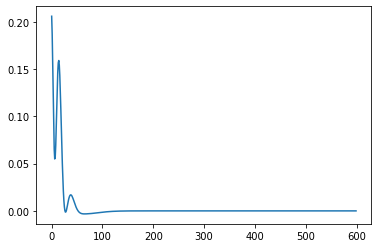

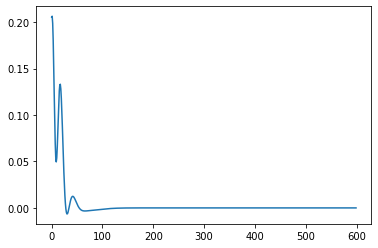

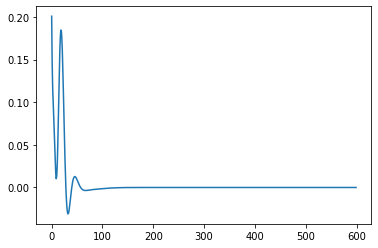

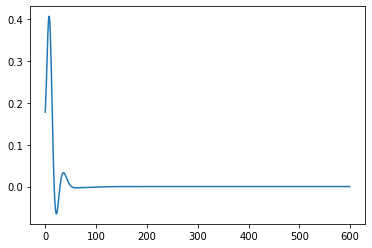

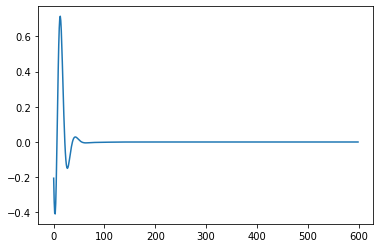

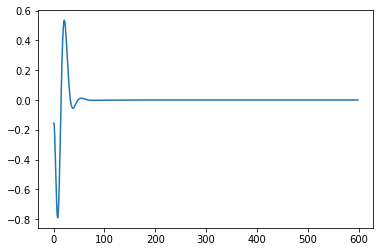

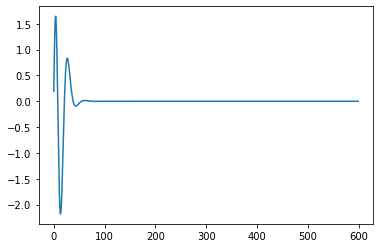

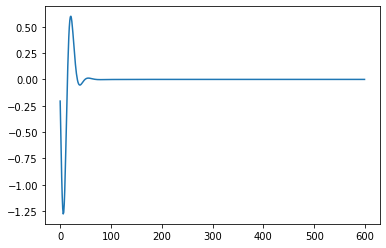

In [724]:
T = 600
T_it = 20
tipo = 'cos'

tau_mu = 20
alpha_mu = np.exp(-1/tau_mu)
C_mu_0 = ((1-alpha_mu)/alpha_mu)**2
C_NT_0 = 1
tau_NT = 0
tau_cos_mu = 40

param_ampli = [C_mu_0, C_NT_0]
param = [tau_mu, tau_NT, tau_cos_mu]
h = []

G,D_NT,D_mu, C_p, C_TOT,D_IT_NT, SumC_mu_final = Numerical_solver_myopic_GENERAL(T,T_it,tipo, param_ampli,param,h)

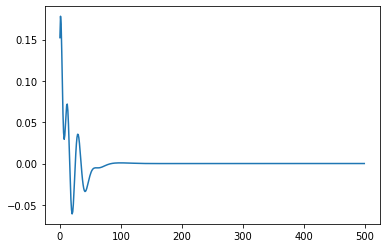

In [719]:
plt.plot(G[0])

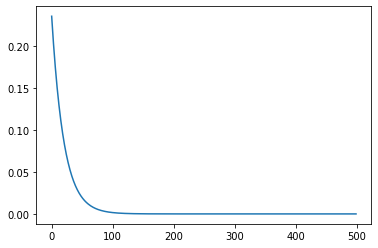

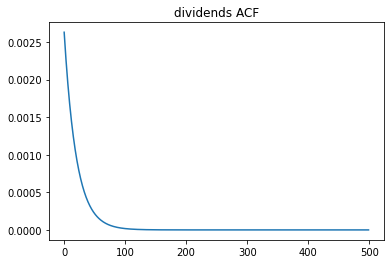

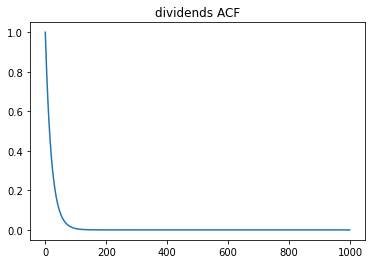

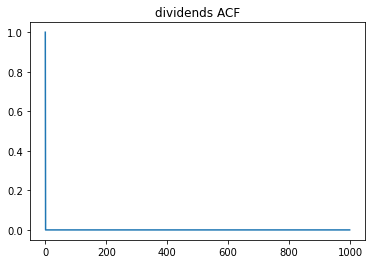

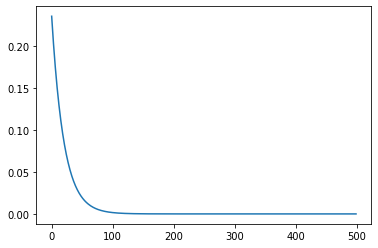

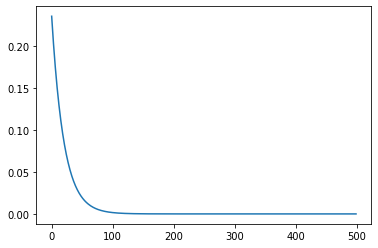

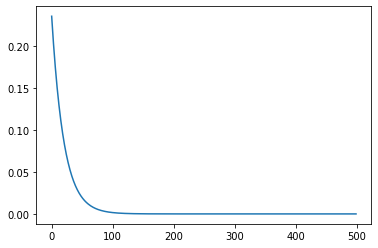

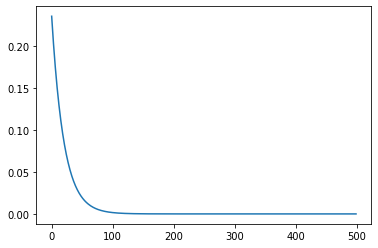

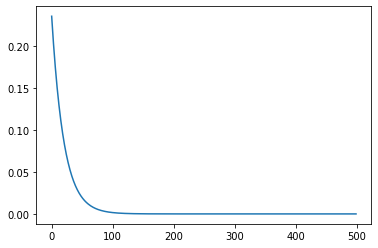

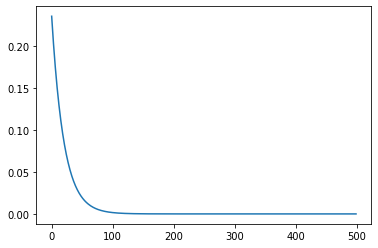

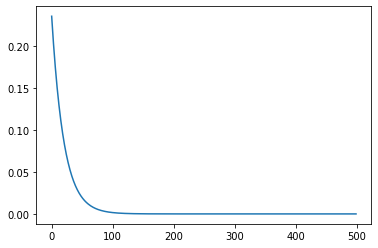

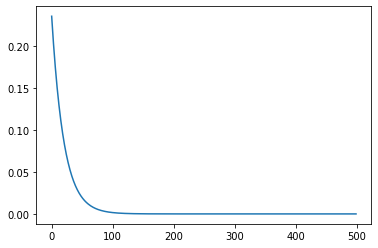

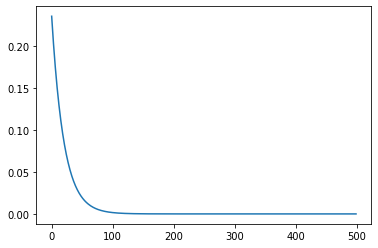

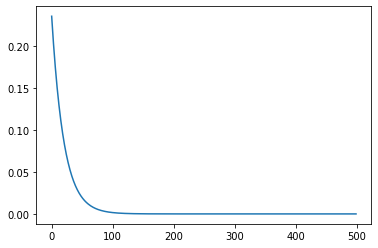

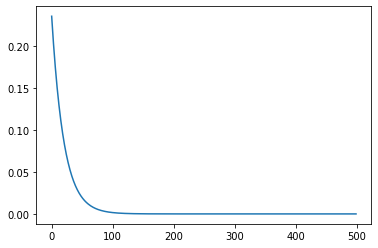

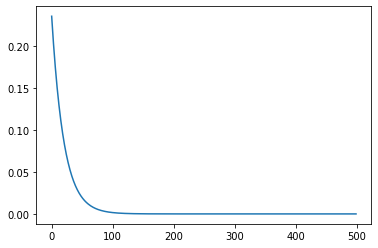

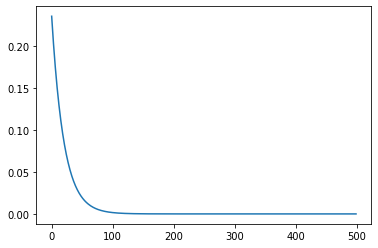

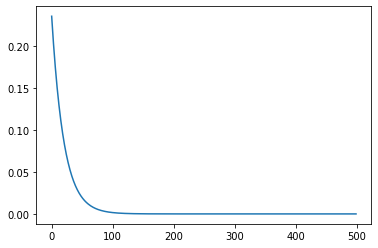

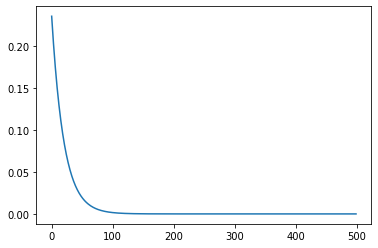

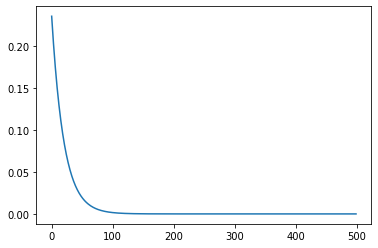

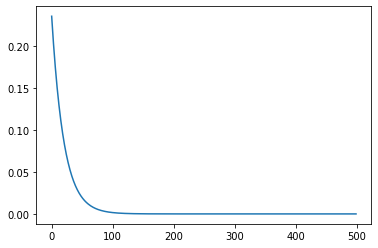

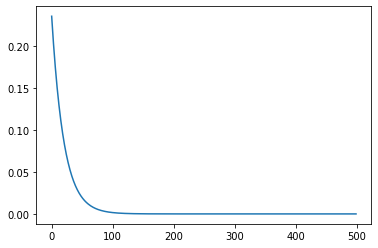

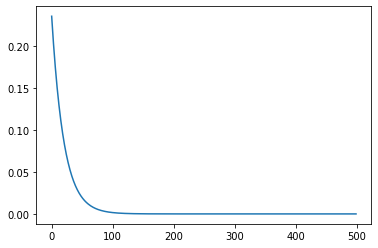

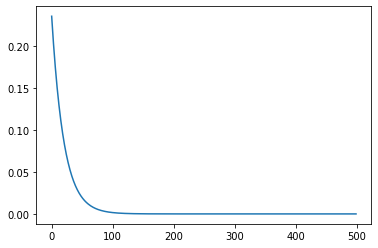

In [716]:
T = 500
T_it = 20
tipo = 'mark'

tau_mu = 20
alpha_mu = np.exp(-1/tau_mu)
C_mu_0 = ((1-alpha_mu)/alpha_mu)**2
C_NT_0 = 1
tau_NT = 0
tau_cos_mu = 20

param_ampli = [C_mu_0, C_NT_0]
param = [tau_mu, tau_NT, tau_cos_mu]
h = []

G1,D_NT,D_mu, C_p, C_TOT,D_IT_NT, SumC_mu_final = Numerical_solver_myopic_GENERAL(T,T_it,tipo, param_ampli,param,h)

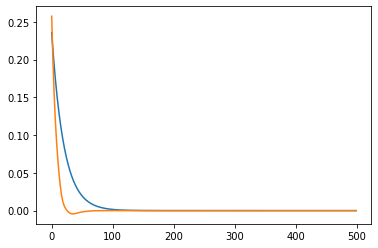

In [717]:
plt.plot(G1[0])
plt.plot(G[0])